## Warmup Question 5

From *HealthCare Fraud Detection Capstone Project Proposal.ipynb*

**Summary:**

EDA for duplicate claims, physician and patient ID reuse, geographic trends

In [2]:
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import seaborn as sns

## Get the data

In [4]:
beneficiary = pd.read_csv('data/archive/Train_Beneficiarydata-1542865627584.csv')
print(beneficiary.shape)
beneficiary.head(2)

(138556, 25)


,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,...,2,2,2,2,2,2,0,0,30,50


In [5]:
inpatient = pd.read_csv('data/archive/Train_Inpatientdata-1542865627584.csv')
print(inpatient.shape)
inpatient.head(2) 

(40474, 30)


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN


In [6]:
outpatient = pd.read_csv('data/archive/Train_Outpatientdata-1542865627584.csv')
print(outpatient.shape)
outpatient.head(2)

(517737, 27)


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380


In [7]:
labels = pd.read_csv('data/archive/Train-1542865627584.csv')
print(labels.shape)
labels.head(2)

(5410, 2)


,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes


In [8]:
# change date objects to datetime objects
inpatient['ClaimStartDt'] = pd.to_datetime(inpatient['ClaimStartDt'])
inpatient['ClaimEndDt'] = pd.to_datetime(inpatient['ClaimEndDt'])
inpatient['AdmissionDt'] = pd.to_datetime(inpatient['AdmissionDt'])
inpatient['DischargeDt'] = pd.to_datetime(inpatient['DischargeDt'])

outpatient['ClaimStartDt'] = pd.to_datetime(outpatient['ClaimStartDt'])
outpatient['ClaimEndDt'] = pd.to_datetime(outpatient['ClaimEndDt'])

In [9]:
inpatient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40474 entries, 0 to 40473
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   BeneID                  40474 non-null  object        
 1   ClaimID                 40474 non-null  object        
 2   ClaimStartDt            40474 non-null  datetime64[ns]
 3   ClaimEndDt              40474 non-null  datetime64[ns]
 4   Provider                40474 non-null  object        
 5   InscClaimAmtReimbursed  40474 non-null  int64         
 6   AttendingPhysician      40362 non-null  object        
 7   OperatingPhysician      23830 non-null  object        
 8   OtherPhysician          4690 non-null   object        
 9   AdmissionDt             40474 non-null  datetime64[ns]
 10  ClmAdmitDiagnosisCode   40474 non-null  object        
 11  DeductibleAmtPaid       39575 non-null  float64       
 12  DischargeDt             40474 non-null  dateti

### Warmup Question 5: From Which Providers Do the Duplicated Claims Come From?
- An easier type of frauds is to submit duplicated claims using stolen patient IDs.
- While multiple claims with identical information are not always fraudulent, the prevalence of
these duplicated records would signal potential fraud activities. 
- Consider the various diagnosis codes, procedure codes, admit diagnosis codes as the key features, please identify the duplicated claims in the inpatients_train, outpatients_train data.
- Are these potentially fradulent providers duplicating their own medical records, or are they
using the records from the other providers?
- Assuming that the claimStartDates are authentic, identify the providers which are the information
receivers. Identify the providers which are the information givers.
- Summarize the duplicate record counts/provider and study if the statistics have different
distributions between honest and potentialfraud providers.
- Do these potentially fraud providers reuse doctor IDs and/or patient IDs?  If so, these 
fradulent IDs (or if the doctors or patients willingly participate) can be used as signals to
the other types of fraudulent activities.
- Do these duplicated records show any anomaly in terms of geographic locations?
Even though the original data doesn't specify the providers nor the doctors' practice locations,
one may use the majority of the patients' residence state/county information to infer their
physical locations.
- Base on your best knowledge of suspicious activities in duplicating the patient claims, flag
the providers accordingly. Compare with the **PotentialFraud** flags offered by the dataset and discuss.

# Identify duplicate claims

### What constitutes a duplicate claim? 

CMS.gov defines duplicate claims as any payments paid across more than one claim number for the same Beneficiary, CPT/HCPCS code, and service date by the same provider, in excess of a code’s Medically Unlikely Edit (MUE). 

A duplicate claim in medical billing refers to the submission of two or more claims for the same service provided to a patient on the same date by the same provider.

**Exact Duplicate Claims:** These claims contain identical information in every aspect, including patient details, provider information, date of service, and services rendered. For example, if a provider submits two identical claims for a single office visit on the same day, this would be classified as an exact duplicate.

**Suspect Duplicate Claims:** These claims exhibit similarities but may not be identical. They may include matching patient names or service dates but differ in other aspects. For instance, if a provider submits a claim for a service performed on one date and later submits another claim for a similar service on a different date but with overlapping patient information, it could be flagged as a suspect duplicate.

**Duplicate claims may have common beneficiary, provider, procedure codes, and service dates**
- How to consider procedure codes? Look for duplicates with same Code_1?

Resources: [https://myfcbilling.com/duplicate-claim-in-medical-billing/]
- *has info about common causes of duplicate claims*

### add fraud flag to inpatient and outpatient

and then look at duplicate observations

In [14]:
# create list of fraud providers 
fraud_providers = labels[labels['PotentialFraud']=='Yes']['Provider'].to_list()

In [15]:
# add fraud flags
inpatient.loc[:, 'fraud_suspected'] = [
    'Y' if x else 'N' for x in inpatient['Provider'].isin(fraud_providers)
]

outpatient.loc[:, 'fraud_suspected'] = [
    'Y' if x else 'N' for x in outpatient['Provider'].isin(fraud_providers)
]

In [16]:
inpatient.head(2)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,fraud_suspected
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN,N


In [17]:
# check for exact duplicates 
print(f'there are {len(inpatient[inpatient.duplicated()] )} exact inpatient duplicate claims')
print(f'there are {len(outpatient[outpatient.duplicated()])} exact inpatient duplicate claims')

there are 0 exact inpatient duplicate claims
there are 0 exact inpatient duplicate claims


In [18]:
# add fraud flags
inpatient.loc[:, 'fraud_suspected'] = [
    'Y' if x else 'N' for x in inpatient['Provider'].isin(fraud_providers)
]

outpatient.loc[:, 'fraud_suspected'] = [
    'Y' if x else 'N' for x in outpatient['Provider'].isin(fraud_providers)
]

In [19]:
inpatient.head(2)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,fraud_suspected
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN,N


### Inpatient

In [21]:
# get the number of observations with duplicate BeneID, Provider, and ClaimStartDt
inpatient.groupby(['BeneID', 'Provider', 'ClaimStartDt']).size().reset_index(name='count')

,BeneID,Provider,ClaimStartDt,count
0,BENE100002,PRV54894,2009-04-21,1
1,BENE100004,PRV52890,2009-08-02,1
2,BENE100006,PRV57317,2009-11-22,1
3,BENE100007,PRV54875,2009-01-02,1
4,BENE100010,PRV55916,2009-04-24,1
...,...,...,...,...
40432,BENE99965,PRV51614,2009-06-20,1
40433,BENE99974,PRV52064,2009-11-08,1
40434,BENE99976,PRV54986,2009-02-12,1
40435,BENE99984,PRV56550,2009-04-06,1


In [22]:
# save and filter for duplicates
duplicate_ip_groups = inpatient.groupby(
    # add columns to this list to check for duplicates in multiple areas
    ['BeneID', 'Provider', 'ClaimStartDt']
).size().reset_index(name='count')

duplicate_ip_groups = duplicate_ip_groups[duplicate_ip_groups['count'] > 1]

In [23]:
duplicate_ip_groups

,BeneID,Provider,ClaimStartDt,count
2148,BENE107828,PRV55018,2009-01-01,2
2809,BENE110116,PRV56268,2009-02-09,2
3052,BENE11093,PRV51842,2009-01-03,2
4673,BENE116436,PRV52178,2008-12-26,2
5584,BENE119457,PRV57547,2009-02-20,2
5744,BENE119908,PRV57191,2009-01-03,2
7109,BENE124277,PRV52019,2009-11-06,2
9164,BENE13119,PRV54258,2009-09-09,2
9191,BENE131263,PRV51021,2009-01-17,2
9767,BENE133299,PRV51378,2009-01-11,2


In [24]:
# get rows that are part of duplicate groups
duplicate_ip_claims = inpatient.merge(
    duplicate_ip_groups[duplicate_ip_groups['count'] > 1],
    # add columns to this list to check for duplicates in multiple areas 
    on=['BeneID', 'Provider', 'ClaimStartDt'],
    how='inner'
)

In [25]:
duplicate_ip_claims

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,fraud_suspected,count
0,BENE11093,CLM32146,2009-01-03,2009-01-09,PRV51842,20000,PHY341192,PHY355416,NaN,2009-01-03,...,412,42732,3950.0,2762.0,NaN,NaN,NaN,NaN,Y,2
1,BENE11093,CLM82202,2009-01-03,2009-01-12,PRV51842,20000,PHY341192,PHY355416,NaN,2009-01-03,...,412,42732,3950.0,2762.0,NaN,NaN,NaN,NaN,Y,2
2,BENE13119,CLM67389,2009-09-09,2009-09-10,PRV54258,0,PHY424910,PHY431508,NaN,2009-09-09,...,41401,NaN,4516.0,NaN,NaN,NaN,NaN,NaN,Y,2
3,BENE13119,CLM67390,2009-09-09,2009-09-13,PRV54258,11000,PHY430507,PHY430507,NaN,2009-09-09,...,4280,NaN,8891.0,NaN,NaN,NaN,NaN,NaN,Y,2
4,BENE22616,CLM75496,2009-11-11,2009-12-08,PRV55230,18000,PHY333406,NaN,NaN,2009-11-11,...,2662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,BENE152570,CLM73167,2009-10-23,2009-10-27,PRV56103,29000,PHY345416,PHY428316,NaN,2009-10-23,...,NaN,NaN,3533.0,4019.0,NaN,NaN,NaN,NaN,Y,2
70,BENE156020,CLM31010,2008-12-01,2009-01-03,PRV52019,11000,PHY393952,PHY348831,PHY416093,2008-12-01,...,99591,NaN,7868.0,5849.0,NaN,NaN,NaN,NaN,Y,2
71,BENE156020,CLM82204,2008-12-01,2009-01-06,PRV52019,11000,PHY393952,PHY348831,PHY416093,2008-12-01,...,99591,NaN,7868.0,5849.0,NaN,NaN,NaN,NaN,Y,2
72,BENE156866,CLM34949,2009-01-21,2009-01-27,PRV57409,20000,PHY415120,PHY423087,NaN,2009-01-21,...,6822,NaN,540.0,NaN,NaN,NaN,NaN,NaN,Y,2


In [26]:
# get the number of unique providers in this list of duplicate rows
uniques = list(set(duplicate_ip_claims['Provider']))
len(uniques)

36

In [27]:
# get providers in the duplicates group that are also supsected of fraud
common = [x for x in uniques if x in fraud_providers]
print(len(common))
common

32


['PRV53005',
 'PRV52821',
 'PRV56268',
 'PRV51378',
 'PRV51842',
 'PRV51021',
 'PRV54955',
 'PRV57409',
 'PRV54354',
 'PRV52843',
 'PRV54111',
 'PRV55018',
 'PRV56103',
 'PRV54065',
 'PRV51145',
 'PRV56481',
 'PRV57548',
 'PRV54367',
 'PRV52828',
 'PRV56396',
 'PRV51614',
 'PRV55230',
 'PRV55462',
 'PRV53461',
 'PRV57547',
 'PRV57191',
 'PRV53762',
 'PRV52045',
 'PRV52019',
 'PRV53114',
 'PRV54258',
 'PRV52178']

All duplicates have counts of 2 (i.e. duplicate, not triplicate or higher)

For duplicates in inpatient BeneID, Provider, ClaimStartDt, 74 claims are flagged as duplicates with 36 unique providers, 32 (89%) of whom are in the suspected providers list.

For duplicates in inpatient BeneID, Provider, ClaimStartDt, ClmProcedureCode_1, 24 claims are flagged as duplicates with 100% of the 12 unique providers being in the suspected providers list. Adding ClaimEndDt to this returns no duplicates.

For duplicates in inpatient BeneID, Provider, ClaimStartDt, ClmEndDt, 2 are duplicates, with different Attending Physicians. This unique provider is not in the suspected provider list. 

Do the same for outpatient:

### Outpatient

In [30]:
# get counts duplicates in selected columns and filter for multiple counts
duplicate_op_groups = outpatient.groupby(
    # add columns to this list to check for duplicates in multiple areas
    ['BeneID', 'Provider', 'ClaimStartDt']
).size().reset_index(name='count')

duplicate_op_groups = duplicate_op_groups[duplicate_op_groups['count'] > 1]

In [31]:
# get rows that are part of duplicate groups
duplicate_op_claims = outpatient.merge(
    duplicate_op_groups[duplicate_op_groups['count'] > 1],
    # add columns to this list to check for duplicates in multiple areas
    on=['BeneID', 'Provider', 'ClaimStartDt'],
    how='inner'
)

In [32]:
duplicate_op_claims

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode,fraud_suspected,count
0,BENE11005,CLM280220,2009-04-02,2009-04-02,PRV54080,200,PHY372623,NaN,NaN,3452,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,N,2
1,BENE11005,CLM280221,2009-04-02,2009-04-02,PRV54080,60,PHY372623,NaN,PHY318343,4019,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,N,2
2,BENE11183,CLM271791,2009-03-28,2009-03-28,PRV55551,20,PHY390515,NaN,NaN,4011,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,N,2
3,BENE11183,CLM271792,2009-03-28,2009-03-28,PRV55551,90,PHY372774,NaN,PHY383202,25041,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,N,2
4,BENE11216,CLM397736,2009-06-05,2009-06-05,PRV54330,40,PHY375135,NaN,NaN,4011,...,NaN,NaN,NaN,NaN,NaN,NaN,0,4019,N,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2650,BENE159013,CLM524075,2009-08-13,2009-08-14,PRV53958,2800,PHY394276,PHY394276,NaN,5401,...,NaN,NaN,NaN,NaN,NaN,NaN,0,5409,N,2
2651,BENE159121,CLM442576,2009-06-29,2009-06-29,PRV52683,10,PHY413720,NaN,NaN,5162,...,NaN,NaN,NaN,NaN,NaN,NaN,0,7862,N,2
2652,BENE159121,CLM442577,2009-06-29,2009-06-29,PRV52683,50,PHY413720,NaN,PHY411587,2849,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,N,2
2653,BENE159176,CLM725221,2009-12-11,2009-12-11,PRV54244,0,PHY410724,NaN,PHY352396,7913,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,N,2


In [33]:
# get the number of unique providers in list of duplicates
uniques = list(set(duplicate_op_claims['Provider']))
len(uniques)

548

In [34]:
# get number of providers in list of duplicates who are also supsected of fraud
common = [x for x in uniques if x in fraud_providers]
print(len(common))
common

144


['PRV56008',
 'PRV53786',
 'PRV54399',
 'PRV52982',
 'PRV57104',
 'PRV51244',
 'PRV52064',
 'PRV57312',
 'PRV53242',
 'PRV57709',
 'PRV55462',
 'PRV57282',
 'PRV53417',
 'PRV55893',
 'PRV55163',
 'PRV54557',
 'PRV55467',
 'PRV55913',
 'PRV52593',
 'PRV56435',
 'PRV53887',
 'PRV55215',
 'PRV57191',
 'PRV52648',
 'PRV52884',
 'PRV52066',
 'PRV52347',
 'PRV54778',
 'PRV51393',
 'PRV57103',
 'PRV56437',
 'PRV55959',
 'PRV54742',
 'PRV57170',
 'PRV53894',
 'PRV52821',
 'PRV55852',
 'PRV54688',
 'PRV57642',
 'PRV56428',
 'PRV54837',
 'PRV55897',
 'PRV56104',
 'PRV54144',
 'PRV57185',
 'PRV53677',
 'PRV51347',
 'PRV55027',
 'PRV52870',
 'PRV52826',
 'PRV55004',
 'PRV56447',
 'PRV52114',
 'PRV57209',
 'PRV56689',
 'PRV51426',
 'PRV56706',
 'PRV51369',
 'PRV54786',
 'PRV53797',
 'PRV56444',
 'PRV56425',
 'PRV56566',
 'PRV51480',
 'PRV53918',
 'PRV56225',
 'PRV55951',
 'PRV54372',
 'PRV53623',
 'PRV52642',
 'PRV57177',
 'PRV57162',
 'PRV54075',
 'PRV55010',
 'PRV55977',
 'PRV52059',
 'PRV56501',

For duplicates in outpatient BeneID, Provider, ClaimStartDt, 2655 claims are flagged as duplicates with 548 unique providers, 145 (26%) of whom are in the suspected providers list.

Adding in ClmProcedureCode_1 returns 0 duplicates.

For duplicates in outpatient BeneID, Provider, ClaimStartDt, ClaimEndDt 2047 claims are flagged as duplicates with 469 unique providers, 132 (28%) of whom are in the suspected providers list.

Most of the duplications are in fact duplicates (doubles). But for BeneID, Provider, ClaimStartDt, there are are 27 triplications, associated with 9 unique providers, 5 of whom are in the suspect provider list. 

In [36]:
inpatient.head(2)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,fraud_suspected
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN,N


# Consider the various diagnosis codes, procedure codes, admit diagnosis codes as the key features

Look at claims with common BeneID and Provider (no claim start date). 

### First, look at the distribution of diagnosis and procedure codes in outpatients and inpatients

In [39]:
# create a list of diagnosis codes and procedure codes
diagnosis_codes = [
   'ClmDiagnosisCode_1',
   'ClmDiagnosisCode_2',
   'ClmDiagnosisCode_3',
   'ClmDiagnosisCode_4',
   'ClmDiagnosisCode_5',
   'ClmDiagnosisCode_6',
   'ClmDiagnosisCode_7',
   'ClmDiagnosisCode_8',
   'ClmDiagnosisCode_9',
   'ClmDiagnosisCode_10'
]

procedure_codes = [
    'ClmProcedureCode_1',
    'ClmProcedureCode_2',
    'ClmProcedureCode_3',
    'ClmProcedureCode_4', 
    'ClmProcedureCode_5',
    'ClmProcedureCode_6'
]

In [40]:
# get the counts for diagnosis codes
ip_diagnosis_counts = inpatient[diagnosis_codes].count()
op_diagnosis_counts = outpatient[diagnosis_codes].count()

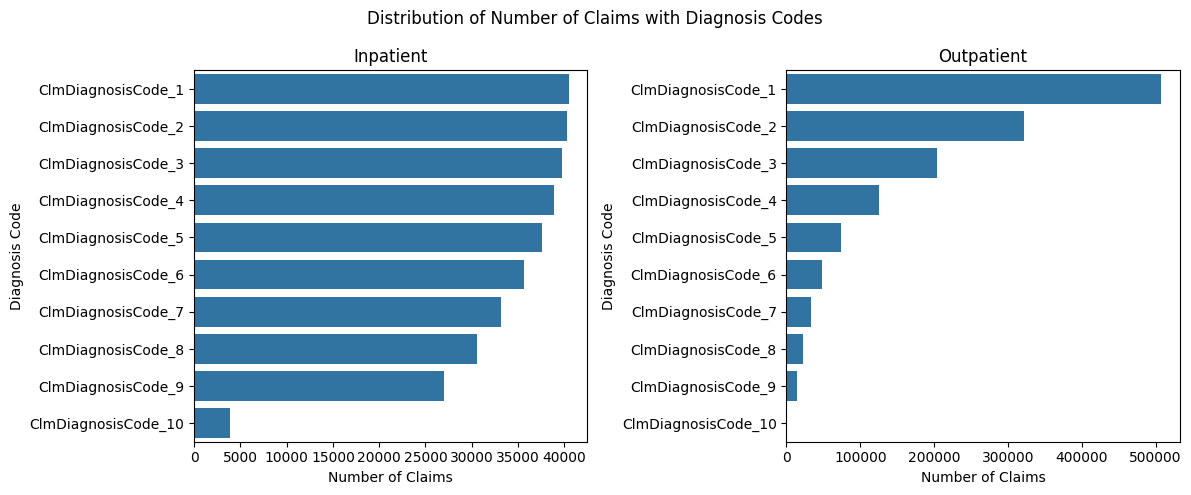

In [41]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.barplot(x=ip_diagnosis_counts.values, y=ip_diagnosis_counts.index, orient='h', ax=axes[0])
axes[0].set_title('Inpatient')
axes[0].set_ylabel('Diagnosis Code')
axes[0].set_xlabel('Number of Claims')

sns.barplot(x=op_diagnosis_counts.values, y=op_diagnosis_counts.index, orient='h', ax=axes[1])
axes[1].set_title('Outpatient')
axes[1].set_ylabel('Diagnosis Code')
axes[1].set_xlabel('Number of Claims')

plt.suptitle('Distribution of Number of Claims with Diagnosis Codes')
plt.tight_layout()
plt.show()

Inpatients have a wider variety of diagnosis codes associated with them than outpatients. It might be strange/suspicious to have outpatients associated with a high number of diagnosis codes. 

### add fraud status to this

In [44]:
inpatient[diagnosis_codes].count()

ClmDiagnosisCode_1     40474
ClmDiagnosisCode_2     40248
ClmDiagnosisCode_3     39798
ClmDiagnosisCode_4     38940
ClmDiagnosisCode_5     37580
ClmDiagnosisCode_6     35636
ClmDiagnosisCode_7     33216
ClmDiagnosisCode_8     30532
ClmDiagnosisCode_9     26977
ClmDiagnosisCode_10     3927
dtype: int64

In [45]:
# counts of diagnosis codes in claims associated with fraud provider
inpatient[inpatient['fraud_suspected'] == 'Y'][diagnosis_codes].count()

ClmDiagnosisCode_1     23402
ClmDiagnosisCode_2     23270
ClmDiagnosisCode_3     23005
ClmDiagnosisCode_4     22499
ClmDiagnosisCode_5     21714
ClmDiagnosisCode_6     20588
ClmDiagnosisCode_7     19206
ClmDiagnosisCode_8     17710
ClmDiagnosisCode_9     15666
ClmDiagnosisCode_10     2269
dtype: int64

In [46]:
# counts of diagnosis codes in claims not associated with fraud provider
inpatient[inpatient['fraud_suspected'] == 'N'][diagnosis_codes].count()

ClmDiagnosisCode_1     17072
ClmDiagnosisCode_2     16978
ClmDiagnosisCode_3     16793
ClmDiagnosisCode_4     16441
ClmDiagnosisCode_5     15866
ClmDiagnosisCode_6     15048
ClmDiagnosisCode_7     14010
ClmDiagnosisCode_8     12822
ClmDiagnosisCode_9     11311
ClmDiagnosisCode_10     1658
dtype: int64

In [47]:
# number of claims associated with fraud provider
len(inpatient[inpatient['fraud_suspected']=='Y'])

23402

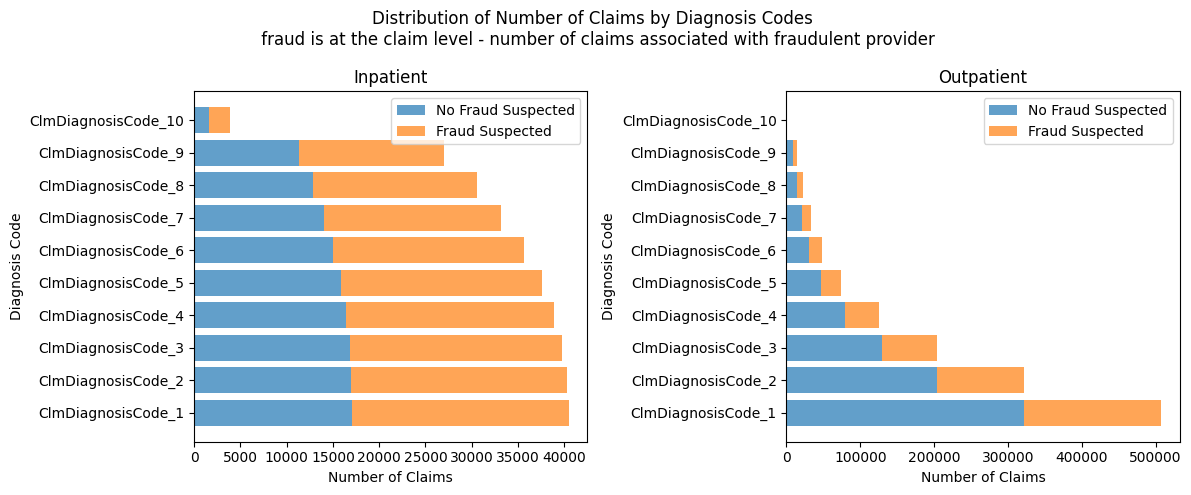

In [48]:
# get fraud counts
ip_fraud_y = inpatient[inpatient['fraud_suspected'] == 'Y'][diagnosis_codes].count()
ip_fraud_n = inpatient[inpatient['fraud_suspected'] == 'N'][diagnosis_codes].count()
op_fraud_y = outpatient[outpatient['fraud_suspected'] == 'Y'][diagnosis_codes].count()
op_fraud_n = outpatient[outpatient['fraud_suspected'] == 'N'][diagnosis_codes].count()

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

x_pos = range(len(diagnosis_codes))
axes[0].barh(x_pos, ip_fraud_n.values, label='No Fraud Suspected', alpha=0.7)
axes[0].barh(x_pos, ip_fraud_y.values, left=ip_fraud_n.values, label='Fraud Suspected', alpha=0.7)
axes[0].set_yticks(x_pos)
axes[0].set_yticklabels(ip_fraud_n.index)
axes[0].set_title('Inpatient')
axes[0].set_ylabel('Diagnosis Code')
axes[0].set_xlabel('Number of Claims')
axes[0].legend()

x_pos = range(len(diagnosis_codes))
axes[1].barh(x_pos, op_fraud_n.values, label='No Fraud Suspected', alpha=0.7)
axes[1].barh(x_pos, op_fraud_y.values, left=op_fraud_n.values, label='Fraud Suspected', alpha=0.7)
axes[1].set_yticks(x_pos)
axes[1].set_yticklabels(op_fraud_n.index)
axes[1].set_title('Outpatient')
axes[1].set_ylabel('Diagnosis Code')
axes[1].set_xlabel('Number of Claims')
axes[1].legend()

plt.suptitle('Distribution of Number of Claims by Diagnosis Codes \n fraud is at the claim level - number of claims associated with fraudulent provider')
plt.tight_layout()
plt.show()

**These are not claims suspected of fraud, but claims with providers suspected of fraud.**

From previous EDA, there is more suspected fraud with inpatients than outpatients (21% and 9.2%).
These fraud counts are the **number of claims** associated with a suspected provider. But fraud suspicion is associated with the provider, not the claim. **So this may not be helpful...** 

In [50]:
# get procedure code counts 
ip_procedure_counts = inpatient[procedure_codes].count()
op_procedure_counts = outpatient[procedure_codes].count()

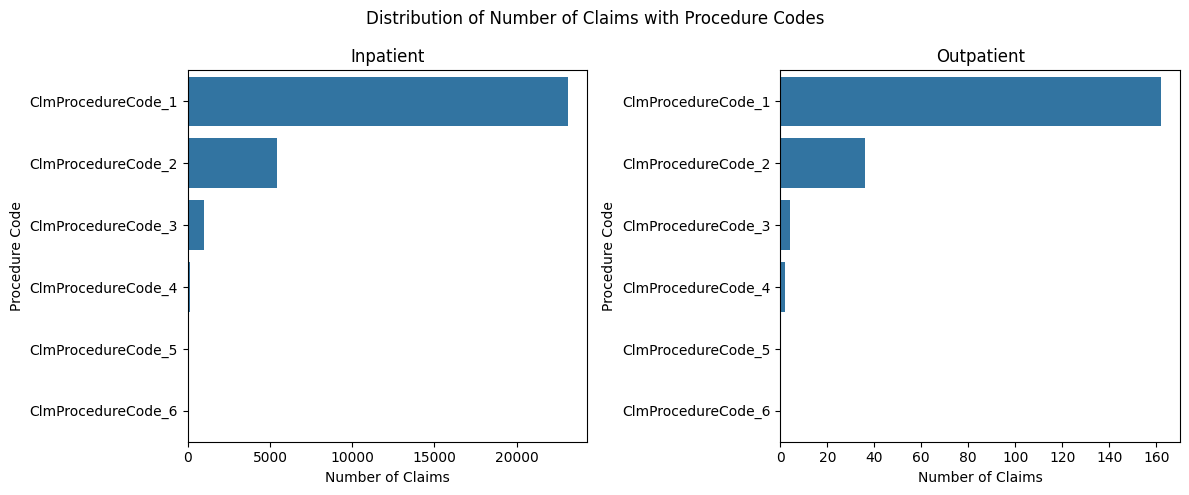

In [51]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.barplot(x=ip_procedure_counts.values, y=ip_procedure_counts.index, orient='h', ax=axes[0])
axes[0].set_title('Inpatient')
axes[0].set_ylabel('Procedure Code')
axes[0].set_xlabel('Number of Claims')

sns.barplot(x=op_procedure_counts.values, y=op_procedure_counts.index, orient='h', ax=axes[1])
axes[1].set_title('Outpatient')
axes[1].set_ylabel('Procedure Code')
axes[1].set_xlabel('Number of Claims')

plt.suptitle('Distribution of Number of Claims with Procedure Codes')
plt.tight_layout()
plt.show()

This just shows that most inpatients and outpatients are associated with 1 procedure code. Some with 2. Very few with 3 or more. 

### What primary diagnosis codes or procedure codes are patients associated with? 

In [54]:
print(f'Top Inpatient Primary Claim Diagnosis Codes and Counts:', inpatient['ClmDiagnosisCode_1'].value_counts().head(10))
print(f'Top Outpatient Primary Claim Diagnosis Codes and Counts:', outpatient['ClmDiagnosisCode_1'].value_counts().head(10))

Top Inpatient Primary Claim Diagnosis Codes and Counts: ClmDiagnosisCode_1
486      1499
V5789    1158
41401    1088
49121     974
0389      945
5990      844
4280      825
42731     760
41071     718
71536     713
Name: count, dtype: int64
Top Outpatient Primary Claim Diagnosis Codes and Counts: ClmDiagnosisCode_1
4019     13803
4011     12512
2724      3603
2720      3209
2722      3028
2721      2998
2723      2995
78651     2251
78659     2181
78650     2179
Name: count, dtype: int64


In [55]:
print(f'Top Inpatient Claim Admit Diagnosis Codes and Counts:', inpatient['ClmAdmitDiagnosisCode'].value_counts().head(10))
print(f'Top Outpatient Claim Admit Diagnosis Codes and Counts:', outpatient['ClmAdmitDiagnosisCode'].value_counts().head(10))

Top Inpatient Claim Admit Diagnosis Codes and Counts: ClmAdmitDiagnosisCode
78650    1731
78605    1669
486      1438
4280     1106
7802     1018
V5789     960
78097     859
78900     786
78079     781
49121     651
Name: count, dtype: int64
Top Outpatient Claim Admit Diagnosis Codes and Counts: ClmAdmitDiagnosisCode
V7612    4074
42731    3001
4019     2627
25000    2346
V5883    1871
7295     1616
78900    1550
V5861    1536
2724     1506
7242     1432
Name: count, dtype: int64


In [56]:
print(f'Top Inpatient Primary Procedure Codes and Counts:', inpatient['ClmProcedureCode_1'].value_counts().head(10))
print(f'Top Outpatient Primary Procedure Codes and Counts:', outpatient['ClmProcedureCode_1'].value_counts().head(10))

Top Inpatient Primary Procedure Codes and Counts: ClmProcedureCode_1
9904.0    1137
8154.0    1021
66.0       893
3893.0     849
3995.0     805
4516.0     643
3722.0     581
8151.0     462
8872.0     409
9671.0     401
Name: count, dtype: int64
Top Outpatient Primary Procedure Codes and Counts: ClmProcedureCode_1
9904.0    15
3722.0     8
4516.0     8
66.0       7
5123.0     7
9672.0     5
3893.0     5
9952.0     5
9955.0     4
8622.0     4
Name: count, dtype: int64


### tabulate my findings better
- Diagnosis_Codes: codes included in selected features (BeneID, Provider)
- Total_Duplicates: number of claims with duplicates in selected features
- Fraud_Duplicates: number of those duplicates associated with suspected provider
- Fraud_Percentage: percentage of all duplicates associated with suspected provider

**Diagnosis Codes:**

In [58]:
# FRAUD PROVIDERS
# tabulate duplicate INPATIENT claims based on common BeneID, Provider, and combinations of diagnosis codes
results = []

for i in range(1, len(diagnosis_codes) + 1):
    # Get the codes to use for this iteration
    codes_to_use = diagnosis_codes[:i]
    
    # Create label
    if i == 1:
        label = "Diagnosis Codes 1"
    else:
        label = f"Diagnosis Codes 1-{i}"
    
    # Group and count
    duplicate_ip_groups = inpatient.groupby(
        ['BeneID', 'Provider'] + codes_to_use
    ).size().reset_index(name='count')
    
    # Filter for duplicates
    duplicate_ip_groups = duplicate_ip_groups[duplicate_ip_groups['count'] > 1]
    
    # Get duplicate claims
    duplicate_ip_claims = inpatient.merge(
        duplicate_ip_groups,
        on=['BeneID', 'Provider'] + codes_to_use,
        how='inner'
    )
    
    # Calculate counts and percentage
    total_duplicates = len(duplicate_ip_claims)
    fraud_duplicates = len(duplicate_ip_claims[duplicate_ip_claims['fraud_suspected']=='Y'])
    fraud_percentage = (fraud_duplicates / total_duplicates * 100) if total_duplicates > 0 else 0
    
    # Append results
    results.append({
        'Diagnosis_Codes': label,
        'Total_Duplicates': total_duplicates,
        'Fraud_Duplicates': fraud_duplicates,
        'Fraud_Percentage': fraud_percentage
    })

# Convert to dataframe
results_df = pd.DataFrame(results)
print('Common BeneID, INPATIENT FRAUD Provider, and combinations of Diagnosis Codes:')
print(results_df)

Common BeneID, INPATIENT FRAUD Provider, and combinations of Diagnosis Codes:
        Diagnosis_Codes  Total_Duplicates  Fraud_Duplicates  Fraud_Percentage
0     Diagnosis Codes 1               137               115         83.941606
1   Diagnosis Codes 1-2                36                36        100.000000
2   Diagnosis Codes 1-3                36                36        100.000000
3   Diagnosis Codes 1-4                32                32        100.000000
4   Diagnosis Codes 1-5                32                32        100.000000
5   Diagnosis Codes 1-6                32                32        100.000000
6   Diagnosis Codes 1-7                32                32        100.000000
7   Diagnosis Codes 1-8                26                26        100.000000
8   Diagnosis Codes 1-9                22                22        100.000000
9  Diagnosis Codes 1-10                 6                 6        100.000000


In [59]:
# NON FRAUD PROVIDERS
# tabulate duplicate INPATIENT claims based on common BeneID, Provider, and combinations of diagnosis codes
results = []

for i in range(1, len(diagnosis_codes) + 1):
    # Get the codes to use for this iteration
    codes_to_use = diagnosis_codes[:i]
    
    # Create label
    if i == 1:
        label = "Diagnosis Codes 1"
    else:
        label = f"Diagnosis Codes 1-{i}"
    
    # Group and count
    duplicate_ip_groups = inpatient.groupby(
        ['BeneID', 'Provider'] + codes_to_use
    ).size().reset_index(name='count')
    
    # Filter for duplicates
    duplicate_ip_groups = duplicate_ip_groups[duplicate_ip_groups['count'] > 1]
    
    # Get duplicate claims
    duplicate_ip_claims = inpatient.merge(
        duplicate_ip_groups,
        on=['BeneID', 'Provider'] + codes_to_use,
        how='inner'
    )
    
    # Calculate counts and percentage
    total_duplicates = len(duplicate_ip_claims)
    fraud_duplicates = len(duplicate_ip_claims[duplicate_ip_claims['fraud_suspected']=='N'])
    fraud_percentage = (fraud_duplicates / total_duplicates * 100) if total_duplicates > 0 else 0
    
    # Append results
    results.append({
        'Diagnosis_Codes': label,
        'Total_Duplicates': total_duplicates,
        'Fraud_Duplicates': fraud_duplicates,
        'Fraud_Percentage': fraud_percentage
    })

# Convert to dataframe
results_df = pd.DataFrame(results)
print('Common BeneID, INPATIENT NON FRAUD Provider, and combinations of Diagnosis Codes:')
print(results_df)

Common BeneID, INPATIENT NON FRAUD Provider, and combinations of Diagnosis Codes:
        Diagnosis_Codes  Total_Duplicates  Fraud_Duplicates  Fraud_Percentage
0     Diagnosis Codes 1               137                22         16.058394
1   Diagnosis Codes 1-2                36                 0          0.000000
2   Diagnosis Codes 1-3                36                 0          0.000000
3   Diagnosis Codes 1-4                32                 0          0.000000
4   Diagnosis Codes 1-5                32                 0          0.000000
5   Diagnosis Codes 1-6                32                 0          0.000000
6   Diagnosis Codes 1-7                32                 0          0.000000
7   Diagnosis Codes 1-8                26                 0          0.000000
8   Diagnosis Codes 1-9                22                 0          0.000000
9  Diagnosis Codes 1-10                 6                 0          0.000000


In [60]:
# FRAUD PROVIDERS
# tabulate duplicate OUTPATIENT claims based on common BeneID, Provider, and combinations of diagnosis codes
results = []

for i in range(1, len(diagnosis_codes) + 1):
    # Get the codes to use for this iteration
    codes_to_use = diagnosis_codes[:i]
    
    # Create label
    if i == 1:
        label = "Diagnosis Codes 1"
    else:
        label = f"Diagnosis Codes 1-{i}"
    
    # Group and count
    duplicate_op_groups = outpatient.groupby(
        ['BeneID', 'Provider'] + codes_to_use
    ).size().reset_index(name='count')
    
    # Filter for duplicates
    duplicate_op_groups = duplicate_op_groups[duplicate_op_groups['count'] > 1]
    
    # Get duplicate claims
    duplicate_op_claims = outpatient.merge(
        duplicate_op_groups,
        on=['BeneID', 'Provider'] + codes_to_use,
        how='inner'
    )
    
    # Calculate counts and percentage
    total_duplicates = len(duplicate_op_claims)
    fraud_duplicates = len(duplicate_op_claims[duplicate_op_claims['fraud_suspected']=='Y'])
    fraud_percentage = (fraud_duplicates / total_duplicates * 100) if total_duplicates > 0 else 0
    
    # Append results
    results.append({
        'Diagnosis_Codes': label,
        'Total_Duplicates': total_duplicates,
        'Fraud_Duplicates': fraud_duplicates,
        'Fraud_Percentage': fraud_percentage
    })

# Convert to dataframe
print('Common BeneID, OUTPATIENT FRAUD Provider, and combinations of Diagnosis Codes:')
results_df = pd.DataFrame(results)
print(results_df)

Common BeneID, OUTPATIENT FRAUD Provider, and combinations of Diagnosis Codes:
        Diagnosis_Codes  Total_Duplicates  Fraud_Duplicates  Fraud_Percentage
0     Diagnosis Codes 1              4274              2136         49.976603
1   Diagnosis Codes 1-2               280               153         54.642857
2   Diagnosis Codes 1-3                50                26         52.000000
3   Diagnosis Codes 1-4                14                 6         42.857143
4   Diagnosis Codes 1-5                10                 4         40.000000
5   Diagnosis Codes 1-6                 8                 2         25.000000
6   Diagnosis Codes 1-7                 6                 2         33.333333
7   Diagnosis Codes 1-8                 6                 2         33.333333
8   Diagnosis Codes 1-9                 6                 2         33.333333
9  Diagnosis Codes 1-10                 0                 0          0.000000


In [61]:
# NON FRAUD PROVIDERS
# tabulate duplicate OUTPATIENT claims based on common BeneID, Provider, and combinations of diagnosis codes
results = []

for i in range(1, len(diagnosis_codes) + 1):
    # Get the codes to use for this iteration
    codes_to_use = diagnosis_codes[:i]
    
    # Create label
    if i == 1:
        label = "Diagnosis Codes 1"
    else:
        label = f"Diagnosis Codes 1-{i}"
    
    # Group and count
    duplicate_op_groups = outpatient.groupby(
        ['BeneID', 'Provider'] + codes_to_use
    ).size().reset_index(name='count')
    
    # Filter for duplicates
    duplicate_op_groups = duplicate_op_groups[duplicate_op_groups['count'] > 1]
    
    # Get duplicate claims
    duplicate_op_claims = outpatient.merge(
        duplicate_op_groups,
        on=['BeneID', 'Provider'] + codes_to_use,
        how='inner'
    )
    
    # Calculate counts and percentage
    total_duplicates = len(duplicate_op_claims)
    fraud_duplicates = len(duplicate_op_claims[duplicate_op_claims['fraud_suspected']=='N'])
    fraud_percentage = (fraud_duplicates / total_duplicates * 100) if total_duplicates > 0 else 0
    
    # Append results
    results.append({
        'Diagnosis_Codes': label,
        'Total_Duplicates': total_duplicates,
        'Fraud_Duplicates': fraud_duplicates,
        'Fraud_Percentage': fraud_percentage
    })

# Convert to dataframe
print('Common BeneID, OUTPATIENT NON FRAUD Provider, and combinations of Diagnosis Codes:')
results_df = pd.DataFrame(results)
print(results_df)

Common BeneID, OUTPATIENT NON FRAUD Provider, and combinations of Diagnosis Codes:
        Diagnosis_Codes  Total_Duplicates  Fraud_Duplicates  Fraud_Percentage
0     Diagnosis Codes 1              4274              2138         50.023397
1   Diagnosis Codes 1-2               280               127         45.357143
2   Diagnosis Codes 1-3                50                24         48.000000
3   Diagnosis Codes 1-4                14                 8         57.142857
4   Diagnosis Codes 1-5                10                 6         60.000000
5   Diagnosis Codes 1-6                 8                 6         75.000000
6   Diagnosis Codes 1-7                 6                 4         66.666667
7   Diagnosis Codes 1-8                 6                 4         66.666667
8   Diagnosis Codes 1-9                 6                 4         66.666667
9  Diagnosis Codes 1-10                 0                 0          0.000000


**Procedure codes:**

In [63]:
# FRAUD PROVIDERS
# tabulate INPATIENT duplicate claims based on common BeneID, Provider, and combinations of procedure codes
results = []

for i in range(1, len(procedure_codes) + 1):
    # Get the codes to use for this iteration
    codes_to_use = procedure_codes[:i]
    
    # Create label
    if i == 1:
        label = "Procedure Codes 1"
    else:
        label = f"Procedure Codes 1-{i}"
    
    # Group and count
    duplicate_ip_groups = inpatient.groupby(
        ['BeneID', 'Provider'] + codes_to_use
    ).size().reset_index(name='count')
    
    # Filter for duplicates
    duplicate_ip_groups = duplicate_ip_groups[duplicate_ip_groups['count'] > 1]
    
    # Get duplicate claims
    duplicate_ip_claims = inpatient.merge(
        duplicate_ip_groups,
        on=['BeneID', 'Provider'] + codes_to_use,
        how='inner'
    )
    
    # Calculate counts and percentage
    total_duplicates = len(duplicate_ip_claims)
    fraud_duplicates = len(duplicate_ip_claims[duplicate_ip_claims['fraud_suspected']=='Y'])
    fraud_percentage = (fraud_duplicates / total_duplicates * 100) if total_duplicates > 0 else 0
    
    # Append results
    results.append({
        'Procedure_Codes': label,
        'Total_Duplicates': total_duplicates,
        'Fraud_Duplicates': fraud_duplicates,
        'Fraud_Percentage': fraud_percentage
    })

# Convert to dataframe
results_df = pd.DataFrame(results)
print('Common BeneID, INPATIENT FRAUD Provider, and combinations of Procedure Codes:')
print(results_df)

Common BeneID, INPATIENT FRAUD Provider, and combinations of Procedure Codes:
       Procedure_Codes  Total_Duplicates  Fraud_Duplicates  Fraud_Percentage
0    Procedure Codes 1               102                86         84.313725
1  Procedure Codes 1-2                 6                 6        100.000000
2  Procedure Codes 1-3                 0                 0          0.000000
3  Procedure Codes 1-4                 0                 0          0.000000
4  Procedure Codes 1-5                 0                 0          0.000000
5  Procedure Codes 1-6                 0                 0          0.000000


In [64]:
# NON FRAUD PROVIDERS
# tabulate INPATIENT duplicate claims based on common BeneID, Provider, and combinations of procedure codes
results = []

for i in range(1, len(procedure_codes) + 1):
    # Get the codes to use for this iteration
    codes_to_use = procedure_codes[:i]
    
    # Create label
    if i == 1:
        label = "Procedure Codes 1"
    else:
        label = f"Procedure Codes 1-{i}"
    
    # Group and count
    duplicate_ip_groups = inpatient.groupby(
        ['BeneID', 'Provider'] + codes_to_use
    ).size().reset_index(name='count')
    
    # Filter for duplicates
    duplicate_ip_groups = duplicate_ip_groups[duplicate_ip_groups['count'] > 1]
    
    # Get duplicate claims
    duplicate_ip_claims = inpatient.merge(
        duplicate_ip_groups,
        on=['BeneID', 'Provider'] + codes_to_use,
        how='inner'
    )
    
    # Calculate counts and percentage
    total_duplicates = len(duplicate_ip_claims)
    fraud_duplicates = len(duplicate_ip_claims[duplicate_ip_claims['fraud_suspected']=='N'])
    fraud_percentage = (fraud_duplicates / total_duplicates * 100) if total_duplicates > 0 else 0
    
    # Append results
    results.append({
        'Procedure_Codes': label,
        'Total_Duplicates': total_duplicates,
        'Fraud_Duplicates': fraud_duplicates,
        'Fraud_Percentage': fraud_percentage
    })

# Convert to dataframe
results_df = pd.DataFrame(results)
print('Common BeneID, INPATIENT NON FRAUD Provider, and combinations of Procedure Codes:')
print(results_df)

Common BeneID, INPATIENT NON FRAUD Provider, and combinations of Procedure Codes:
       Procedure_Codes  Total_Duplicates  Fraud_Duplicates  Fraud_Percentage
0    Procedure Codes 1               102                16         15.686275
1  Procedure Codes 1-2                 6                 0          0.000000
2  Procedure Codes 1-3                 0                 0          0.000000
3  Procedure Codes 1-4                 0                 0          0.000000
4  Procedure Codes 1-5                 0                 0          0.000000
5  Procedure Codes 1-6                 0                 0          0.000000


In [65]:
# FRAUD PROVIDERS
# tabulate OUTPATIENT duplicate claims based on common BeneID, Provider, and combinations of procedure codes
results = []

for i in range(1, len(procedure_codes) + 1):
    # Get the codes to use for this iteration
    codes_to_use = procedure_codes[:i]
    
    # Create label
    if i == 1:
        label = "Procedure Codes 1"
    else:
        label = f"Procedure Codes 1-{i}"
    
    # Group and count
    duplicate_op_groups = outpatient.groupby(
        ['BeneID', 'Provider'] + codes_to_use
    ).size().reset_index(name='count')
    
    # Filter for duplicates
    duplicate_op_groups = duplicate_op_groups[duplicate_op_groups['count'] > 1]
    
    # Get duplicate claims
    duplicate_op_claims = outpatient.merge(
        duplicate_op_groups,
        on=['BeneID', 'Provider'] + codes_to_use,
        how='inner'
    )
    
    # Calculate counts and percentage
    total_duplicates = len(duplicate_op_claims)
    fraud_duplicates = len(duplicate_op_claims[duplicate_op_claims['fraud_suspected']=='Y'])
    fraud_percentage = (fraud_duplicates / total_duplicates * 100) if total_duplicates > 0 else 0
    
    # Append results
    results.append({
        'Procedure_Codes': label,
        'Total_Duplicates': total_duplicates,
        'Fraud_Duplicates': fraud_duplicates,
        'Fraud_Percentage': fraud_percentage
    })

# Convert to dataframe
print('Common BeneID, OUTPATIENT FRAUD Provider, and combinations of Procedure Codes:')
results_df = pd.DataFrame(results)
print(results_df)

Common BeneID, OUTPATIENT FRAUD Provider, and combinations of Procedure Codes:
       Procedure_Codes  Total_Duplicates  Fraud_Duplicates  Fraud_Percentage
0    Procedure Codes 1                 0                 0                 0
1  Procedure Codes 1-2                 0                 0                 0
2  Procedure Codes 1-3                 0                 0                 0
3  Procedure Codes 1-4                 0                 0                 0
4  Procedure Codes 1-5                 0                 0                 0
5  Procedure Codes 1-6                 0                 0                 0


In [66]:
# NON FRAUD PROVIDERS
# tabulate OUTPATIENT duplicate claims based on common BeneID, Provider, and combinations of procedure codes
results = []

for i in range(1, len(procedure_codes) + 1):
    # Get the codes to use for this iteration
    codes_to_use = procedure_codes[:i]
    
    # Create label
    if i == 1:
        label = "Procedure Codes 1"
    else:
        label = f"Procedure Codes 1-{i}"
    
    # Group and count
    duplicate_op_groups = outpatient.groupby(
        ['BeneID', 'Provider'] + codes_to_use
    ).size().reset_index(name='count')
    
    # Filter for duplicates
    duplicate_op_groups = duplicate_op_groups[duplicate_op_groups['count'] > 1]
    
    # Get duplicate claims
    duplicate_op_claims = outpatient.merge(
        duplicate_op_groups,
        on=['BeneID', 'Provider'] + codes_to_use,
        how='inner'
    )
    
    # Calculate counts and percentage
    total_duplicates = len(duplicate_op_claims)
    fraud_duplicates = len(duplicate_op_claims[duplicate_op_claims['fraud_suspected']=='N'])
    fraud_percentage = (fraud_duplicates / total_duplicates * 100) if total_duplicates > 0 else 0
    
    # Append results
    results.append({
        'Procedure_Codes': label,
        'Total_Duplicates': total_duplicates,
        'Fraud_Duplicates': fraud_duplicates,
        'Fraud_Percentage': fraud_percentage
    })

# Convert to dataframe
print('Common BeneID, OUTPATIENT NON FRAUD Provider, and combinations of Procedure Codes:')
results_df = pd.DataFrame(results)
print(results_df)

Common BeneID, OUTPATIENT NON FRAUD Provider, and combinations of Procedure Codes:
       Procedure_Codes  Total_Duplicates  Fraud_Duplicates  Fraud_Percentage
0    Procedure Codes 1                 0                 0                 0
1  Procedure Codes 1-2                 0                 0                 0
2  Procedure Codes 1-3                 0                 0                 0
3  Procedure Codes 1-4                 0                 0                 0
4  Procedure Codes 1-5                 0                 0                 0
5  Procedure Codes 1-6                 0                 0                 0


### admit codes

Look at IP/OP duplicates with common ClmAdmitDiagnosisCode

In [68]:
# get counts duplicates in selected columns and filter for multiple counts
duplicate_ip_groups_admit = inpatient.groupby(
    ['BeneID', 'Provider', 'ClmAdmitDiagnosisCode']
).size().reset_index(name='count')

duplicate_op_groups_admit = outpatient.groupby(
    ['BeneID', 'Provider', 'ClmAdmitDiagnosisCode']
).size().reset_index(name='count')

duplicate_ip_groups_admit = duplicate_ip_groups_admit[duplicate_ip_groups_admit['count'] > 1]
duplicate_op_groups_admit = duplicate_op_groups_admit[duplicate_op_groups_admit['count'] > 1]

In [69]:
# get rows that are part of duplicate groups
duplicate_ip_claims_admit = inpatient.merge(
    duplicate_ip_groups_admit[duplicate_ip_groups_admit['count'] > 1],
    on=['BeneID', 'Provider', 'ClmAdmitDiagnosisCode'],
    how='inner'
)
duplicate_op_claims_admit = outpatient.merge(
    duplicate_op_groups_admit[duplicate_op_groups_admit['count'] > 1],
    on=['BeneID', 'Provider', 'ClmAdmitDiagnosisCode'],
    how='inner'
)

In [70]:
duplicate_ip_claims_admit#['ClmAdmitDiagnosisCode']

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,fraud_suspected,count
0,BENE11093,CLM32146,2009-01-03,2009-01-09,PRV51842,20000,PHY341192,PHY355416,NaN,2009-01-03,...,412,42732,3950.0,2762.0,NaN,NaN,NaN,NaN,Y,2
1,BENE11093,CLM82202,2009-01-03,2009-01-12,PRV51842,20000,PHY341192,PHY355416,NaN,2009-01-03,...,412,42732,3950.0,2762.0,NaN,NaN,NaN,NaN,Y,2
2,BENE12160,CLM37793,2009-02-10,2009-02-13,PRV55019,9000,PHY414914,PHY411563,NaN,2009-02-10,...,V1582,NaN,3722.0,NaN,NaN,NaN,NaN,NaN,Y,2
3,BENE12160,CLM42669,2009-03-15,2009-03-18,PRV55019,2000,PHY319099,NaN,NaN,2009-03-15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,2
4,BENE12647,CLM36873,2009-02-04,2009-02-08,PRV52846,9000,PHY345634,NaN,NaN,2009-02-04,...,49121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,BENE156173,CLM47184,2009-04-16,2009-05-21,PRV55195,48000,PHY425416,PHY425416,NaN,2009-04-16,...,5990,NaN,8622.0,NaN,NaN,NaN,NaN,NaN,Y,2
180,BENE156866,CLM34949,2009-01-21,2009-01-27,PRV57409,20000,PHY415120,PHY423087,NaN,2009-01-21,...,6822,NaN,540.0,NaN,NaN,NaN,NaN,NaN,Y,2
181,BENE156866,CLM82219,2009-01-21,2009-01-28,PRV57409,20000,PHY415120,PHY423087,NaN,2009-01-21,...,6822,NaN,540.0,NaN,NaN,NaN,NaN,NaN,Y,2
182,BENE158350,CLM60387,2009-07-19,2009-07-27,PRV51495,11000,PHY358767,PHY356615,PHY358767,2009-07-19,...,25000,NaN,9390.0,NaN,NaN,NaN,NaN,NaN,Y,2


In [71]:
ip_admit = duplicate_ip_claims_admit[['BeneID', 'Provider', 'ClmAdmitDiagnosisCode', 'fraud_suspected']]
op_admit = duplicate_op_claims_admit[['BeneID', 'Provider', 'ClmAdmitDiagnosisCode', 'fraud_suspected']]
print('number of duplicate inpatient claims with common admit codes:', len(ip_admit))
print('number of inpatient duplicate claims associated with fraud provider:', len(ip_admit[ip_admit['fraud_suspected']=='Y']))
print('...')
print('number of duplicate outpatient claims with common admit codes:', len(op_admit))
print('number of outpatient duplicate claims associated with fraud provider:', len(op_admit[op_admit['fraud_suspected']=='Y']))


number of duplicate inpatient claims with common admit codes: 184
number of inpatient duplicate claims associated with fraud provider: 151
...
number of duplicate outpatient claims with common admit codes: 1148
number of outpatient duplicate claims associated with fraud provider: 581


- 82% of duplicate inpatient claims with a common admit code are associated with a fraud provider.
- 51% of duplicate outpatient claims with a common admit code are associated with a fraud provider.

**Having a common admit code is more common in inpatient claims associated with a fraud provider.**

### BeneID and reimbursement (across providers)

In [74]:
# get counts duplicates in selected columns and filter for multiple counts
duplicate_ip_groups_across = inpatient.groupby(
    ['BeneID', 'InscClaimAmtReimbursed']
).size().reset_index(name='count')

duplicate_op_groups_across = outpatient.groupby(
    ['BeneID', 'InscClaimAmtReimbursed']
).size().reset_index(name='count')

duplicate_ip_groups_across = duplicate_ip_groups_across[duplicate_ip_groups_across['count'] > 1]
duplicate_op_groups_across = duplicate_op_groups_across[duplicate_op_groups_across['count'] > 1]

In [75]:
# get rows that are part of duplicate groups
duplicate_ip_claims_across = inpatient.merge(
    duplicate_ip_groups_across[duplicate_ip_groups_across['count'] > 1],
    on=['BeneID', 'InscClaimAmtReimbursed'],
    how='inner'
)
duplicate_op_claims_across = outpatient.merge(
    duplicate_op_groups_across[duplicate_op_groups_across['count'] > 1],
    on=['BeneID', 'InscClaimAmtReimbursed'],
    how='inner'
)

In [76]:
duplicate_ip_claims_across

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,fraud_suspected,count
0,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN,N,2
1,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,2
2,BENE11093,CLM32146,2009-01-03,2009-01-09,PRV51842,20000,PHY341192,PHY355416,NaN,2009-01-03,...,412,42732,3950.0,2762.0,NaN,NaN,NaN,NaN,Y,2
3,BENE11093,CLM82202,2009-01-03,2009-01-12,PRV51842,20000,PHY341192,PHY355416,NaN,2009-01-03,...,412,42732,3950.0,2762.0,NaN,NaN,NaN,NaN,Y,2
4,BENE11494,CLM60797,2009-07-23,2009-07-26,PRV51501,4000,PHY348953,NaN,NaN,2009-07-23,...,70710,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,BENE158900,CLM45501,2009-04-04,2009-04-12,PRV53210,4000,PHY417893,PHY417893,PHY321304,2009-04-04,...,4280,NaN,8872.0,NaN,NaN,NaN,NaN,NaN,N,2
1554,BENE159045,CLM40726,2009-03-01,2009-03-04,PRV51405,5000,PHY411654,NaN,NaN,2009-03-01,...,5859,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,2
1555,BENE159045,CLM60539,2009-07-20,2009-07-30,PRV51456,5000,PHY428454,NaN,NaN,2009-07-20,...,2724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,2
1556,BENE159079,CLM40563,2009-02-28,2009-03-04,PRV52574,4000,PHY346274,NaN,NaN,2009-02-28,...,4240,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,2


In [77]:
ip_across = duplicate_ip_claims_across[['BeneID', 'Provider', 'ClaimStartDt', 'ClmAdmitDiagnosisCode', 'fraud_suspected']]
op_across = duplicate_op_claims_across[['BeneID', 'Provider', 'ClaimStartDt', 'ClmAdmitDiagnosisCode', 'fraud_suspected']]
print('number of duplicate inpatient claims with common beneID and reimbursement:', len(ip_across))
print('number of inpatient duplicate claims associated with fraud provider:', len(ip_admit[ip_across['fraud_suspected']=='Y']))
print('...')
print('number of duplicate outpatient claims with common beneID and reimbursement:', len(op_across))
print('number of outpatient duplicate claims associated with fraud provider:', len(op_admit[op_across['fraud_suspected']=='Y']))

number of duplicate inpatient claims with common beneID and reimbursement: 1558
number of inpatient duplicate claims associated with fraud provider: 124
...
number of duplicate outpatient claims with common beneID and reimbursement: 131312
number of outpatient duplicate claims associated with fraud provider: 425


/var/folders/tn/yy89yz_94q5b571nxcz7c_2m0000gn/T/ipykernel_49814/1610560313.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print('number of inpatient duplicate claims associated with fraud provider:', len(ip_admit[ip_across['fraud_suspected']=='Y']))
/var/folders/tn/yy89yz_94q5b571nxcz7c_2m0000gn/T/ipykernel_49814/1610560313.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print('number of outpatient duplicate claims associated with fraud provider:', len(op_admit[op_across['fraud_suspected']=='Y']))


# Using the various diagnosis codes, procedure codes, admit diagnosis codes as the key features, please identify the duplicated claims in the inpatients_train, outpatients_train data.

see above

create a dataframe of 'duplicate_claims' to use for analysis? 

**What features to use to define duplicates?**
- BeneID
- Provider
- Diagnosis Codes 1 and 2 ?

create list of providers...

# Are these potentially fraudulent providers duplicating their own medical records, or are they using the records from the other providers?

*What is this asking? To compare across providers?*

So far, have been looking at claims with common providers. 
How to compare across providers? 

In [80]:
inpatient.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'fraud_suspected'],
      dtype='object')

In [81]:
inpatient.head(2)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,fraud_suspected
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN,N


### Identify shared patient populations among providers

Want to understand whether providers are copying patient claims from other providers.

In [83]:
# get a list of providers associated with each beneficiary
inpatient_providers = inpatient.groupby('BeneID')['Provider'].apply(list).reset_index()
inpatient_providers.columns = ['BeneID', 'Providers']

outpatient_providers = outpatient.groupby('BeneID')['Provider'].apply(list).reset_index()
outpatient_providers.columns = ['BeneID', 'Providers']

In [84]:
outpatient_providers.head(2)

,BeneID,Providers
0,BENE100000,"[PRV57172, PRV57172]"
1,BENE100001,"[PRV55158, PRV54966, PRV54890, PRV55158, PRV54..."


In [85]:
# get a provider count for each beneficiary
inpatient_providers['num_providers'] = inpatient_providers['Providers'].apply(len)
outpatient_providers['num_providers'] = outpatient_providers['Providers'].apply(len)

In [86]:
outpatient_providers.head(2)

,BeneID,Providers,num_providers
0,BENE100000,"[PRV57172, PRV57172]",2
1,BENE100001,"[PRV55158, PRV54966, PRV54890, PRV55158, PRV54...",10


In [87]:
# keep only those patients seen by multiple providers
shared_inpatients = inpatient_providers[inpatient_providers['num_providers'] > 1]
shared_outpatients = outpatient_providers[outpatient_providers['num_providers'] > 1]

In [88]:
shared_outpatients

,BeneID,Providers,num_providers
0,BENE100000,"[PRV57172, PRV57172]",2
1,BENE100001,"[PRV55158, PRV54966, PRV54890, PRV55158, PRV54...",10
2,BENE100002,"[PRV54890, PRV55064, PRV55104, PRV55006, PRV56...",13
4,BENE100004,"[PRV52901, PRV52962, PRV52962, PRV53269, PRV52...",5
5,BENE100005,"[PRV51459, PRV51459, PRV51743]",3
...,...,...,...
133974,BENE99993,"[PRV52617, PRV52630, PRV52660]",3
133975,BENE99994,"[PRV56738, PRV56738, PRV57018, PRV56608, PRV56...",7
133977,BENE99997,"[PRV53621, PRV53621, PRV57149, PRV53621, PRV53...",7
133978,BENE99998,"[PRV56575, PRV57709, PRV56575]",3


In [89]:
print(f"number of inpatient patients: {inpatient['BeneID'].nunique()}")
print(f"number of inpatients seen by multiple providers: {len(shared_inpatients)}")

number of inpatient patients: 31289
number of inpatients seen by multiple providers: 7008


In [90]:
print(f"number of outpatient patients: {outpatient['BeneID'].nunique()}")
print(f"number of outpatients seen by multiple providers: {len(shared_outpatients)}")

number of outpatient patients: 133980
number of outpatients seen by multiple providers: 100349


In [91]:
# Create a provider-to-provider sharing matrix
# This shows how many patients each pair of providers shares
from itertools import combinations

# inpatient
provider_ip_pairs = []
for _, row in shared_inpatients.iterrows():
    providers = list(set(row['Providers']))  # Remove duplicates
    if len(providers) > 1:
        for prov1, prov2 in combinations(providers, 2):
            provider_ip_pairs.append({'Provider1': prov1, 'Provider2': prov2, 'BeneID': row['BeneID']})

provider_ip_pairs_df = pd.DataFrame(provider_ip_pairs)

# outpatient 
provider_op_pairs = []
for _, row in shared_outpatients.iterrows():
    providers = list(set(row['Providers']))  # Remove duplicates
    if len(providers) > 1:
        for prov1, prov2 in combinations(providers, 2):
            provider_op_pairs.append({'Provider1': prov1, 'Provider2': prov2, 'BeneID': row['BeneID']})

provider_op_pairs_df = pd.DataFrame(provider_op_pairs)

In [92]:
provider_ip_pairs_df

,Provider1,Provider2,BeneID
0,PRV56733,PRV57082,BENE100032
1,PRV52576,PRV52634,BENE100075
2,PRV52576,PRV52723,BENE100075
3,PRV52634,PRV52723,BENE100075
4,PRV52896,PRV52869,BENE100207
...,...,...,...
6169,PRV51247,PRV51241,BENE99820
6170,PRV51288,PRV51241,BENE99820
6171,PRV56123,PRV52019,BENE99845
6172,PRV55957,PRV55041,BENE99850


### looking for patient ID reuse

In [94]:
# Count shared patients between each provider pair
# inpatient 
shared_ip_counts = provider_ip_pairs_df.groupby(['Provider1', 'Provider2'])['BeneID'].nunique().reset_index(name='shared_unique_inpatient_count')

In [95]:
shared_ip_counts

,Provider1,Provider2,shared_unique_inpatient_count
0,PRV51001,PRV51067,1
1,PRV51003,PRV51040,1
2,PRV51003,PRV51101,1
3,PRV51003,PRV51109,1
4,PRV51007,PRV51024,1
...,...,...,...
4321,PRV57732,PRV56560,1
4322,PRV57732,PRV56647,1
4323,PRV57732,PRV56753,1
4324,PRV57732,PRV57715,1


In [96]:
shared_ip_counts = shared_ip_counts.sort_values('shared_unique_inpatient_count', ascending=False)

In [97]:
shared_ip_counts.head(25)

,Provider1,Provider2,shared_unique_inpatient_count
791,PRV51940,PRV51948,30
3072,PRV55435,PRV55531,20
1953,PRV53706,PRV53692,20
3778,PRV56647,PRV56560,19
1228,PRV52173,PRV52178,18
2888,PRV55048,PRV54955,16
593,PRV51560,PRV51523,15
1783,PRV53266,PRV53242,15
1504,PRV52590,PRV52903,14
1952,PRV53706,PRV53675,13


In [98]:
z = provider_ip_pairs_df[provider_ip_pairs_df['Provider1']=='PRV56588'] 
z[z['Provider2']=='PRV56761']

,Provider1,Provider2,BeneID
2885,PRV56588,PRV56761,BENE23012


In [99]:
# Focus on fraud-suspected providers, where both providers are suspected of fraud

#inpatient 
fraud_ip_providers = inpatient[inpatient['fraud_suspected'] == 'Y']['Provider'].unique()
fraud_ip_shared = shared_ip_counts[
    (shared_ip_counts['Provider1'].isin(fraud_ip_providers)) & 
    (shared_ip_counts['Provider2'].isin(fraud_ip_providers))
]
fraud_ip_shared

,Provider1,Provider2,shared_unique_inpatient_count
791,PRV51940,PRV51948,30
3072,PRV55435,PRV55531,20
1953,PRV53706,PRV53692,20
3778,PRV56647,PRV56560,19
1228,PRV52173,PRV52178,18
...,...,...,...
1613,PRV52846,PRV52821,1
1639,PRV52868,PRV52828,1
1604,PRV52843,PRV52887,1
1601,PRV52843,PRV52021,1


In [100]:
z = provider_ip_pairs_df[provider_ip_pairs_df['Provider1']=='PRV51948'] 
z[z['Provider2']=='PRV51940']

,Provider1,Provider2,BeneID


In [101]:
##########

In [102]:
provider_ip_pairs_df

,Provider1,Provider2,BeneID
0,PRV56733,PRV57082,BENE100032
1,PRV52576,PRV52634,BENE100075
2,PRV52576,PRV52723,BENE100075
3,PRV52634,PRV52723,BENE100075
4,PRV52896,PRV52869,BENE100207
...,...,...,...
6169,PRV51247,PRV51241,BENE99820
6170,PRV51288,PRV51241,BENE99820
6171,PRV56123,PRV52019,BENE99845
6172,PRV55957,PRV55041,BENE99850


In [103]:
# Count shared patients between each provider pair
# inpatient 
# shared_ip_counts = provider_ip_pairs_df.groupby(['Provider1', 'Provider2'])['BeneID'].nunique().reset_index(name='shared_unique_inpatient_count')
shared_ip_counts = provider_ip_pairs_df.groupby(['Provider1', 'Provider2']).size().reset_index(name='shared_inpatient_count')
#shared_ip_counts = shared_ip_counts.sort_values('shared_unique_inpatient_count', ascending=False)
shared_ip_counts = shared_ip_counts.sort_values('shared_inpatient_count', ascending=False)

# outpatient
shared_op_counts = provider_op_pairs_df.groupby(['Provider1', 'Provider2']).size().reset_index(name='shared_outpatient_count')
shared_op_counts = shared_op_counts.sort_values('shared_outpatient_count', ascending=False)

print(f'number of inpatient provider pairs (YY, NY, YN, NN) with shared patients: {len(shared_ip_counts)}')
# print(f"\nTop inpatient provider pairs with most shared patients:")
# print(shared_ip_counts.head(20))

# print('...')

print(f'number of outpatient provider pairs (YY, NY, YN, NN) with shared patients: {len(shared_op_counts)}')
# print(f"\nTop outpatient provider pairs with most shared patients:")
# print(shared_op_counts.head(20))

number of inpatient provider pairs (YY, NY, YN, NN) with shared patients: 4326
number of outpatient provider pairs (YY, NY, YN, NN) with shared patients: 167552


In [104]:
shared_ip_counts

,Provider1,Provider2,shared_inpatient_count
791,PRV51940,PRV51948,30
3072,PRV55435,PRV55531,20
1953,PRV53706,PRV53692,20
3778,PRV56647,PRV56560,19
1228,PRV52173,PRV52178,18
...,...,...,...
1597,PRV52836,PRV52821,1
1598,PRV52836,PRV52902,1
1599,PRV52842,PRV52602,1
1600,PRV52843,PRV52019,1


In [105]:
########  

In [106]:
# # Focus on fraud-suspected providers, where only one provider is suspected of fraud

# #inpatient 
# fraud_ip_providers = inpatient[inpatient['fraud_suspected'] == 'Y']['Provider'].unique()
# fraud_ip_shared = shared_ip_counts[
#     (shared_ip_counts['Provider1'].isin(fraud_ip_providers)) | 
#     (shared_ip_counts['Provider2'].isin(fraud_ip_providers))
# ]

# print(f'number of fraud-suspected inpatient provider pairs (YN, NY) with shared patients: {len(fraud_ip_shared)}')
# # print(f"\nTop shared patients involving fraud-suspected inpatient providers:")
# # print(fraud_ip_shared.head(20))

# # outpatient
# fraud_op_providers = outpatient[outpatient['fraud_suspected'] == 'Y']['Provider'].unique()
# fraud_op_shared = shared_op_counts[
#     (shared_op_counts['Provider1'].isin(fraud_op_providers)) | 
#     (shared_op_counts['Provider2'].isin(fraud_op_providers))
# ]

# print(f'number of fraud-suspected outpatient provider pairs (YN, NY) with shared patients: {len(fraud_op_shared)}')
# # print(f"\nTop shared patients involving fraud-suspected outpatient providers:")
# # print(fraud_op_shared.head(20))

In [107]:
# Focus on fraud-suspected providers, where both providers are suspected of fraud

#inpatient 
fraud_ip_providers = inpatient[inpatient['fraud_suspected'] == 'Y']['Provider'].unique()
fraud_ip_shared = shared_ip_counts[
    (shared_ip_counts['Provider1'].isin(fraud_ip_providers)) & 
    (shared_ip_counts['Provider2'].isin(fraud_ip_providers))
]

print(f'number of fraud-suspected inpatient provider pairs (YY) with shared patients: {len(fraud_ip_shared)}')
# print(f"\nTop shared patients involving fraud-suspected inpatient providers:")
# print(fraud_ip_shared.head(20))

# outpatient
fraud_op_providers = outpatient[outpatient['fraud_suspected'] == 'Y']['Provider'].unique()
fraud_op_shared = shared_op_counts[
    (shared_op_counts['Provider1'].isin(fraud_op_providers)) & 
    (shared_op_counts['Provider2'].isin(fraud_op_providers))
]

print(f'number of fraud-suspected outpatient provider pairs (YY) with shared patients: {len(fraud_op_shared)}')
# print(f"\nTop shared patients involving fraud-suspected outpatient providers:")
# print(fraud_op_shared.head(20))

number of fraud-suspected inpatient provider pairs (YY) with shared patients: 763
number of fraud-suspected outpatient provider pairs (YY) with shared patients: 9031


In [108]:
# # Focus on fraud-suspected providers, where neither provider is suspected of fraud

# #inpatient 
# fraud_ip_providers = inpatient[inpatient['fraud_suspected'] == 'N']['Provider'].unique()
# fraud_ip_shared = shared_ip_counts[
#     (shared_ip_counts['Provider1'].isin(fraud_ip_providers)) & 
#     (shared_ip_counts['Provider2'].isin(fraud_ip_providers))
# ]

# print(f'number of fraud-suspected inpatient provider pairs (YY) with shared patients: {len(fraud_ip_shared)}')
# # print(f"\nTop shared patients involving fraud-suspected inpatient providers:")
# # print(fraud_ip_shared.head(20))

# # outpatient
# fraud_op_providers = outpatient[outpatient['fraud_suspected'] == 'N']['Provider'].unique()
# fraud_op_shared = shared_op_counts[
#     (shared_op_counts['Provider1'].isin(fraud_op_providers)) & 
#     (shared_op_counts['Provider2'].isin(fraud_op_providers))
# ]

# print(f'number of fraud-suspected outpatient provider pairs (NN) with shared patients: {len(fraud_op_shared)}')
# # print(f"\nTop shared patients involving fraud-suspected outpatient providers:")
# # print(fraud_op_shared.head(20))

### Find cross-provider duplicates among shared patients

Considering claims made for patients with multiple providers, how similar are these claims across providers? Are providers copying patient claims from other providers? 

There are no claims that are straight duplicates. This is a problem of finding similarities. Create a 'fingerprint' of similarities to search for. A fingerprint can be a common BeneID, Reimbursement, Prognosis_code_1, or any other combination. The more complex the fingerprint, the more restrictive the match. Having too many matching fields returns few to no results. Ultimately decided on casting a 'wider net' with only **BeneID** and **Reimbursement rate**, although there are definitely a handful of claims that share a more complex fingerprint and are probably fraud.

*How to handle these highly suspicious claims. These are the possible fraud cases... ?*

Only consider claims of patients seen by multiple providers.  

In [110]:
# get list of patients seen by multiple providers
shared_inpatient_ids = shared_inpatients['BeneID'].tolist()
shared_outpatient_ids = shared_outpatients['BeneID'].tolist()

# filter ip/op patients for those seen by multiple providers
df_ip_shared = inpatient[inpatient['BeneID'].isin(shared_inpatient_ids)]
df_op_shared = outpatient[outpatient['BeneID'].isin(shared_outpatient_ids)]

In [111]:
# These are the claims for patients associated with multiple providers 
df_ip_shared

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,fraud_suspected
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN,N
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
9,BENE11034,CLM31519,2008-12-29,2009-01-05,PRV55215,29000,PHY355604,PHY415867,NaN,2008-12-29,...,4111,4589,NaN,3612.0,4139.0,NaN,NaN,NaN,NaN,Y
10,BENE11034,CLM57949,2009-07-01,2009-07-09,PRV55193,102000,PHY397979,PHY418257,NaN,2009-07-01,...,591,51881,NaN,9672.0,NaN,NaN,NaN,NaN,NaN,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40467,BENE159166,CLM38985,2009-02-18,2009-02-25,PRV51812,6000,PHY430902,PHY430902,NaN,2009-02-18,...,25000,32723,2724,3324.0,NaN,NaN,NaN,NaN,NaN,N
40468,BENE159167,CLM35741,2009-01-27,2009-01-29,PRV53671,4000,PHY345332,PHY319565,NaN,2009-01-27,...,2724,NaN,NaN,7077.0,NaN,NaN,NaN,NaN,NaN,Y
40469,BENE159167,CLM69886,2009-09-28,2009-10-02,PRV53671,7000,PHY345332,PHY319565,NaN,2009-09-28,...,70704,2869,4148,9904.0,NaN,NaN,NaN,NaN,NaN,Y
40471,BENE159177,CLM76485,2009-11-18,2009-11-22,PRV56588,3000,PHY423220,PHY332752,NaN,2009-11-18,...,71590,V4502,NaN,9390.0,NaN,NaN,NaN,NaN,NaN,Y


In [112]:
# create a "fingerprint" for each of these claims
# Concatenate key fields that should be unique

#inpatient 
df_ip_shared.loc[:, 'claim_fingerprint'] = (
    # df_ip_shared['ClaimStartDt'].astype(str) + '_' +
    # df_ip_shared['ClaimEndDt'].astype(str) + '_' +
    df_ip_shared['ClmDiagnosisCode_1'].astype(str) + '_' +
    # df_ip_shared['ClmDiagnosisCode_2'].astype(str) + '_' +
    # df_ip_shared['ClmDiagnosisCode_3'].astype(str) + '_' +
    # df_ip_shared['ClmDiagnosisCode_4'].astype(str) + '_' +
    # df_ip_shared['ClmDiagnosisCode_5'].astype(str) + '_' +
    # df_ip_shared['ClmDiagnosisCode_6'].astype(str) + '_' +
    # df_ip_shared['ClmDiagnosisCode_7'].astype(str) + '_' +
    # df_ip_shared['ClmDiagnosisCode_8'].astype(str) + '_' +
    # df_ip_shared['ClmDiagnosisCode_9'].astype(str) + '_' +
    # df_ip_shared['ClmDiagnosisCode_10'].astype(str) + '_' +
    # df_ip_shared['ClmProcedureCode_1'].astype(str) + '_' +
    # df_ip_shared['ClmProcedureCode_2'].astype(str) + '_' +
    # df_ip_shared['ClmProcedureCode_3'].astype(str) + '_' +
    # df_ip_shared['ClmProcedureCode_4'].astype(str) + '_' +
    # df_ip_shared['ClmProcedureCode_5'].astype(str) + '_' +
    # df_ip_shared['ClmProcedureCode_6'].astype(str) + '_' +
    # df_ip_shared['ClmAdmitDiagnosisCode'].astype(str) + '_' +
    df_ip_shared['InscClaimAmtReimbursed'].astype(str) + '_' +
    df_ip_shared['BeneID'].astype(str)
)

# outpatient
df_op_shared.loc[:, 'claim_fingerprint'] = (
    # df_op_shared['ClaimStartDt'].astype(str) + '_' +
    # df_op_shared['ClaimEndDt'].astype(str) + '_' +
    # df_op_shared['ClmDiagnosisCode_1'].astype(str) + '_' +
    # df_op_shared['ClmDiagnosisCode_2'].astype(str) + '_' +
    # df_op_shared['ClmDiagnosisCode_3'].astype(str) + '_' +
    # df_op_shared['ClmDiagnosisCode_4'].astype(str) + '_' +
    # df_op_shared['ClmDiagnosisCode_5'].astype(str) + '_' +
    # df_op_shared['ClmDiagnosisCode_6'].astype(str) + '_' +
    # df_op_shared['ClmDiagnosisCode_7'].astype(str) + '_' +
    # df_op_shared['ClmDiagnosisCode_8'].astype(str) + '_' +
    # df_op_shared['ClmDiagnosisCode_9'].astype(str) + '_' +
    # df_op_shared['ClmDiagnosisCode_10'].astype(str) + '_' +
    # df_op_shared['ClmAdmitDiagnosisCode'].astype(str) + '_' +
    # df_ip_shared['ClmProcedureCode_1'].astype(str) + '_' +
    # df_ip_shared['ClmProcedureCode_2'].astype(str) + '_' +
    # df_ip_shared['ClmProcedureCode_3'].astype(str) + '_' +
    # df_ip_shared['ClmProcedureCode_4'].astype(str) + '_' +
    # df_ip_shared['ClmProcedureCode_5'].astype(str) + '_' +
    # df_ip_shared['ClmProcedureCode_6'].astype(str) + '_' +
    df_op_shared['InscClaimAmtReimbursed'].astype(str) + '_' +
    df_op_shared['BeneID'].astype(str)
)

/var/folders/tn/yy89yz_94q5b571nxcz7c_2m0000gn/T/ipykernel_49814/3869233523.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ip_shared.loc[:, 'claim_fingerprint'] = (
/var/folders/tn/yy89yz_94q5b571nxcz7c_2m0000gn/T/ipykernel_49814/3869233523.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_op_shared.loc[:, 'claim_fingerprint'] = (


### How many claims share each fingerprint and who are the providers associated with these claims?

Looking at claim duplication based on fingerprint.

In [114]:
df_ip_shared.groupby('claim_fingerprint')['Provider'].agg(list).reset_index()

,claim_fingerprint,Provider
0,0030_12000_BENE17406,[PRV57173]
1,0030_19000_BENE110626,[PRV55194]
2,0059_5000_BENE154514,[PRV52821]
3,0059_5000_BENE37040,[PRV57307]
4,00804_8000_BENE69229,[PRV54879]
...,...,...
16160,V5873_26000_BENE20701,[PRV55978]
16161,V5875_12000_BENE61502,[PRV57711]
16162,V5875_51000_BENE136624,[PRV55897]
16163,V5878_26000_BENE12972,[PRV52340]


In [115]:
# apply fingerprint to claims
ip_fingerprint_counts = df_ip_shared.groupby('claim_fingerprint').agg({
    'Provider': lambda x: list(set(x)),  # Unique providers
    'ClaimID': 'count'
}).reset_index()

op_fingerprint_counts = df_op_shared.groupby('claim_fingerprint').agg({
    'Provider': lambda x: list(set(x)),  # Unique providers
    'ClaimID': 'count'
}).reset_index()

In [116]:
ip_fingerprint_counts

,claim_fingerprint,Provider,ClaimID
0,0030_12000_BENE17406,[PRV57173],1
1,0030_19000_BENE110626,[PRV55194],1
2,0059_5000_BENE154514,[PRV52821],1
3,0059_5000_BENE37040,[PRV57307],1
4,00804_8000_BENE69229,[PRV54879],1
...,...,...,...
16160,V5873_26000_BENE20701,[PRV55978],1
16161,V5875_12000_BENE61502,[PRV57711],1
16162,V5875_51000_BENE136624,[PRV55897],1
16163,V5878_26000_BENE12972,[PRV52340],1


In [117]:
# rename columns
ip_fingerprint_counts.columns = ['claim_fingerprint', 'Providers', 'claim_count']
op_fingerprint_counts.columns = ['claim_fingerprint', 'Providers', 'claim_count']

In [118]:
op_fingerprint_counts

,claim_fingerprint,Providers,claim_count
0,0_BENE100002,"[PRV55006, PRV54890]",2
1,0_BENE100007,[PRV54847],1
2,0_BENE100008,[PRV56417],1
3,0_BENE100010,[PRV55927],1
4,0_BENE100029,[PRV57014],1
...,...,...,...
412764,980_BENE63896,[PRV56416],1
412765,980_BENE99055,[PRV51167],1
412766,990_BENE110507,[PRV53700],1
412767,990_BENE126164,[PRV53923],1


In [119]:
# get provider counts
ip_fingerprint_counts['num_providers'] = ip_fingerprint_counts['Providers'].apply(len)
op_fingerprint_counts['num_providers'] = op_fingerprint_counts['Providers'].apply(len)

In [120]:
op_fingerprint_counts

,claim_fingerprint,Providers,claim_count,num_providers
0,0_BENE100002,"[PRV55006, PRV54890]",2,2
1,0_BENE100007,[PRV54847],1,1
2,0_BENE100008,[PRV56417],1,1
3,0_BENE100010,[PRV55927],1,1
4,0_BENE100029,[PRV57014],1,1
...,...,...,...,...
412764,980_BENE63896,[PRV56416],1,1
412765,980_BENE99055,[PRV51167],1,1
412766,990_BENE110507,[PRV53700],1,1
412767,990_BENE126164,[PRV53923],1,1


In [121]:
# Keep only fingerprints associated with multiple providers (cross-provider duplicates)
cross_ip_provider_dups = ip_fingerprint_counts[ip_fingerprint_counts['num_providers'] > 1]
cross_op_provider_dups = op_fingerprint_counts[op_fingerprint_counts['num_providers'] > 1]

In [122]:
cross_ip_provider_dups

,claim_fingerprint,Providers,claim_count,num_providers
4267,41401_11000_BENE23253,"[PRV53706, PRV53692]",2,2
6766,4359_3000_BENE73375,"[PRV54981, PRV55049]",2,2
7806,486_5000_BENE126382,"[PRV52985, PRV53070]",2,2
7826,486_5000_BENE144963,"[PRV55509, PRV55567]",2,2
7831,486_5000_BENE149749,"[PRV55209, PRV55232]",2,2
8398,49121_5000_BENE144507,"[PRV52556, PRV52646]",2,2
8713,49122_5000_BENE40443,"[PRV55567, PRV55662]",2,2
8936,5070_10000_BENE133385,"[PRV56574, PRV56749]",2,2
11378,5849_9000_BENE143384,"[PRV51596, PRV51560]",2,2
11595,5990_3000_BENE91306,"[PRV51876, PRV51851]",2,2


In [123]:
print(f"Number of inpatient cross-provider duplicate patterns found: {len(cross_ip_provider_dups)}")
print(f"Number of outpatient cross-provider duplicate patterns found: {len(cross_op_provider_dups)}")

Number of inpatient cross-provider duplicate patterns found: 10
Number of outpatient cross-provider duplicate patterns found: 41595


These are the claims with multiple provider relationships sharing a common fingerprint, where the **fingerprint represents the level of duplication**. Can look at how common different levels of duplication are within inpatient and outpatient data.

**Adjusting the fingerprint being applied**
 
- For common:
    - BeneID
    - InscClaimAmtReimbursed
        - **483 inpatient duplications**
        - **41,595 outpatient duplications**
- For common:
    - BeneID
    - InscClaimAmtReimbursed
    - Clm*ProcedureCode*_1
        - **142 inpatient duplications**
        - **174 outpatient duplications**
- For common:
    - BeneID
    - InscClaimAmtReimbursed
    - Clm*DiagnosisCode*_1
        - **10 inpatient duplications**
        - **429 outpatient duplications**
- For common:
    - BeneID
    - ClaimStartDt
    - InscClaimAmtReimbursed
        - **3 inpatient duplications**
        - **157 outpatient duplications**
- For common:
    - BeneID
    - InscClaimAmtReimbursed
    - ClmDiagnosisCode_1
    - ClmDiagnosisCode_2
        - **2 inpatient duplications**
        - **110 outpatient duplications**
- For common:
    - BeneID
    - ClaimStartDt
    - ClmDiagnosisCode_1
        - **1 inpatient duplication**
        - **16 outpatient duplications**

Using BeneID and Reimbursement

### select a fingerprint to apply to all the claims and filter.

In [126]:
# Get the full claim details for these duplicates
duplicate_ip_fingerprints = cross_ip_provider_dups['claim_fingerprint'].tolist()
duplicate_ip_claims = df_ip_shared[df_ip_shared['claim_fingerprint'].isin(duplicate_ip_fingerprints)]
duplicate_op_fingerprints = cross_op_provider_dups['claim_fingerprint'].tolist()
duplicate_op_claims = df_op_shared[df_op_shared['claim_fingerprint'].isin(duplicate_op_fingerprints)]

In [127]:
duplicate_ip_fingerprints

['41401_11000_BENE23253',
 '4359_3000_BENE73375',
 '486_5000_BENE126382',
 '486_5000_BENE144963',
 '486_5000_BENE149749',
 '49121_5000_BENE144507',
 '49122_5000_BENE40443',
 '5070_10000_BENE133385',
 '5849_9000_BENE143384',
 '5990_3000_BENE91306']

In [128]:
duplicate_ip_claims#['ClmDiagnosisCode_1']

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,fraud_suspected,claim_fingerprint
3411,BENE23253,CLM32391,2009-01-04,2009-01-07,PRV53706,11000,PHY351605,PHY351605,NaN,2009-01-04,...,2724,NaN,66.0,2724.0,NaN,NaN,NaN,NaN,Y,41401_11000_BENE23253
3412,BENE23253,CLM35596,2009-01-26,2009-01-27,PRV53692,11000,PHY338562,PHY338562,NaN,2009-01-26,...,4019,NaN,66.0,NaN,NaN,NaN,NaN,NaN,Y,41401_11000_BENE23253
8009,BENE40443,CLM43942,2009-03-24,2009-03-31,PRV55567,5000,PHY386827,PHY386827,NaN,2009-03-24,...,NaN,NaN,3995.0,NaN,NaN,NaN,NaN,NaN,N,49122_5000_BENE40443
8010,BENE40443,CLM73256,2009-10-24,2009-10-30,PRV55662,5000,PHY325202,NaN,NaN,2009-10-24,...,41400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,49122_5000_BENE40443
16964,BENE73375,CLM32866,2009-01-07,2009-01-08,PRV55049,3000,PHY398115,NaN,NaN,2009-01-07,...,53081,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,4359_3000_BENE73375
16965,BENE73375,CLM49048,2009-04-29,2009-05-01,PRV54981,3000,PHY342806,PHY337144,NaN,2009-04-29,...,60000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,4359_3000_BENE73375
21964,BENE91306,CLM74723,2009-11-05,2009-11-15,PRV51851,3000,PHY320770,NaN,NaN,2009-11-05,...,78791,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,5990_3000_BENE91306
21965,BENE91306,CLM74989,2009-11-07,2009-11-14,PRV51876,3000,PHY421133,PHY314444,NaN,2009-11-07,...,7242,NaN,9904.0,NaN,NaN,NaN,NaN,NaN,Y,5990_3000_BENE91306
31546,BENE126382,CLM33525,2009-01-12,2009-01-16,PRV52985,5000,PHY341271,PHY344969,NaN,2009-01-12,...,7863,NaN,9921.0,NaN,NaN,NaN,NaN,NaN,Y,486_5000_BENE126382
31547,BENE126382,CLM56795,2009-06-23,2009-06-27,PRV53070,5000,PHY405603,NaN,PHY405603,2009-06-23,...,4280,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,486_5000_BENE126382


In [129]:
# Sort by fingerprint to see duplicates together
# these are claims with the suspicious fingerprints
duplicate_ip_claims_sorted = duplicate_ip_claims.sort_values(['claim_fingerprint', 'ClaimStartDt'])
duplicate_op_claims_sorted = duplicate_op_claims.sort_values(['claim_fingerprint', 'ClaimStartDt'])

In [130]:
duplicate_ip_claims_sorted

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,fraud_suspected,claim_fingerprint
3411,BENE23253,CLM32391,2009-01-04,2009-01-07,PRV53706,11000,PHY351605,PHY351605,NaN,2009-01-04,...,2724,NaN,66.0,2724.0,NaN,NaN,NaN,NaN,Y,41401_11000_BENE23253
3412,BENE23253,CLM35596,2009-01-26,2009-01-27,PRV53692,11000,PHY338562,PHY338562,NaN,2009-01-26,...,4019,NaN,66.0,NaN,NaN,NaN,NaN,NaN,Y,41401_11000_BENE23253
16964,BENE73375,CLM32866,2009-01-07,2009-01-08,PRV55049,3000,PHY398115,NaN,NaN,2009-01-07,...,53081,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,4359_3000_BENE73375
16965,BENE73375,CLM49048,2009-04-29,2009-05-01,PRV54981,3000,PHY342806,PHY337144,NaN,2009-04-29,...,60000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,4359_3000_BENE73375
31546,BENE126382,CLM33525,2009-01-12,2009-01-16,PRV52985,5000,PHY341271,PHY344969,NaN,2009-01-12,...,7863,NaN,9921.0,NaN,NaN,NaN,NaN,NaN,Y,486_5000_BENE126382
31547,BENE126382,CLM56795,2009-06-23,2009-06-27,PRV53070,5000,PHY405603,NaN,PHY405603,2009-06-23,...,4280,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,486_5000_BENE126382
36502,BENE144963,CLM35077,2009-01-22,2009-02-04,PRV55509,5000,PHY339552,NaN,NaN,2009-01-22,...,42832,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,486_5000_BENE144963
36503,BENE144963,CLM42455,2009-03-13,2009-03-15,PRV55567,5000,PHY393949,PHY363691,NaN,2009-03-13,...,5990,NaN,9394.0,NaN,NaN,NaN,NaN,NaN,N,486_5000_BENE144963
37863,BENE149749,CLM72774,2009-10-20,2009-10-26,PRV55232,5000,PHY365510,PHY357661,PHY365510,2009-10-20,...,2724,NaN,3491.0,NaN,NaN,NaN,NaN,NaN,N,486_5000_BENE149749
37864,BENE149749,CLM77076,2009-11-23,2009-11-26,PRV55209,5000,PHY341560,NaN,NaN,2009-11-23,...,78720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,486_5000_BENE149749


In [131]:
print(f"\nDetailed duplicate claims:")
print(duplicate_op_claims_sorted[['BeneID', 'Provider', 'ClaimStartDt', 'ClaimEndDt', 
                                'InscClaimAmtReimbursed', 'fraud_suspected', 'claim_fingerprint']].head(20))
print(duplicate_op_claims_sorted[['BeneID', 'Provider', 'ClaimStartDt', 'ClaimEndDt', 
                                'InscClaimAmtReimbursed', 'fraud_suspected', 'claim_fingerprint']].head(20))


Detailed duplicate claims:
            BeneID  Provider ClaimStartDt ClaimEndDt  InscClaimAmtReimbursed  \
310174  BENE100002  PRV54890   2009-02-03 2009-02-03                       0   
310177  BENE100002  PRV55006   2009-06-03 2009-06-04                       0   
310332  BENE100040  PRV56268   2009-03-11 2009-03-11                       0   
310335  BENE100040  PRV52098   2009-06-20 2009-06-20                       0   
310364  BENE100044  PRV55835   2009-04-22 2009-05-06                       0   
310365  BENE100044  PRV55834   2009-05-28 2009-05-28                       0   
311310  BENE100322  PRV51379   2009-01-31 2009-01-31                       0   
311311  BENE100322  PRV51480   2009-02-23 2009-02-23                       0   
312788  BENE100748  PRV57332   2009-08-01 2009-08-01                       0   
312790  BENE100748  PRV51171   2009-11-10 2009-11-10                       0   
313328  BENE100919  PRV57557   2009-01-18 2009-01-18                       0   
313333  BENE

In [132]:
# select for claims associated with fraud-suspected providers
ip_fraud_involved = duplicate_ip_claims[duplicate_ip_claims['fraud_suspected'] == 'Y']
print(f"\nCross-provider inpatient duplicates involving fraud-suspected providers: {len(ip_fraud_involved)}")
op_fraud_involved = duplicate_op_claims[duplicate_op_claims['fraud_suspected'] == 'Y']
print(f"\nCross-provider outpatient duplicates involving fraud-suspected providers: {len(op_fraud_involved)}")


Cross-provider inpatient duplicates involving fraud-suspected providers: 9

Cross-provider outpatient duplicates involving fraud-suspected providers: 30364


In [133]:
ip_fraud_involved

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,fraud_suspected,claim_fingerprint
3411,BENE23253,CLM32391,2009-01-04,2009-01-07,PRV53706,11000,PHY351605,PHY351605,NaN,2009-01-04,...,2724,NaN,66.0,2724.0,NaN,NaN,NaN,NaN,Y,41401_11000_BENE23253
3412,BENE23253,CLM35596,2009-01-26,2009-01-27,PRV53692,11000,PHY338562,PHY338562,NaN,2009-01-26,...,4019,NaN,66.0,NaN,NaN,NaN,NaN,NaN,Y,41401_11000_BENE23253
16964,BENE73375,CLM32866,2009-01-07,2009-01-08,PRV55049,3000,PHY398115,NaN,NaN,2009-01-07,...,53081,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,4359_3000_BENE73375
21964,BENE91306,CLM74723,2009-11-05,2009-11-15,PRV51851,3000,PHY320770,NaN,NaN,2009-11-05,...,78791,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,5990_3000_BENE91306
21965,BENE91306,CLM74989,2009-11-07,2009-11-14,PRV51876,3000,PHY421133,PHY314444,NaN,2009-11-07,...,7242,NaN,9904.0,NaN,NaN,NaN,NaN,NaN,Y,5990_3000_BENE91306
31546,BENE126382,CLM33525,2009-01-12,2009-01-16,PRV52985,5000,PHY341271,PHY344969,NaN,2009-01-12,...,7863,NaN,9921.0,NaN,NaN,NaN,NaN,NaN,Y,486_5000_BENE126382
36086,BENE143384,CLM74946,2009-11-06,2009-11-08,PRV51560,9000,PHY411541,PHY411541,NaN,2009-11-06,...,42832,NaN,3995.0,NaN,NaN,NaN,NaN,NaN,Y,5849_9000_BENE143384
36502,BENE144963,CLM35077,2009-01-22,2009-02-04,PRV55509,5000,PHY339552,NaN,NaN,2009-01-22,...,42832,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,486_5000_BENE144963
37864,BENE149749,CLM77076,2009-11-23,2009-11-26,PRV55209,5000,PHY341560,NaN,NaN,2009-11-23,...,78720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,486_5000_BENE149749


# Assuming that the claimStartDates are authentic, identify the providers which are the information receivers. Identify the providers which are the information givers.


**Information giver (first provider contact?):**

Providers who refer or send patients to other providers. They're typically upstream in the patient flow. Signs include:
- Patients who visit this provider first, then move to another provider
- Earlier claim dates compared to providers the patient subsequently visits
- Lower reimbursement amounts (initial consultations, basic diagnostics)

**Information receiver (subsequent provider contacts?):** 

Providers who receive referred patients from other providers. They're downstream in suspicious referral networks. Signs include:
- Patients arrive after visiting another provider
- Later claim dates in the patient's claim sequence
- Higher reimbursement amounts (specialized procedures, unnecessary treatments)

**As relating to fraud:**
- Information givers may
  - Scout for patients with good insurance coverage
  - Share patient information (diagnosis codes, coverage details) with receivers
  - Get kickbacks for referrals
- Information receivers may
  - Perform unnecessary procedures on referred patients
  - Bill for services never rendered
  - Exploit the shared patient information for fraudulent claim

**How to identify** 

For each provider, analyze:
- Patient flow patterns: Track each BeneID's journey across providers using ClaimStartDt
- Temporal sequences: Which provider sees the patient first vs. later
- Network connections: Calculate how often Provider A's patients subsequently visit Provider B
- Referral frequency: Unusually high rates of shared patients between specific provider pairs

### Trace each beneficiary's contact with providers

- Sort IP/OP claims by patient and date
- For each patient, trace which provider they saw first, second, etc.
- Count how many times Provider A → Provider B transitions happen

In [136]:
# sort by patient and claim date, to track subsequent claims
inpatient_referrals = inpatient.sort_values(['BeneID', 'ClaimStartDt'])
outpatient_referrals = outpatient.sort_values(['BeneID', 'ClaimStartDt'])

In [137]:
# create a column with subsequent claim provider
# NaN value if same provider (no referral) OR if no subsequent provider claim (end of patient journey)
inpatient_referrals['NextProvider'] = inpatient_referrals.groupby('BeneID')['Provider'].shift(-1)
outpatient_referrals['NextProvider'] = outpatient_referrals.groupby('BeneID')['Provider'].shift(-1)

In [138]:
inpatient_referrals.head(2)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,fraud_suspected,NextProvider
24246,BENE100002,CLM47861,2009-04-21,2009-05-16,PRV54894,12000,PHY424317,PHY433241,NaN,2009-04-21,...,2724,NaN,3808.0,2724.0,NaN,NaN,NaN,NaN,Y,NaN
24247,BENE100004,CLM62280,2009-08-02,2009-08-04,PRV52890,3000,PHY319940,NaN,PHY319940,2009-08-02,...,7850,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN


In [139]:
# count referral paths: Provider A -> Provier B combinations
# exclude same provider visits and last claim for each patient (no next provider)
# each observation contains contiguous provider giver-receiver data
ip_paths = inpatient_referrals[
    (inpatient_referrals['Provider'] != inpatient_referrals['NextProvider']) & 
    (inpatient_referrals['NextProvider'].notna())
]
op_paths = outpatient_referrals[
    (outpatient_referrals['Provider'] != outpatient_referrals['NextProvider']) & 
    (outpatient_referrals['NextProvider'].notna())
]

In [140]:
ip_paths

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,fraud_suspected,NextProvider
24255,BENE100032,CLM44170,2009-03-26,2009-03-29,PRV56733,10000,PHY360113,PHY360113,NaN,2009-03-26,...,40391,NaN,9904.0,NaN,NaN,NaN,NaN,NaN,N,PRV57082
24266,BENE100075,CLM31820,2008-12-31,2009-01-07,PRV52723,6000,PHY381381,PHY397516,NaN,2008-12-31,...,NaN,NaN,3491.0,NaN,NaN,NaN,NaN,NaN,N,PRV52634
24267,BENE100075,CLM33847,2009-01-14,2009-01-14,PRV52634,5000,PHY350551,NaN,NaN,2009-01-14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,PRV52576
24303,BENE100207,CLM69870,2009-09-28,2009-10-08,PRV52896,44000,PHY369247,PHY364363,PHY380061,2009-09-28,...,NaN,NaN,9339.0,NaN,NaN,NaN,NaN,NaN,N,PRV52869
24333,BENE100334,CLM33993,2009-01-15,2009-02-17,PRV54955,7000,PHY352488,NaN,NaN,2009-01-15,...,2449,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,PRV55048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24201,BENE99820,CLM44361,2009-03-27,2009-03-28,PRV51247,3000,PHY384189,NaN,NaN,2009-03-27,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,PRV51241
24202,BENE99820,CLM70457,2009-10-02,2009-10-03,PRV51241,7000,PHY347596,NaN,NaN,2009-10-02,...,311,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,PRV51288
24210,BENE99845,CLM36279,2009-01-31,2009-02-19,PRV56123,11000,PHY412126,NaN,NaN,2009-01-31,...,7993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,PRV52019
24212,BENE99850,CLM58652,2009-07-06,2009-07-14,PRV55041,8000,PHY397201,NaN,NaN,2009-07-06,...,25000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,PRV55957


In [141]:
# count referrals for each combination of giver and receiver
ip_referrals_df = ip_paths.groupby(['Provider', 'NextProvider']).size().reset_index(name='Count')
op_referrals_df = op_paths.groupby(['Provider', 'NextProvider']).size().reset_index(name='Count')
# now we lose the beneficiary data and just keep track of referrals between providers

In [142]:
op_referrals_df

,Provider,NextProvider,Count
0,PRV51001,PRV51005,1
1,PRV51001,PRV51007,1
2,PRV51001,PRV51011,1
3,PRV51001,PRV51026,2
4,PRV51001,PRV51035,1
...,...,...,...
108015,PRV57763,PRV53733,5
108016,PRV57763,PRV55903,1
108017,PRV57763,PRV56011,6
108018,PRV57763,PRV56054,2


In [143]:
# rename columns
ip_referrals_df.columns = ['Giver', 'Receiver', 'Count']
op_referrals_df.columns = ['Giver', 'Receiver', 'Count']

In [144]:
# sort values
ip_referrals_df = ip_referrals_df.sort_values('Count', ascending=False)
op_referrals_df = op_referrals_df.sort_values('Count', ascending=False)

In [145]:
op_referrals_df

,Giver,Receiver,Count
12298,PRV51567,PRV51347,539
6503,PRV51347,PRV51567,536
8447,PRV51433,PRV51369,476
7019,PRV51369,PRV51433,449
52874,PRV53921,PRV53918,299
...,...,...,...
43279,PRV53375,PRV52953,1
43276,PRV53374,PRV56487,1
43271,PRV53374,PRV56425,1
43268,PRV53374,PRV53346,1


### This is a look at provider relationships. What do those look like, on average, for most of the data? 

In [147]:
len(ip_referrals_df[ip_referrals_df['Count']>=4])/len(ip_referrals_df)

0.02910413824465666

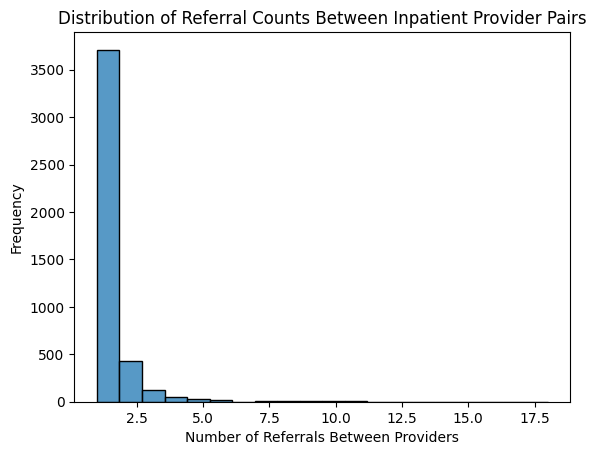

In [148]:
sns.histplot(ip_referrals_df['Count'], bins=20)
plt.ylabel('Frequency')
plt.xlabel('Number of Referrals Between Providers')
plt.title('Distribution of Referral Counts Between Inpatient Provider Pairs')
plt.show();

In [149]:
ip_referrals_df.describe()

,Count
count,4398.000000
mean,1.296044
std,0.991039
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,18.000000


The count here represents the number of referrals between providers  

- On average, most inpatient providers have 1.3 referrals with one another. 
- 6% of the time, inpatient providers have 3 referrals with the same providers.
- 3% of the time, inpatient providers have 4 or more referrals between the same providers.

In [151]:
op_referrals_df[op_referrals_df['Count']>=20]

,Giver,Receiver,Count
12298,PRV51567,PRV51347,539
6503,PRV51347,PRV51567,536
8447,PRV51433,PRV51369,476
7019,PRV51369,PRV51433,449
52874,PRV53921,PRV53918,299
...,...,...,...
85620,PRV55968,PRV56113,20
19763,PRV52021,PRV53797,20
35791,PRV52649,PRV52660,20
52873,PRV53921,PRV53915,20


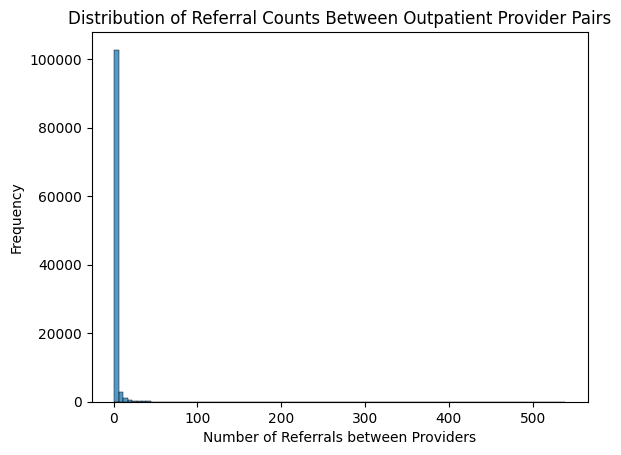

In [152]:
sns.histplot(op_referrals_df['Count'], bins=100)
plt.ylabel('Frequency')
plt.xlabel('Number of Referrals between Providers')
plt.title('Distribution of Referral Counts Between Outpatient Provider Pairs')
plt.show();

In [153]:
len(op_referrals_df[op_referrals_df['Count']>=20])/len(op_referrals_df)

0.010572116274763933

In [154]:
op_referrals_df.describe()

,Count
count,108020.000000
mean,2.412961
std,7.364980
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,539.000000


- On average, most outpatient providers have 2.4 referrals with one another. 
- 8% of the time, outpatient providers have 5 or more referrals between the same providers.
- 3% of the time, outpatient providers have 10 or more referrals between the same providers.
- There are some very high counts for referral relationships.
- 1% of the time, outpatient providers have 20 or more referrals between the same providers. 

### how many of these relationships involve fraud providers? 

In [156]:
# add fraud flags for giver and receiver
ip_referrals_df.loc[:, 'giver_suspected_fraud'] = [
    'Y' if provider in fraud_providers else 'N' for provider in ip_referrals_df['Giver'].to_list()
]
ip_referrals_df.loc[:, 'receiver_suspected_fraud'] = [
    'Y' if provider in fraud_providers else 'N' for provider in ip_referrals_df['Receiver'].to_list()    
]

op_referrals_df.loc[:, 'giver_suspected_fraud'] = [
    'Y' if provider in fraud_providers else 'N' for provider in op_referrals_df['Giver'].to_list()
]
op_referrals_df.loc[:, 'receiver_suspected_fraud'] = [
    'Y' if provider in fraud_providers else 'N' for provider in op_referrals_df['Receiver'].to_list()    
]

In [157]:
ip_referrals_df

,Giver,Receiver,Count,giver_suspected_fraud,receiver_suspected_fraud
759,PRV51948,PRV51940,18,Y,Y
743,PRV51940,PRV51948,17,Y,Y
1201,PRV52178,PRV52173,12,Y,Y
3190,PRV55531,PRV55435,12,Y,Y
3777,PRV56560,PRV56647,11,Y,Y
...,...,...,...,...,...
1573,PRV52821,PRV52851,1,Y,N
1574,PRV52821,PRV52862,1,Y,N
1577,PRV52823,PRV52148,1,N,N
1578,PRV52823,PRV52868,1,N,Y


In [158]:
# identify givers and receivers
ip_givers = list(set(ip_referrals_df['Giver']))
ip_receivers = list(set(ip_referrals_df['Receiver']))
op_givers = list(set(op_referrals_df['Giver']))
op_receivers = list(set(op_referrals_df['Receiver']))

In [159]:
print('number of giver inpatient providers:', len(ip_givers))
print('number of giver inpatient providers in suspected fraud list:', len(set(ip_givers) & set(fraud_providers))) 
print('number of receiver inpatient providers:', len(ip_receivers))
print('number of receiver inpatient providers in suspected fraud list:', len(set(ip_receivers) & set(fraud_providers)))
print('number of giver outpatient providers:', len(op_givers))
print('number of giver outpatient providers in suspected fraud list:', len(set(op_givers) & set(fraud_providers))) 
print('number of receiver outpatient providers:', len(op_receivers))
print('number of receiver outpatient providers in suspected fraud list:', len(set(op_receivers) & set(fraud_providers)))

number of giver inpatient providers: 1447
number of giver inpatient providers in suspected fraud list: 397
number of receiver inpatient providers: 1460
number of receiver inpatient providers in suspected fraud list: 398
number of giver outpatient providers: 4927
number of giver outpatient providers in suspected fraud list: 460
number of receiver outpatient providers: 4923
number of receiver outpatient providers in suspected fraud list: 461


**What is a good way to analyze this?**

In [161]:
print(f'number of inpatient providers who are both givers and receivers:')
len(list(set(ip_givers) & set(ip_receivers)))

number of inpatient providers who are both givers and receivers:


1179

In [162]:
print(f'number of outpatient providers who are both givers and receivers:')
len(list(set(op_givers) & set(op_receivers)))

number of outpatient providers who are both givers and receivers:


4868

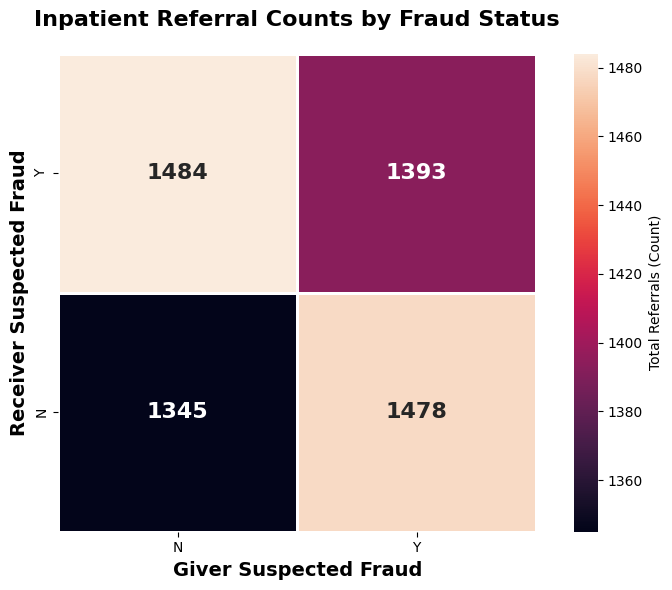

In [163]:
# Look at heatmaps for fraud no-fraud counts

# Create 2x2 matrix
matrix = pd.crosstab(
    ip_referrals_df['receiver_suspected_fraud'], 
    ip_referrals_df['giver_suspected_fraud'], 
    values=ip_referrals_df['Count'], 
    aggfunc='sum',
    margins=False
).fillna(0)

# Reorder to have Y on top/right
matrix = matrix.reindex(index=['Y', 'N'], columns=['N', 'Y'])

# Create simple heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, fmt='.0f', 
            cbar_kws={'label': 'Total Referrals (Count)'},
            linewidths=2, linecolor='white',
            square=True, annot_kws={'size': 16, 'weight': 'bold'})

plt.xlabel('Giver Suspected Fraud', fontsize=14, fontweight='bold')
plt.ylabel('Receiver Suspected Fraud', fontsize=14, fontweight='bold')
plt.title('Inpatient Referral Counts by Fraud Status', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()

- Most inpatient provider referrals include 1 fraud-provider, either giving or receiving a referral. 
- There are more fraud/fraud (YY) provider referrals than no-fraud/no-fraud (NN) provider relationships.

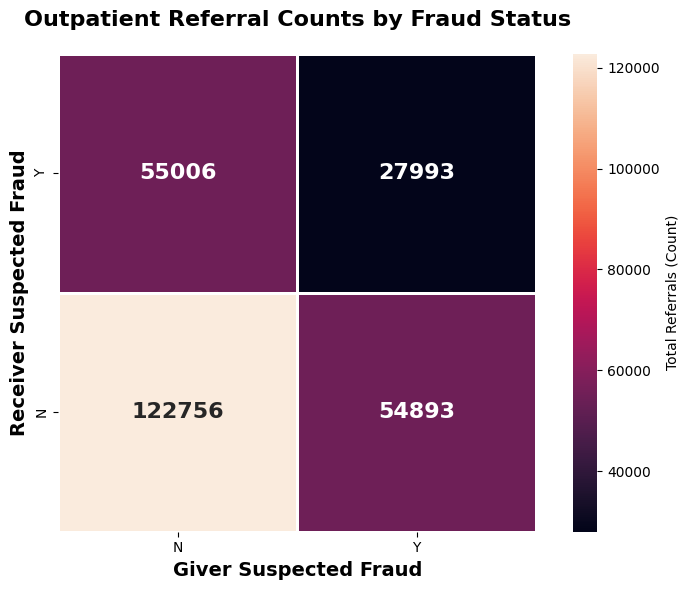

In [165]:
# Create 2x2 matrix
matrix = pd.crosstab(
    op_referrals_df['receiver_suspected_fraud'], 
    op_referrals_df['giver_suspected_fraud'], 
    values=op_referrals_df['Count'], 
    aggfunc='sum',
    margins=False
).fillna(0)

# Reorder to have Y on top/right
matrix = matrix.reindex(index=['Y', 'N'], columns=['N', 'Y'])

# Create simple heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, fmt='.0f', 
            cbar_kws={'label': 'Total Referrals (Count)'},
            linewidths=2, linecolor='white',
            square=True, annot_kws={'size': 16, 'weight': 'bold'})

plt.xlabel('Giver Suspected Fraud', fontsize=14, fontweight='bold')
plt.ylabel('Receiver Suspected Fraud', fontsize=14, fontweight='bold')
plt.title('Outpatient Referral Counts by Fraud Status', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()

- Most of the outpatient provider referrals are between non-fraud providers (NN). 
- Referrals between fraud-fraud (YY) providers are not as prevalent. 

# Summarize the duplicate record counts/provider and study if the statistics have different distributions between honest and potentialfraud providers.

*From above* 

**Duplicate claim characteristics**, assuming a common BeneID and Provider:
- DIAGNOSIS CODES:
    - suspicious duplicate **inpatient** claims: as many as 2-10 diagnosis codes.
    - non-fraud duplicate **inpatient** claims: only ever cite 1 primary diagnosis code.
    - suspicious duplicate **outpatient** claims: 1/3 cite as many as 9 **diagnosis codes**.
    - non-fraud duplicate **outpatient** claims: 2/3 cite as many as 9 **diagnosis codes**.

- PROCEDURE CODES:
    - suspicious duplicate **inpatient** claims: more likely to cite 2 procedure codes.
    - non-fraud duplicate **inpatient** claims: only ever cite 1 primary procedure code.  
    - duplicate **outpatient** claims do not cite any procedure codes, regardless of fraud status.

- ADMIT CODES:
    - 82% of **inpatient** claims are associated with fraud providers 
    - 18% of **inpatient** claims are associated with non-fraud providers 
    - 51% of **outpatient** claims are associated with fraud providers 
    - 49% of **outpatient** claims are associated with non-fraud providers

**What other stats to look at?**

*duplicate record counts per provider*


# Do these suspected fraud providers reuse doctor IDs and/or patient IDs?  If so, these fradulent IDs (or if the doctors or patients willingly participate) can be used as signals to the other types of fraudulent activities.

How to determine reuse of doctor IDs or patient IDs? 

*Within the subset of duplicate claims? giver and receiver providers?*

**For doctor ID reuse patterns:** 
- Examine characteristics of AttendingPhysician, OperatingPhysician, and OtherPhysician.
- What is the diversity of physicians used by provider?
    - unique physician IDs per provider / Total Claims submitted per provider
- How does fraud status affect characteristics?
 
**For patient reuse patterns:**
- Examine characteristics of BeneIDs.
- What is the diversity of patients used by provider?
    - unique patient IDs per provider / Total Claims submitted per provider
- How does fraud status affect characteristics?

### To start, look within duplicates that have common BeneID and Reimbursement

In [171]:
# count duplicates and filter for multiple counts
duplicate_ips = inpatient.groupby(
    ['BeneID', 'InscClaimAmtReimbursed']
).size().reset_index(name='count')

duplicate_ops = outpatient.groupby(
    ['BeneID', 'InscClaimAmtReimbursed']
).size().reset_index(name='count')

duplicate_ips = duplicate_ips[duplicate_ips['count'] > 1]
duplicate_ops = duplicate_ops[duplicate_ops['count'] > 1]

In [172]:
# get rows that are part of duplicate groups
duplicate_ips = inpatient.merge(
    duplicate_ips[duplicate_ips['count'] > 1],
    on=['BeneID', 'InscClaimAmtReimbursed'],
    how='inner'
)
duplicate_ops = outpatient.merge(
    duplicate_ops[duplicate_ops['count'] > 1],
    on=['BeneID', 'InscClaimAmtReimbursed'],
    how='inner'
)

In [173]:
duplicate_ips

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,fraud_suspected,count
0,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN,N,2
1,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,2
2,BENE11093,CLM32146,2009-01-03,2009-01-09,PRV51842,20000,PHY341192,PHY355416,NaN,2009-01-03,...,412,42732,3950.0,2762.0,NaN,NaN,NaN,NaN,Y,2
3,BENE11093,CLM82202,2009-01-03,2009-01-12,PRV51842,20000,PHY341192,PHY355416,NaN,2009-01-03,...,412,42732,3950.0,2762.0,NaN,NaN,NaN,NaN,Y,2
4,BENE11494,CLM60797,2009-07-23,2009-07-26,PRV51501,4000,PHY348953,NaN,NaN,2009-07-23,...,70710,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,BENE158900,CLM45501,2009-04-04,2009-04-12,PRV53210,4000,PHY417893,PHY417893,PHY321304,2009-04-04,...,4280,NaN,8872.0,NaN,NaN,NaN,NaN,NaN,N,2
1554,BENE159045,CLM40726,2009-03-01,2009-03-04,PRV51405,5000,PHY411654,NaN,NaN,2009-03-01,...,5859,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,2
1555,BENE159045,CLM60539,2009-07-20,2009-07-30,PRV51456,5000,PHY428454,NaN,NaN,2009-07-20,...,2724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,2
1556,BENE159079,CLM40563,2009-02-28,2009-03-04,PRV52574,4000,PHY346274,NaN,NaN,2009-02-28,...,4240,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,2


## Physician diversity

Considered both a subset of duplicate claims, and all the ip/op claims for trends.

**Caution** running code. Code is not specific to 'duplicate' or 'all' claims. ip/op physician counts are calculated on duplicate_ips/ops and inpatient/outpatient as needed.

### Duplicate claims:

In [175]:
# get number of unique Attending Physicians and the number of claims per provider 
ip_attending_counts = duplicate_ips.groupby('Provider')['AttendingPhysician'].agg( 
    ['nunique', 'count']
).reset_index()

# rename columns
ip_attending_counts = ip_attending_counts.rename({
    'nunique': 'unique_attending',
    'count': 'num_claims'
}, axis='columns')

# get number of unique Attending Physicians and the number of claims per provider 
op_attending_counts = duplicate_ops.groupby('Provider')['AttendingPhysician'].agg( 
    ['nunique', 'count']
).reset_index()

# rename columns
op_attending_counts = op_attending_counts.rename({
    'nunique': 'unique_attending',
    'count': 'num_claims'
}, axis='columns')

In [176]:
op_attending_counts

,Provider,unique_attending,num_claims
0,PRV51001,4,5
1,PRV51003,20,24
2,PRV51004,17,31
3,PRV51005,6,316
4,PRV51007,4,15
...,...,...,...
4511,PRV57756,2,8
4512,PRV57759,1,8
4513,PRV57760,1,6
4514,PRV57761,2,30


In [177]:
# calculate the ratio of number of unique attending physicians to total claims
ip_attending_counts.loc[:, 'attending_ratio'] = ip_attending_counts['unique_attending'] / ip_attending_counts['num_claims']
op_attending_counts.loc[:, 'attending_ratio'] = op_attending_counts['unique_attending'] / op_attending_counts['num_claims']

In [178]:
ip_attending_counts

,Provider,unique_attending,num_claims,attending_ratio
0,PRV51003,2,4,0.5
1,PRV51007,1,1,1.0
2,PRV51021,1,2,0.5
3,PRV51023,1,1,1.0
4,PRV51024,1,1,1.0
...,...,...,...,...
640,PRV57635,1,1,1.0
641,PRV57667,1,2,0.5
642,PRV57711,1,1,1.0
643,PRV57717,1,1,1.0


- ratio of 1.0 = every claim involves a different attending physician
- ratio of 0.5 = on average, each physician has two claims
- ratio of 0.1 = on average, each physician has 10 claims (high reuse)

In [180]:
# add fraud flag
ip_attending_counts.loc[:,'fraud_suspected'] = [
    'Y' if provider in fraud_providers else 'N' for provider in ip_attending_counts['Provider']
]
op_attending_counts.loc[:,'fraud_suspected'] = [
    'Y' if provider in fraud_providers else 'N' for provider in op_attending_counts['Provider']
]

In [181]:
op_attending_counts

,Provider,unique_attending,num_claims,attending_ratio,fraud_suspected
0,PRV51001,4,5,0.800000,N
1,PRV51003,20,24,0.833333,Y
2,PRV51004,17,31,0.548387,N
3,PRV51005,6,316,0.018987,Y
4,PRV51007,4,15,0.266667,N
...,...,...,...,...,...
4511,PRV57756,2,8,0.250000,N
4512,PRV57759,1,8,0.125000,N
4513,PRV57760,1,6,0.166667,N
4514,PRV57761,2,30,0.066667,N


In [182]:
print('number of duplicate ip claims', len(ip_attending_counts))
print('number of duplicate ip claims with fraud provider', len(ip_attending_counts[ip_attending_counts['fraud_suspected']=='Y']))
print('number of duplicate op claims', len(op_attending_counts))
print('number of duplicate op claims with fraud provider', len(op_attending_counts[op_attending_counts['fraud_suspected']=='Y']))

number of duplicate ip claims 645
number of duplicate ip claims with fraud provider 306
number of duplicate op claims 4516
number of duplicate op claims with fraud provider 457


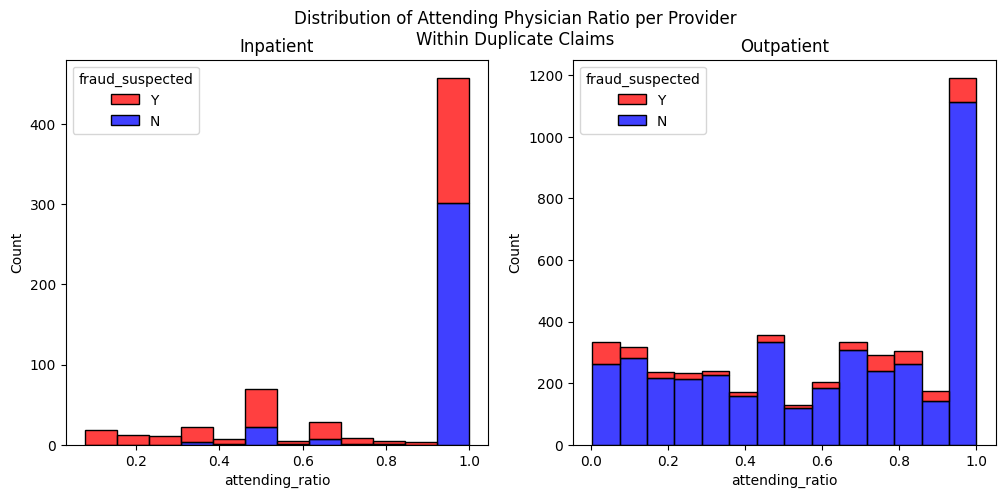

In [183]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Define color palette
colors = {'Y': 'red', 'N': 'blue'}
hue_order = ['Y', 'N']

sns.histplot(data=ip_attending_counts, 
             x='attending_ratio', 
             ax=axes[0], 
             hue='fraud_suspected', 
             palette=colors,
             hue_order=hue_order,
             multiple='stack')
axes[0].set_title('Inpatient')

sns.histplot(data=op_attending_counts, 
             x='attending_ratio', 
             ax=axes[1], 
             hue='fraud_suspected', 
             palette=colors,
             hue_order=hue_order,
             multiple='stack')
axes[1].set_title('Outpatient')

plt.suptitle('Distribution of Attending Physician Ratio per Provider\nWithin Duplicate Claims')
plt.show();

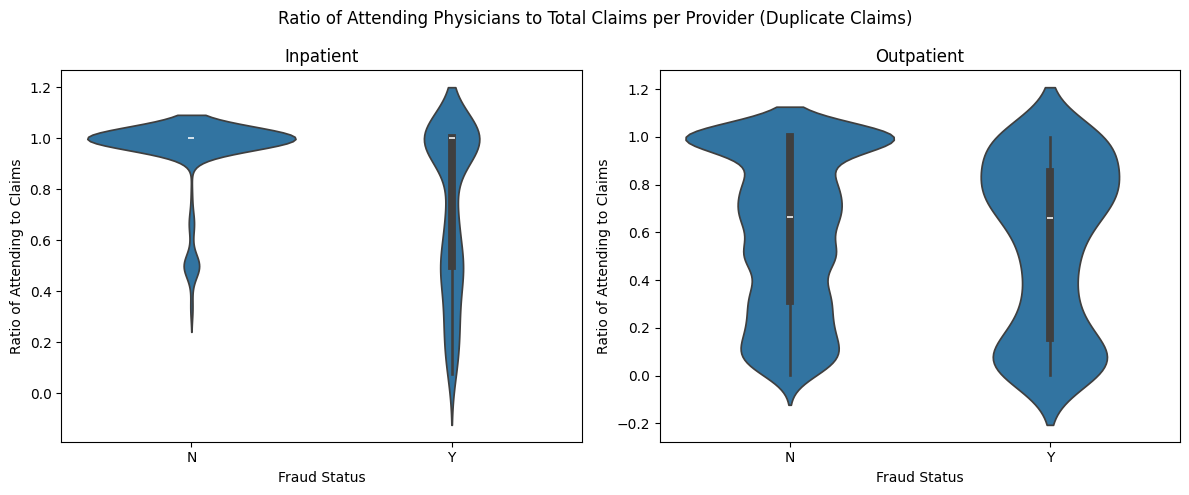

In [184]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.violinplot(data=ip_attending_counts, x='fraud_suspected', y='attending_ratio', ax=axes[0], order=['N', 'Y'])
axes[0].set_xlabel('Fraud Status')
axes[0].set_ylabel('Ratio of Attending to Claims')
axes[0].set_title('Inpatient')

sns.violinplot(data=op_attending_counts, x='fraud_suspected', y='attending_ratio', ax=axes[1], order=['N', 'Y'])
axes[1].set_xlabel('Fraud Status')
axes[1].set_ylabel('Ratio of Attending to Claims')
axes[1].set_title('Outpatient')

plt.suptitle('Ratio of Attending Physicians to Total Claims per Provider (Duplicate Claims)')
plt.tight_layout()
plt.show();

In [185]:
ip_attending_counts[ip_attending_counts['fraud_suspected']=='Y'].describe()

,unique_attending,num_claims,attending_ratio
count,306.000000,306.000000,306.000000
mean,1.950980,3.473856,0.724151
std,1.963824,3.351677,0.315424
min,1.000000,1.000000,0.076923
25%,1.000000,2.000000,0.500000
50%,1.000000,2.000000,1.000000
75%,2.000000,4.000000,1.000000
max,29.000000,33.000000,1.000000


In [186]:
ip_attending_counts[ip_attending_counts['fraud_suspected']=='N'].describe()

,unique_attending,num_claims,attending_ratio
count,339.000000,339.000000,338.000000
mean,1.312684,1.451327,0.950430
std,0.763160,0.951403,0.147879
min,0.000000,0.000000,0.333333
25%,1.000000,1.000000,1.000000
50%,1.000000,1.000000,1.000000
75%,1.000000,2.000000,1.000000
max,6.000000,7.000000,1.000000


In [187]:
def create_summary_df(df, group_col, metric_col, metric_name):
    """
    Automatically generate summary statistics grouped by a column
    
    Parameters:
    - df: your dataframe (e.g., ip_attending_counts)
    - group_col: column to group by (e.g., 'fraud_suspected')
    - metric_col: column to compute statistics on (e.g., 'attending_ratio')
    - metric_name: name for the metric (e.g., 'attending')
    
    Returns:
    - DataFrame with metric as first column, followed by group column and stats
    """
    summary_list = []
    
    # Sort groups to ensure consistent ordering (N before Y)
    for group_value in sorted(df[group_col].unique()):
        group_data = df[df[group_col] == group_value][metric_col]
        stats = group_data.describe()
        
        summary_dict = {
            'metric': metric_name,
            group_col: group_value,
            'count': stats['count'],
            'mean': stats['mean'],
            'std': stats['std'],
            'min': stats['min'],
            '25%': stats['25%'],
            '50%': stats['50%'],
            '75%': stats['75%'],
            'max': stats['max']
        }
        summary_list.append(summary_dict)
    
    summary_df = pd.DataFrame(summary_list)
    
    # Ensure 'metric' is the first column
    cols = ['metric'] + [col for col in summary_df.columns if col != 'metric']
    summary_df = summary_df[cols]
    
    return summary_df

In [188]:
create_summary_df(ip_attending_counts, 'fraud_suspected', 'attending_ratio', 'ip_attending')

,metric,fraud_suspected,count,mean,std,min,25%,50%,75%,max
0,ip_attending,N,338.0,0.950430,0.147879,0.333333,1.0,1.0,1.0,1.0
1,ip_attending,Y,306.0,0.724151,0.315424,0.076923,0.5,1.0,1.0,1.0


In [189]:
create_summary_df(op_attending_counts, 'fraud_suspected', 'attending_ratio', 'op_attending')

,metric,fraud_suspected,count,mean,std,min,25%,50%,75%,max
0,op_attending,N,4055.0,0.605438,0.333907,0.004651,0.312500,0.666667,1.000000,1.0
1,op_attending,Y,457.0,0.547590,0.354792,0.002242,0.158416,0.662162,0.854167,1.0


In [190]:
summary_dupe_stats = pd.concat([
    create_summary_df(ip_attending_counts, 'fraud_suspected', 'attending_ratio', 'ip_attending'), 
    create_summary_df(op_attending_counts, 'fraud_suspected', 'attending_ratio', 'op_attending')],
                         ignore_index=True)
summary_dupe_stats

,metric,fraud_suspected,count,mean,std,min,25%,50%,75%,max
0,ip_attending,N,338.0,0.950430,0.147879,0.333333,1.000000,1.000000,1.000000,1.0
1,ip_attending,Y,306.0,0.724151,0.315424,0.076923,0.500000,1.000000,1.000000,1.0
2,op_attending,N,4055.0,0.605438,0.333907,0.004651,0.312500,0.666667,1.000000,1.0
3,op_attending,Y,457.0,0.547590,0.354792,0.002242,0.158416,0.662162,0.854167,1.0


In [191]:
# repeat for operating physicians

# get number of unique Operating Physicians and the number of claims per provider 
ip_operating_counts = duplicate_ips.groupby('Provider')['OperatingPhysician'].agg( 
    ['nunique', 'count']
).reset_index()

# rename columns
ip_operating_counts = ip_operating_counts.rename({
    'nunique': 'unique_operating',
    'count': 'num_claims'
}, axis='columns')

# get number of unique Operating Physicians and the number of claims per provider 
op_operating_counts = duplicate_ops.groupby('Provider')['OperatingPhysician'].agg( 
    ['nunique', 'count']
).reset_index()

# rename columns
op_operating_counts = op_operating_counts.rename({
    'nunique': 'unique_operating',
    'count': 'num_claims'
}, axis='columns')

# calculate the ratio of number of unique operating physicians to total claims
ip_operating_counts.loc[:, 'operating_ratio'] = ip_operating_counts['unique_operating'] / ip_operating_counts['num_claims']
op_operating_counts.loc[:, 'operating_ratio'] = op_operating_counts['unique_operating'] / op_operating_counts['num_claims']

# add fraud flag
ip_operating_counts.loc[:,'fraud_suspected'] = [
    'Y' if provider in fraud_providers else 'N' for provider in ip_operating_counts['Provider']
]
op_operating_counts.loc[:,'fraud_suspected'] = [
    'Y' if provider in fraud_providers else 'N' for provider in op_operating_counts['Provider']
]

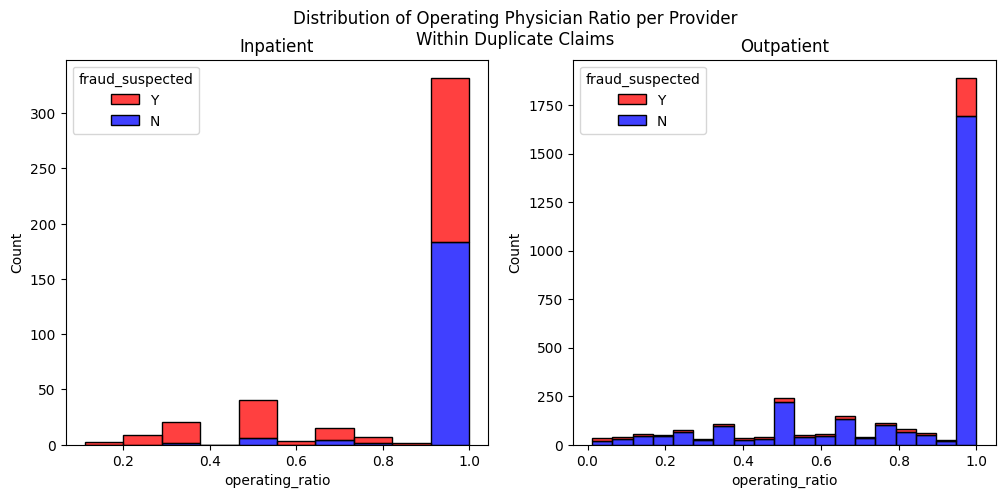

In [192]:
# for operating physicians 
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Define color palette
colors = {'Y': 'red', 'N': 'blue'}
hue_order = ['Y', 'N']

sns.histplot(data=ip_operating_counts, 
             x='operating_ratio', 
             ax=axes[0], 
             hue='fraud_suspected', 
             palette=colors,
             hue_order=hue_order,
             multiple='stack')
axes[0].set_title('Inpatient')

sns.histplot(data=op_operating_counts, 
             x='operating_ratio', 
             ax=axes[1], 
             hue='fraud_suspected', 
             palette=colors,
             hue_order=hue_order,
             multiple='stack')
axes[1].set_title('Outpatient')

plt.suptitle('Distribution of Operating Physician Ratio per Provider\nWithin Duplicate Claims')
plt.show();

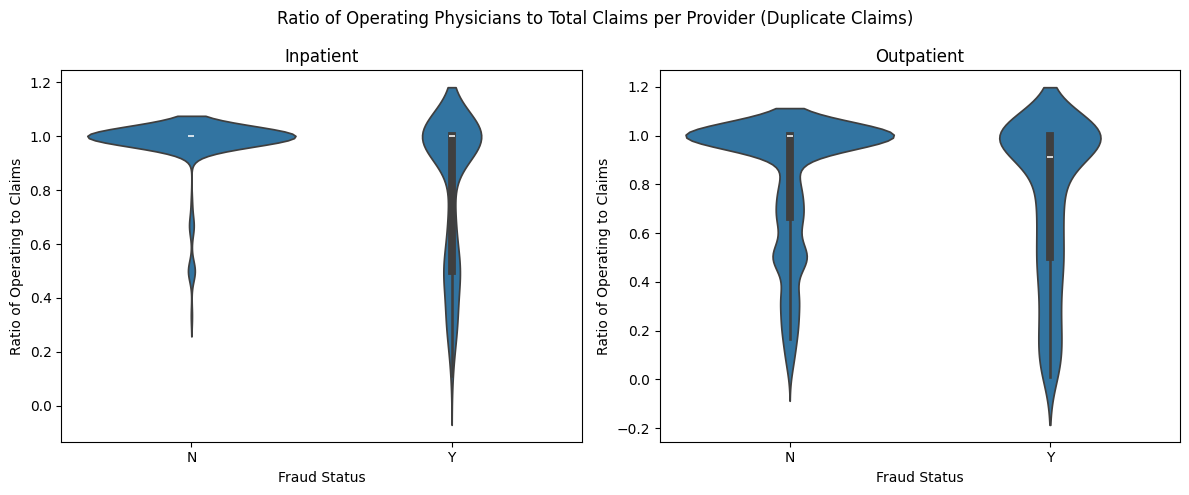

In [193]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.violinplot(data=ip_operating_counts, x='fraud_suspected', y='operating_ratio', ax=axes[0], order=['N', 'Y'])
axes[0].set_xlabel('Fraud Status')
axes[0].set_ylabel('Ratio of Operating to Claims')
axes[0].set_title('Inpatient')

sns.violinplot(data=op_operating_counts, x='fraud_suspected', y='operating_ratio', ax=axes[1], order=['N', 'Y'])
axes[1].set_xlabel('Fraud Status')
axes[1].set_ylabel('Ratio of Operating to Claims')
axes[1].set_title('Outpatient')

plt.suptitle('Ratio of Operating Physicians to Total Claims per Provider (Duplicate Claims)')
plt.tight_layout()
plt.show();

In [194]:
summary_dupe_stats = pd.concat([summary_dupe_stats,
    create_summary_df(ip_operating_counts, 'fraud_suspected', 'operating_ratio', 'ip_operating'), 
    create_summary_df(op_operating_counts, 'fraud_suspected', 'operating_ratio', 'op_operating')],
                         ignore_index=True)
summary_dupe_stats

,metric,fraud_suspected,count,mean,std,min,25%,50%,75%,max
0,ip_attending,N,338.0,0.950430,0.147879,0.333333,1.000000,1.000000,1.000000,1.0
1,ip_attending,Y,306.0,0.724151,0.315424,0.076923,0.500000,1.000000,1.000000,1.0
2,op_attending,N,4055.0,0.605438,0.333907,0.004651,0.312500,0.666667,1.000000,1.0
3,op_attending,Y,457.0,0.547590,0.354792,0.002242,0.158416,0.662162,0.854167,1.0
4,ip_operating,N,195.0,0.973077,0.109121,0.333333,1.000000,1.000000,1.000000,1.0
5,ip_operating,Y,234.0,0.809210,0.271383,0.111111,0.500000,1.000000,1.000000,1.0
6,op_operating,N,2768.0,0.812486,0.273970,0.025000,0.666667,1.000000,1.000000,1.0
7,op_operating,Y,398.0,0.732292,0.327709,0.011905,0.500000,0.912879,1.000000,1.0


In [195]:
# repeat for other physicians

# get number of unique Other Physicians and the number of claims per provider 
ip_other_counts = duplicate_ips.groupby('Provider')['OtherPhysician'].agg( 
    ['nunique', 'count']
).reset_index()

# rename columns
ip_other_counts = ip_other_counts.rename({
    'nunique': 'unique_other',
    'count': 'num_claims'
}, axis='columns')

# get number of unique Other Physicians and the number of claims per provider 
op_other_counts = duplicate_ops.groupby('Provider')['OtherPhysician'].agg( 
    ['nunique', 'count']
).reset_index()

# rename columns
op_other_counts = op_other_counts.rename({
    'nunique': 'unique_other',
    'count': 'num_claims'
}, axis='columns')

# calculate the ratio of number of unique other physicians to total claims
ip_other_counts.loc[:, 'other_ratio'] = ip_other_counts['unique_other'] / ip_other_counts['num_claims']
op_other_counts.loc[:, 'other_ratio'] = op_other_counts['unique_other'] / op_other_counts['num_claims']

# add fraud flag
ip_other_counts.loc[:,'fraud_suspected'] = [
    'Y' if provider in fraud_providers else 'N' for provider in ip_other_counts['Provider']
]
op_other_counts.loc[:,'fraud_suspected'] = [
    'Y' if provider in fraud_providers else 'N' for provider in op_other_counts['Provider']
] 

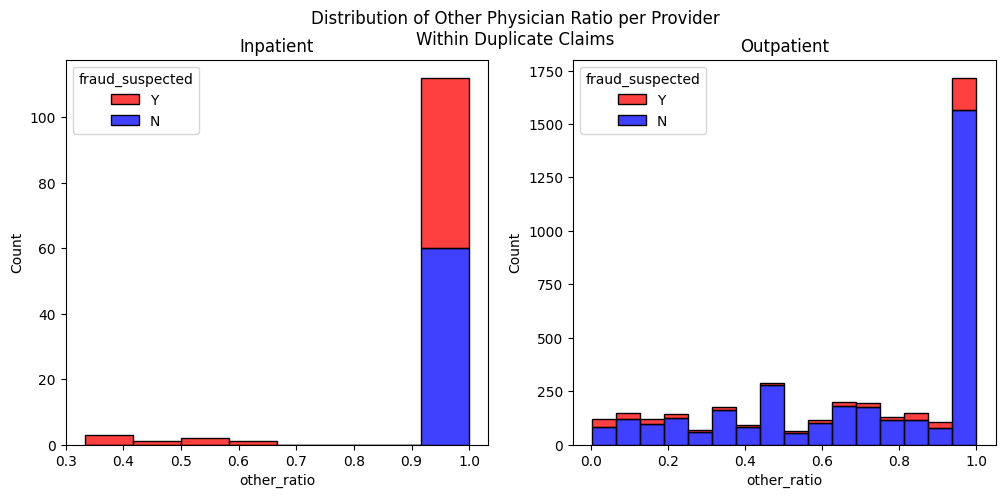

In [196]:
# for other physicians 
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Define color palette
colors = {'Y': 'red', 'N': 'blue'}
hue_order = ['Y', 'N']

sns.histplot(data=ip_other_counts, 
             x='other_ratio', 
             ax=axes[0], 
             hue='fraud_suspected', 
             palette=colors,
             hue_order=hue_order,
             multiple='stack')
axes[0].set_title('Inpatient')

sns.histplot(data=op_other_counts, 
             x='other_ratio', 
             ax=axes[1], 
             hue='fraud_suspected', 
             palette=colors,
             hue_order=hue_order,
             multiple='stack')
axes[1].set_title('Outpatient')

plt.suptitle('Distribution of Other Physician Ratio per Provider\nWithin Duplicate Claims')
plt.show();

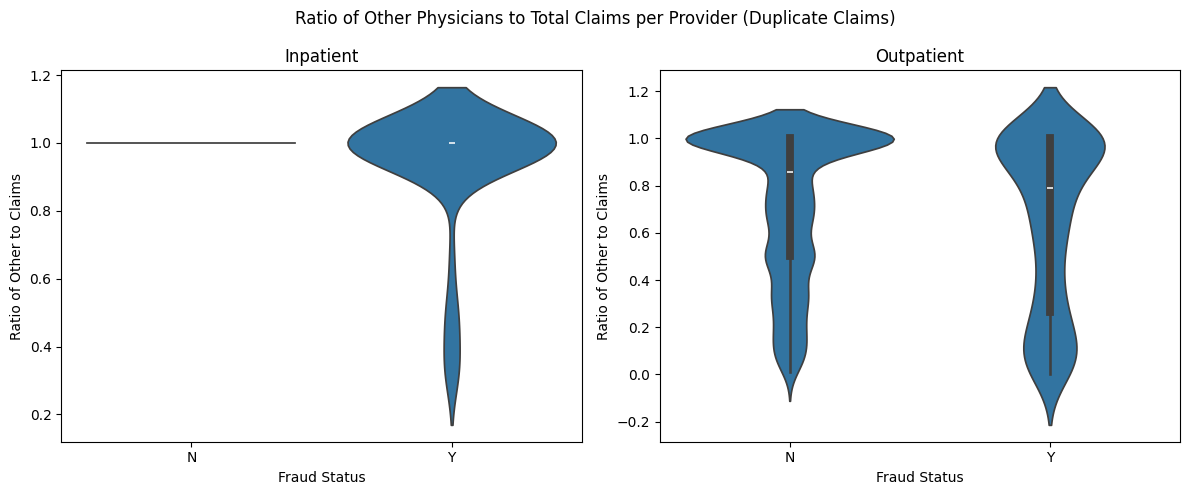

In [197]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.violinplot(data=ip_other_counts, x='fraud_suspected', y='other_ratio', ax=axes[0], order=['N', 'Y'])
axes[0].set_xlabel('Fraud Status')
axes[0].set_ylabel('Ratio of Other to Claims')
axes[0].set_title('Inpatient')

sns.violinplot(data=op_other_counts, x='fraud_suspected', y='other_ratio', ax=axes[1], order=['N', 'Y'])
axes[1].set_xlabel('Fraud Status')
axes[1].set_ylabel('Ratio of Other to Claims')
axes[1].set_title('Outpatient')

plt.suptitle('Ratio of Other Physicians to Total Claims per Provider (Duplicate Claims)')
plt.tight_layout()
plt.show();

In [198]:
summary_dupe_stats = pd.concat([summary_dupe_stats,
    create_summary_df(ip_other_counts, 'fraud_suspected', 'other_ratio', 'ip_other'), 
    create_summary_df(op_other_counts, 'fraud_suspected', 'other_ratio', 'op_other')],
                         ignore_index=True)
summary_dupe_stats

,metric,fraud_suspected,count,mean,std,min,25%,50%,75%,max
0,ip_attending,N,338.0,0.950430,0.147879,0.333333,1.000000,1.000000,1.000000,1.0
1,ip_attending,Y,306.0,0.724151,0.315424,0.076923,0.500000,1.000000,1.000000,1.0
2,op_attending,N,4055.0,0.605438,0.333907,0.004651,0.312500,0.666667,1.000000,1.0
3,op_attending,Y,457.0,0.547590,0.354792,0.002242,0.158416,0.662162,0.854167,1.0
4,ip_operating,N,195.0,0.973077,0.109121,0.333333,1.000000,1.000000,1.000000,1.0
5,ip_operating,Y,234.0,0.809210,0.271383,0.111111,0.500000,1.000000,1.000000,1.0
6,op_operating,N,2768.0,0.812486,0.273970,0.025000,0.666667,1.000000,1.000000,1.0
7,op_operating,Y,398.0,0.732292,0.327709,0.011905,0.500000,0.912879,1.000000,1.0
8,ip_other,N,60.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.0
9,ip_other,Y,59.0,0.934087,0.185545,0.333333,1.000000,1.000000,1.000000,1.0


In [199]:
ip_other_counts['other_ratio'].value_counts()

other_ratio
1.000000    112
0.333333      3
0.500000      2
0.444444      1
0.666667      1
Name: count, dtype: int64

In [200]:
ip_other_counts[ip_other_counts['other_ratio']<1]

,Provider,unique_other,num_claims,other_ratio,fraud_suspected
106,PRV52019,4,9,0.444444,Y
134,PRV52178,1,2,0.500000,Y
253,PRV53712,1,2,0.500000,Y
318,PRV54354,2,3,0.666667,Y
416,PRV55230,1,3,0.333333,Y
476,PRV55911,1,3,0.333333,Y
545,PRV56647,1,3,0.333333,Y


### All claims, not just subset of duplicates

In [202]:
# Ok. look at all the data, not just the duplicates
# get number of unique Attending Physicians and the number of claims per provider 
ip_attending_counts = inpatient.groupby('Provider')['AttendingPhysician'].agg( 
    ['nunique', 'count']
).reset_index()

# rename columns
ip_attending_counts = ip_attending_counts.rename({
    'nunique': 'unique_attending',
    'count': 'num_claims'
}, axis='columns')

# get number of unique Attending Physicians and the number of claims per provider 
op_attending_counts = outpatient.groupby('Provider')['AttendingPhysician'].agg( 
    ['nunique', 'count']
).reset_index()

# rename columns
op_attending_counts = op_attending_counts.rename({
    'nunique': 'unique_attending',
    'count': 'num_claims'
}, axis='columns')

# calculate the ratio of number of unique attending physicians to total claims
ip_attending_counts.loc[:, 'attending_ratio'] = ip_attending_counts['unique_attending'] / ip_attending_counts['num_claims']
op_attending_counts.loc[:, 'attending_ratio'] = op_attending_counts['unique_attending'] / op_attending_counts['num_claims']

# add fraud flag
ip_attending_counts['fraud_suspected'] = [
    'Y' if provider in fraud_providers else 'N' for provider in ip_attending_counts['Provider']
]
op_attending_counts['fraud_suspected'] = [
    'Y' if provider in fraud_providers else 'N' for provider in op_attending_counts['Provider']
]

print('number of all ip claims', len(ip_attending_counts))
print('number of all ip claims with fraud provider', len(ip_attending_counts[ip_attending_counts['fraud_suspected']=='Y']))
print('number of all op claims', len(op_attending_counts))
print('number of all op claims with fraud provider', len(op_attending_counts[op_attending_counts['fraud_suspected']=='Y']))

number of all ip claims 2092
number of all ip claims with fraud provider 440
number of all op claims 5012
number of all op claims with fraud provider 462


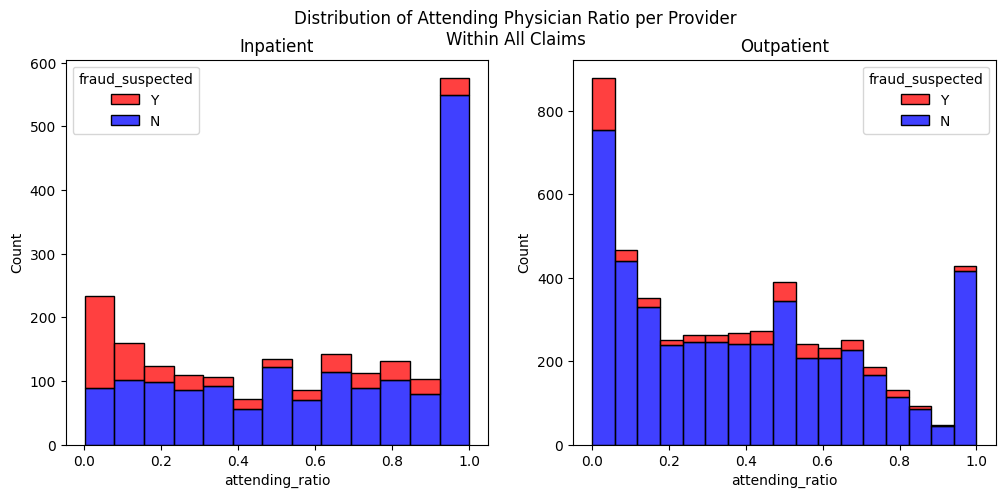

In [203]:
# attending physicians 
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Define color palette
colors = {'Y': 'red', 'N': 'blue'}
hue_order = ['Y', 'N']

sns.histplot(data=ip_attending_counts, 
             x='attending_ratio', 
             ax=axes[0], 
             hue='fraud_suspected', 
             palette=colors,
             hue_order=hue_order,
             multiple='stack')
axes[0].set_title('Inpatient')

sns.histplot(data=op_attending_counts, 
             x='attending_ratio', 
             ax=axes[1], 
             hue='fraud_suspected', 
             palette=colors,
             hue_order=hue_order,
             multiple='stack')
axes[1].set_title('Outpatient')

plt.suptitle('Distribution of Attending Physician Ratio per Provider\nWithin All Claims')
plt.show();

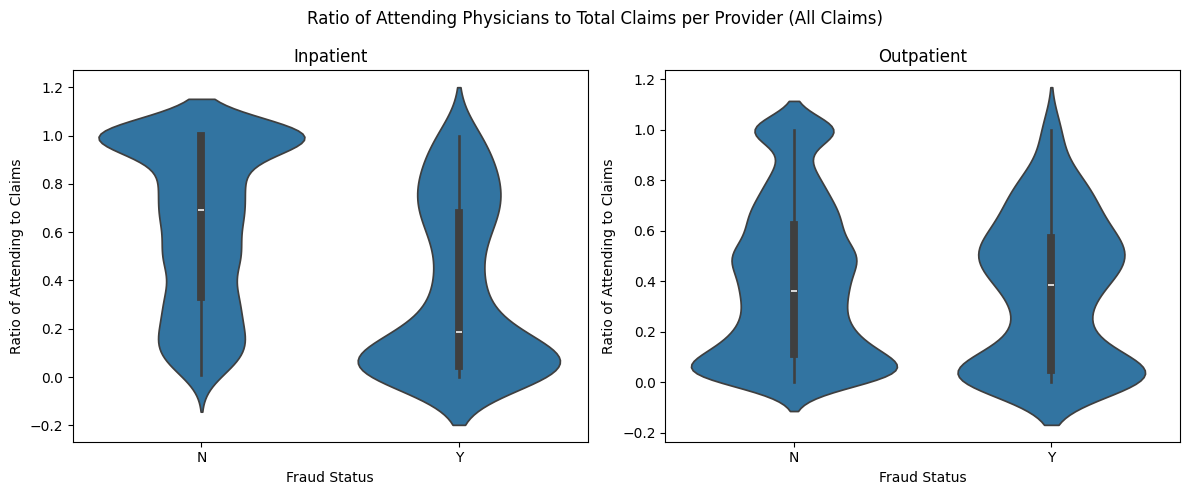

In [204]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.violinplot(data=ip_attending_counts, x='fraud_suspected', y='attending_ratio', ax=axes[0], order=['N', 'Y'])
axes[0].set_xlabel('Fraud Status')
axes[0].set_ylabel('Ratio of Attending to Claims')
axes[0].set_title('Inpatient')

sns.violinplot(data=op_attending_counts, x='fraud_suspected', y='attending_ratio', ax=axes[1], order=['N', 'Y'])
axes[1].set_xlabel('Fraud Status')
axes[1].set_ylabel('Ratio of Attending to Claims')
axes[1].set_title('Outpatient')

plt.suptitle('Ratio of Attending Physicians to Total Claims per Provider (All Claims)')
plt.tight_layout()
plt.show();

In [205]:
summary_all_stats = pd.concat([
    create_summary_df(ip_attending_counts, 'fraud_suspected', 'attending_ratio', 'ip_attending'), 
    create_summary_df(op_attending_counts, 'fraud_suspected', 'attending_ratio', 'op_attending')],
                         ignore_index=True)
summary_all_stats

,metric,fraud_suspected,count,mean,std,min,25%,50%,75%,max
0,ip_attending,N,1649.0,0.640889,0.334150,0.008929,0.333333,0.692308,1.000000,1.0
1,ip_attending,Y,440.0,0.353597,0.337958,0.002591,0.047619,0.187500,0.680616,1.0
2,op_attending,N,4549.0,0.398569,0.309325,0.000950,0.111111,0.362745,0.621951,1.0
3,op_attending,Y,462.0,0.359491,0.288454,0.000614,0.049227,0.385896,0.570813,1.0


In [206]:
# repeat for operating physicians

# get number of unique Operating Physicians and the number of claims per provider 
ip_operating_counts = inpatient.groupby('Provider')['OperatingPhysician'].agg( 
    ['nunique', 'count']
).reset_index()

# rename columns
ip_operating_counts = ip_operating_counts.rename({
    'nunique': 'unique_operating',
    'count': 'num_claims'
}, axis='columns')

# get number of unique Operating Physicians and the number of claims per provider 
op_operating_counts = outpatient.groupby('Provider')['OperatingPhysician'].agg( 
    ['nunique', 'count']
).reset_index()

# rename columns
op_operating_counts = op_operating_counts.rename({
    'nunique': 'unique_operating',
    'count': 'num_claims'
}, axis='columns')

# calculate the ratio of number of unique operating physicians to total claims
ip_operating_counts.loc[:, 'operating_ratio'] = ip_operating_counts['unique_operating'] / ip_operating_counts['num_claims']
op_operating_counts.loc[:, 'operating_ratio'] = op_operating_counts['unique_operating'] / op_operating_counts['num_claims']

# add fraud flag
ip_operating_counts.loc[:,'fraud_suspected'] = [
    'Y' if provider in fraud_providers else 'N' for provider in ip_operating_counts['Provider']
]
op_operating_counts.loc[:,'fraud_suspected'] = [
    'Y' if provider in fraud_providers else 'N' for provider in op_operating_counts['Provider']
]

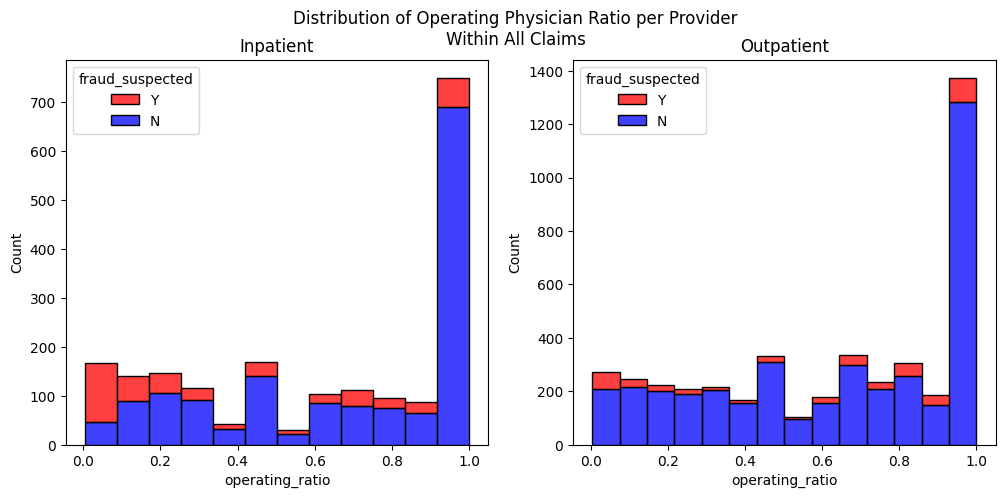

In [207]:
# operating physicians
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Define color palette
colors = {'Y': 'red', 'N': 'blue'}
hue_order = ['Y', 'N']

sns.histplot(data=ip_operating_counts, 
             x='operating_ratio', 
             ax=axes[0], 
             hue='fraud_suspected', 
             palette=colors,
             hue_order=hue_order,
             multiple='stack')
axes[0].set_title('Inpatient')

sns.histplot(data=op_operating_counts, 
             x='operating_ratio', 
             ax=axes[1], 
             hue='fraud_suspected', 
             palette=colors,
             hue_order=hue_order,
             multiple='stack')
axes[1].set_title('Outpatient')

plt.suptitle('Distribution of Operating Physician Ratio per Provider\nWithin All Claims')
plt.show();

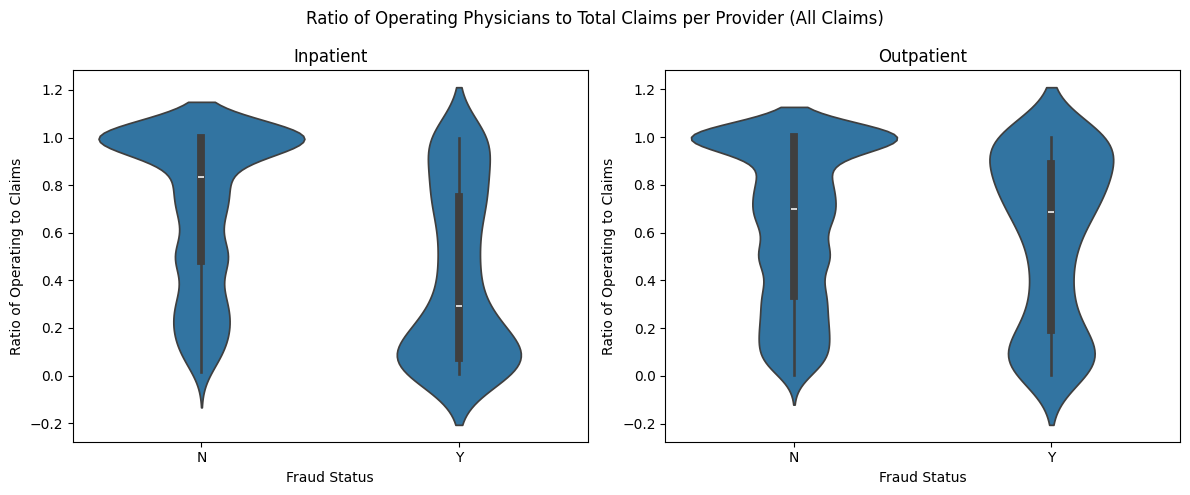

In [208]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.violinplot(data=ip_operating_counts, x='fraud_suspected', y='operating_ratio', ax=axes[0], order=['N', 'Y'])
axes[0].set_xlabel('Fraud Status')
axes[0].set_ylabel('Ratio of Operating to Claims')
axes[0].set_title('Inpatient')

sns.violinplot(data=op_operating_counts, x='fraud_suspected', y='operating_ratio', ax=axes[1], order=['N', 'Y'])
axes[1].set_xlabel('Fraud Status')
axes[1].set_ylabel('Ratio of Operating to Claims')
axes[1].set_title('Outpatient')

plt.suptitle('Ratio of Operating Physicians to Total Claims per Provider (All Claims)')
plt.tight_layout()
plt.show();

In [209]:
summary_all_stats = pd.concat([summary_all_stats,
    create_summary_df(ip_operating_counts, 'fraud_suspected', 'operating_ratio', 'ip_operating'), 
    create_summary_df(op_operating_counts, 'fraud_suspected', 'operating_ratio', 'op_operating')],
                         ignore_index=True)
summary_all_stats

,metric,fraud_suspected,count,mean,std,min,25%,50%,75%,max
0,ip_attending,N,1649.0,0.640889,0.334150,0.008929,0.333333,0.692308,1.000000,1.0
1,ip_attending,Y,440.0,0.353597,0.337958,0.002591,0.047619,0.187500,0.680616,1.0
2,op_attending,N,4549.0,0.398569,0.309325,0.000950,0.111111,0.362745,0.621951,1.0
3,op_attending,Y,462.0,0.359491,0.288454,0.000614,0.049227,0.385896,0.570813,1.0
4,ip_operating,N,1520.0,0.710834,0.324910,0.016393,0.479565,0.833333,1.000000,1.0
5,ip_operating,Y,439.0,0.415387,0.357289,0.004444,0.074074,0.294118,0.750000,1.0
6,op_operating,N,3928.0,0.644688,0.329747,0.005556,0.333333,0.700000,1.000000,1.0
7,op_operating,Y,451.0,0.581550,0.353977,0.003413,0.190342,0.687500,0.888889,1.0


In [210]:
# repeat for other physicians

# get number of unique Other Physicians and the number of claims per provider 
ip_other_counts = inpatient.groupby('Provider')['OtherPhysician'].agg( 
    ['nunique', 'count']
).reset_index()

# rename columns
ip_other_counts = ip_other_counts.rename({
    'nunique': 'unique_other',
    'count': 'num_claims'
}, axis='columns')

# get number of unique Other Physicians and the number of claims per provider 
op_other_counts = outpatient.groupby('Provider')['OtherPhysician'].agg( 
    ['nunique', 'count']
).reset_index()

# rename columns
op_other_counts = op_other_counts.rename({
    'nunique': 'unique_other',
    'count': 'num_claims'
}, axis='columns')

# calculate the ratio of number of unique other physicians to total claims
ip_other_counts.loc[:, 'other_ratio'] = ip_other_counts['unique_other'] / ip_other_counts['num_claims']
op_other_counts.loc[:, 'other_ratio'] = op_other_counts['unique_other'] / op_other_counts['num_claims']

# add fraud flag
ip_other_counts.loc[:,'fraud_suspected'] = [
    'Y' if provider in fraud_providers else 'N' for provider in ip_other_counts['Provider']
]
op_other_counts.loc[:,'fraud_suspected'] = [
    'Y' if provider in fraud_providers else 'N' for provider in op_other_counts['Provider']
] 

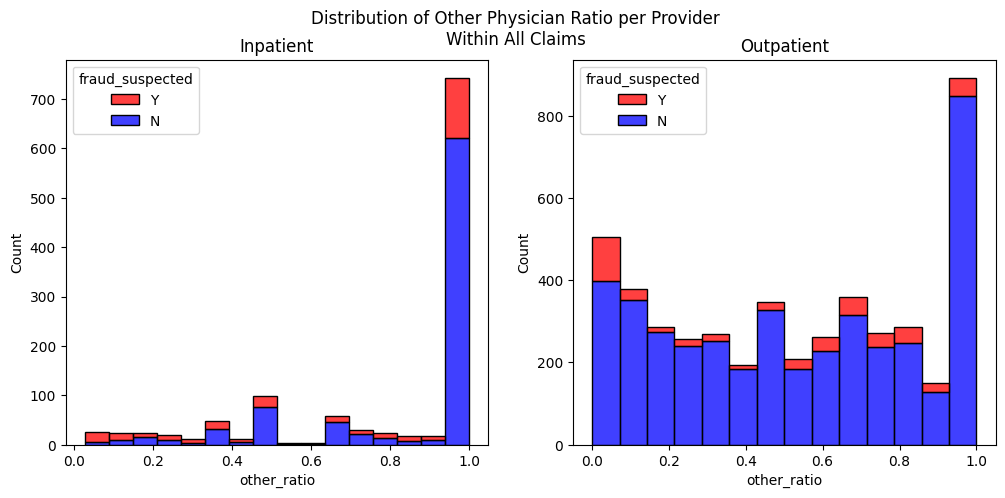

In [211]:
# for other physicians 
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Define color palette
colors = {'Y': 'red', 'N': 'blue'}
hue_order = ['Y', 'N']

sns.histplot(data=ip_other_counts, 
             x='other_ratio', 
             ax=axes[0], 
             hue='fraud_suspected', 
             palette=colors,
             hue_order=hue_order,
             multiple='stack')
axes[0].set_title('Inpatient')

sns.histplot(data=op_other_counts, 
             x='other_ratio', 
             ax=axes[1], 
             hue='fraud_suspected', 
             palette=colors,
             hue_order=hue_order,
             multiple='stack')
axes[1].set_title('Outpatient')

plt.suptitle('Distribution of Other Physician Ratio per Provider\nWithin All Claims')
plt.show();

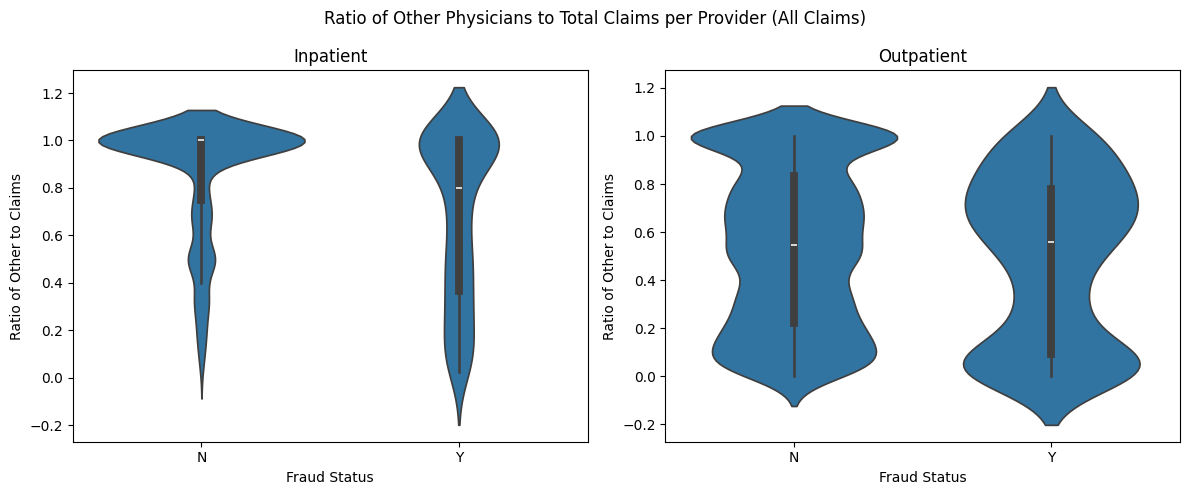

In [212]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.violinplot(data=ip_other_counts, x='fraud_suspected', y='other_ratio', ax=axes[0], order=['N', 'Y'])
axes[0].set_xlabel('Fraud Status')
axes[0].set_ylabel('Ratio of Other to Claims')
axes[0].set_title('Inpatient')

sns.violinplot(data=op_other_counts, x='fraud_suspected', y='other_ratio', ax=axes[1], order=['N', 'Y'])
axes[1].set_xlabel('Fraud Status')
axes[1].set_ylabel('Ratio of Other to Claims')
axes[1].set_title('Outpatient')

plt.suptitle('Ratio of Other Physicians to Total Claims per Provider (All Claims)')
plt.tight_layout()
plt.show();

In [213]:
summary_all_stats = pd.concat([summary_all_stats,
    create_summary_df(ip_other_counts, 'fraud_suspected', 'other_ratio', 'ip_other'), 
    create_summary_df(op_other_counts, 'fraud_suspected', 'other_ratio', 'op_other')],
                         ignore_index=True)
summary_all_stats

,metric,fraud_suspected,count,mean,std,min,25%,50%,75%,max
0,ip_attending,N,1649.0,0.640889,0.334150,0.008929,0.333333,0.692308,1.000000,1.0
1,ip_attending,Y,440.0,0.353597,0.337958,0.002591,0.047619,0.187500,0.680616,1.0
2,op_attending,N,4549.0,0.398569,0.309325,0.000950,0.111111,0.362745,0.621951,1.0
3,op_attending,Y,462.0,0.359491,0.288454,0.000614,0.049227,0.385896,0.570813,1.0
4,ip_operating,N,1520.0,0.710834,0.324910,0.016393,0.479565,0.833333,1.000000,1.0
5,ip_operating,Y,439.0,0.415387,0.357289,0.004444,0.074074,0.294118,0.750000,1.0
6,op_operating,N,3928.0,0.644688,0.329747,0.005556,0.333333,0.700000,1.000000,1.0
7,op_operating,Y,451.0,0.581550,0.353977,0.003413,0.190342,0.687500,0.888889,1.0
8,ip_other,N,878.0,0.858731,0.249217,0.041667,0.750000,1.000000,1.000000,1.0
9,ip_other,Y,279.0,0.682783,0.346056,0.026316,0.364211,0.800000,1.000000,1.0


## Patient diversity

Considered both a subset of duplicate claims, and all the ip/op claims for trends.

**Caution** running code. Code is not specific to 'duplicate' or 'all' claims. ip/op physician counts are calculated on duplicate_ips/ops and inpatient/outpatient as needed.

### Duplicate claims:

In [215]:
# get number of unique inpatients and the number of claims per provider 
ip_patient_counts = duplicate_ips.groupby('Provider')['BeneID'].agg( 
    ['nunique', 'count']
).reset_index()

# rename columns
ip_patient_counts = ip_patient_counts.rename({
    'nunique': 'unique_patients',
    'count': 'num_claims'
}, axis='columns')

# get number of unique outpatients and the number of claims per provider 
op_patient_counts = duplicate_ops.groupby('Provider')['BeneID'].agg( 
    ['nunique', 'count']
).reset_index()

# rename columns
op_patient_counts = op_patient_counts.rename({
    'nunique': 'unique_patients',
    'count': 'num_claims'
}, axis='columns')

In [216]:
op_patient_counts

,Provider,unique_patients,num_claims
0,PRV51001,5,5
1,PRV51003,24,24
2,PRV51004,29,31
3,PRV51005,141,317
4,PRV51007,13,15
...,...,...,...
4511,PRV57756,8,8
4512,PRV57759,7,8
4513,PRV57760,3,6
4514,PRV57761,26,30


In [217]:
# calculate the ratio of number of unique patients to total claims
ip_patient_counts.loc[:, 'patient_ratio'] = ip_patient_counts['unique_patients'] / ip_patient_counts['num_claims']
op_patient_counts.loc[:, 'patient_ratio'] = op_patient_counts['unique_patients'] / op_patient_counts['num_claims']

In [218]:
ip_patient_counts

,Provider,unique_patients,num_claims,patient_ratio
0,PRV51003,2,4,0.5
1,PRV51007,1,1,1.0
2,PRV51021,1,2,0.5
3,PRV51023,1,1,1.0
4,PRV51024,1,1,1.0
...,...,...,...,...
640,PRV57635,1,1,1.0
641,PRV57667,1,2,0.5
642,PRV57711,1,1,1.0
643,PRV57717,1,1,1.0


In [219]:
# add fraud flag
ip_patient_counts.loc[:,'fraud_suspected'] = [
    'Y' if provider in fraud_providers else 'N' for provider in ip_patient_counts['Provider']
]
op_patient_counts.loc[:,'fraud_suspected'] = [
    'Y' if provider in fraud_providers else 'N' for provider in op_patient_counts['Provider']
]

In [220]:
ip_patient_counts

,Provider,unique_patients,num_claims,patient_ratio,fraud_suspected
0,PRV51003,2,4,0.5,Y
1,PRV51007,1,1,1.0,N
2,PRV51021,1,2,0.5,Y
3,PRV51023,1,1,1.0,N
4,PRV51024,1,1,1.0,N
...,...,...,...,...,...
640,PRV57635,1,1,1.0,N
641,PRV57667,1,2,0.5,Y
642,PRV57711,1,1,1.0,N
643,PRV57717,1,1,1.0,N


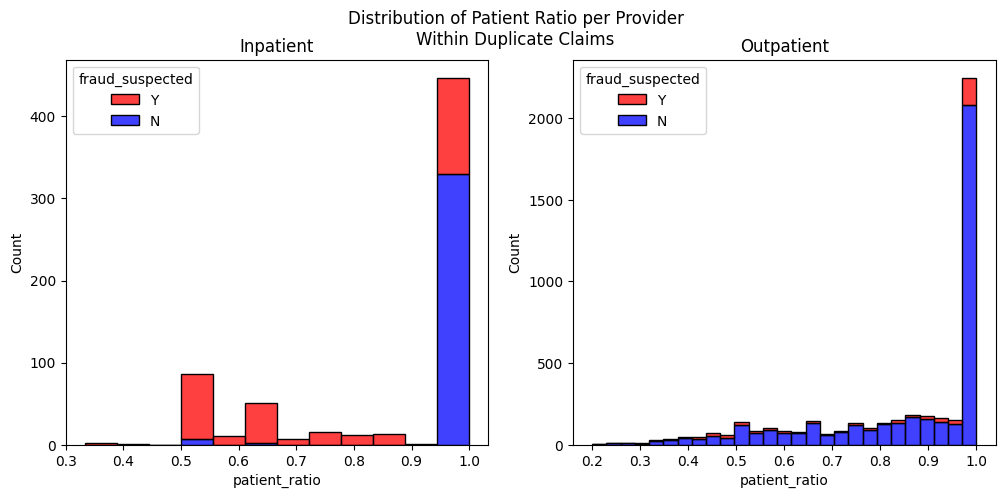

In [221]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Define color palette
colors = {'Y': 'red', 'N': 'blue'}
hue_order = ['Y', 'N']

sns.histplot(data=ip_patient_counts, 
             x='patient_ratio', 
             ax=axes[0], 
             hue='fraud_suspected', 
             palette=colors,
             hue_order=hue_order,
             multiple='stack')
axes[0].set_title('Inpatient')

sns.histplot(data=op_patient_counts, 
             x='patient_ratio', 
             ax=axes[1], 
             hue='fraud_suspected', 
             palette=colors,
             hue_order=hue_order,
             multiple='stack')
axes[1].set_title('Outpatient')

plt.suptitle('Distribution of Patient Ratio per Provider\nWithin Duplicate Claims')
plt.show();

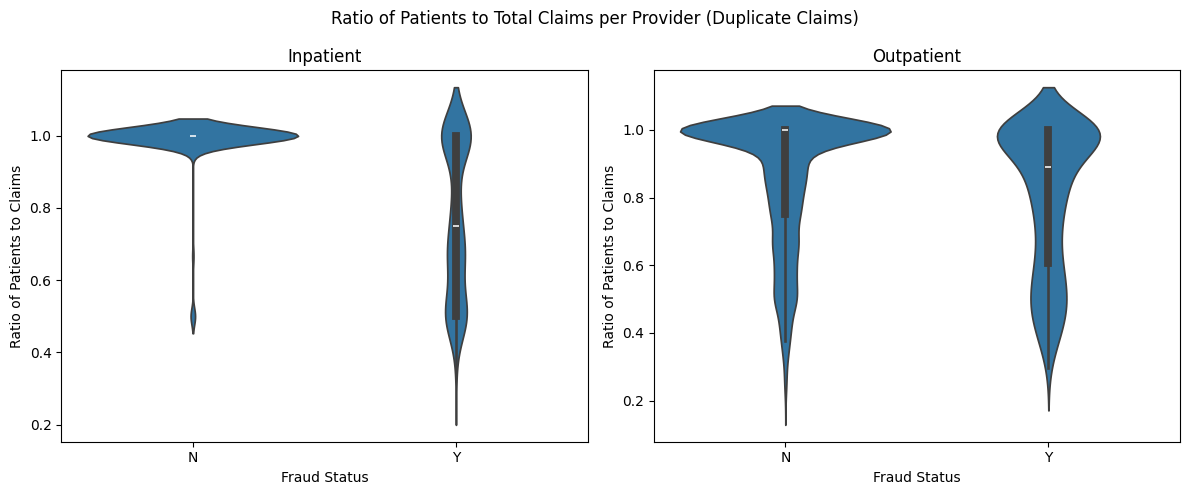

In [222]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.violinplot(data=ip_patient_counts, x='fraud_suspected', y='patient_ratio', ax=axes[0], order=['N', 'Y'])
axes[0].set_xlabel('Fraud Status')
axes[0].set_ylabel('Ratio of Patients to Claims')
axes[0].set_title('Inpatient')

sns.violinplot(data=op_patient_counts, x='fraud_suspected', y='patient_ratio', ax=axes[1], order=['N', 'Y'])
axes[1].set_xlabel('Fraud Status')
axes[1].set_ylabel('Ratio of Patients to Claims')
axes[1].set_title('Outpatient')

plt.suptitle('Ratio of Patients to Total Claims per Provider (Duplicate Claims)')
plt.tight_layout()
plt.show();

In [223]:
summary_dupe_stats = pd.concat([summary_dupe_stats,
    create_summary_df(ip_patient_counts, 'fraud_suspected', 'patient_ratio', 'ip_patient'), 
    create_summary_df(op_patient_counts, 'fraud_suspected', 'patient_ratio', 'op_patient')],
                         ignore_index=True)
summary_dupe_stats

,metric,fraud_suspected,count,mean,std,min,25%,50%,75%,max
0,ip_attending,N,338.0,0.950430,0.147879,0.333333,1.000000,1.000000,1.000000,1.0
1,ip_attending,Y,306.0,0.724151,0.315424,0.076923,0.500000,1.000000,1.000000,1.0
2,op_attending,N,4055.0,0.605438,0.333907,0.004651,0.312500,0.666667,1.000000,1.0
3,op_attending,Y,457.0,0.547590,0.354792,0.002242,0.158416,0.662162,0.854167,1.0
4,ip_operating,N,195.0,0.973077,0.109121,0.333333,1.000000,1.000000,1.000000,1.0
5,ip_operating,Y,234.0,0.809210,0.271383,0.111111,0.500000,1.000000,1.000000,1.0
6,op_operating,N,2768.0,0.812486,0.273970,0.025000,0.666667,1.000000,1.000000,1.0
7,op_operating,Y,398.0,0.732292,0.327709,0.011905,0.500000,0.912879,1.000000,1.0
8,ip_other,N,60.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.0
9,ip_other,Y,59.0,0.934087,0.185545,0.333333,1.000000,1.000000,1.000000,1.0


### All claims

In [225]:
# get number of unique inpatients and the number of claims per provider 
ip_patient_counts = inpatient.groupby('Provider')['BeneID'].agg( 
    ['nunique', 'count']
).reset_index()

# rename columns
ip_patient_counts = ip_patient_counts.rename({
    'nunique': 'unique_patients',
    'count': 'num_claims'
}, axis='columns')

# get number of unique outpatients and the number of claims per provider 
op_patient_counts = outpatient.groupby('Provider')['BeneID'].agg( 
    ['nunique', 'count']
).reset_index()

# rename columns
op_patient_counts = op_patient_counts.rename({
    'nunique': 'unique_patients',
    'count': 'num_claims'
}, axis='columns')

In [226]:
op_patient_counts

,Provider,unique_patients,num_claims
0,PRV51001,19,20
1,PRV51003,66,70
2,PRV51004,138,149
3,PRV51005,495,1165
4,PRV51007,56,69
...,...,...,...
5007,PRV57759,24,28
5008,PRV57760,9,22
5009,PRV57761,67,82
5010,PRV57762,1,1


In [227]:
# calculate the ratio of number of unique patients to total claims
ip_patient_counts.loc[:, 'patient_ratio'] = ip_patient_counts['unique_patients'] / ip_patient_counts['num_claims']
op_patient_counts.loc[:, 'patient_ratio'] = op_patient_counts['unique_patients'] / op_patient_counts['num_claims']

In [228]:
ip_patient_counts

,Provider,unique_patients,num_claims,patient_ratio
0,PRV51001,5,5,1.000000
1,PRV51003,53,62,0.854839
2,PRV51007,3,3,1.000000
3,PRV51008,2,2,1.000000
4,PRV51011,1,1,1.000000
...,...,...,...,...
2087,PRV57719,4,4,1.000000
2088,PRV57728,1,1,1.000000
2089,PRV57729,10,11,0.909091
2090,PRV57732,11,11,1.000000


In [229]:
# add fraud flag
ip_patient_counts.loc[:,'fraud_suspected'] = [
    'Y' if provider in fraud_providers else 'N' for provider in ip_patient_counts['Provider']
]
op_patient_counts.loc[:,'fraud_suspected'] = [
    'Y' if provider in fraud_providers else 'N' for provider in op_patient_counts['Provider']
]

In [230]:
ip_patient_counts

,Provider,unique_patients,num_claims,patient_ratio,fraud_suspected
0,PRV51001,5,5,1.000000,N
1,PRV51003,53,62,0.854839,Y
2,PRV51007,3,3,1.000000,N
3,PRV51008,2,2,1.000000,N
4,PRV51011,1,1,1.000000,N
...,...,...,...,...,...
2087,PRV57719,4,4,1.000000,N
2088,PRV57728,1,1,1.000000,N
2089,PRV57729,10,11,0.909091,N
2090,PRV57732,11,11,1.000000,N


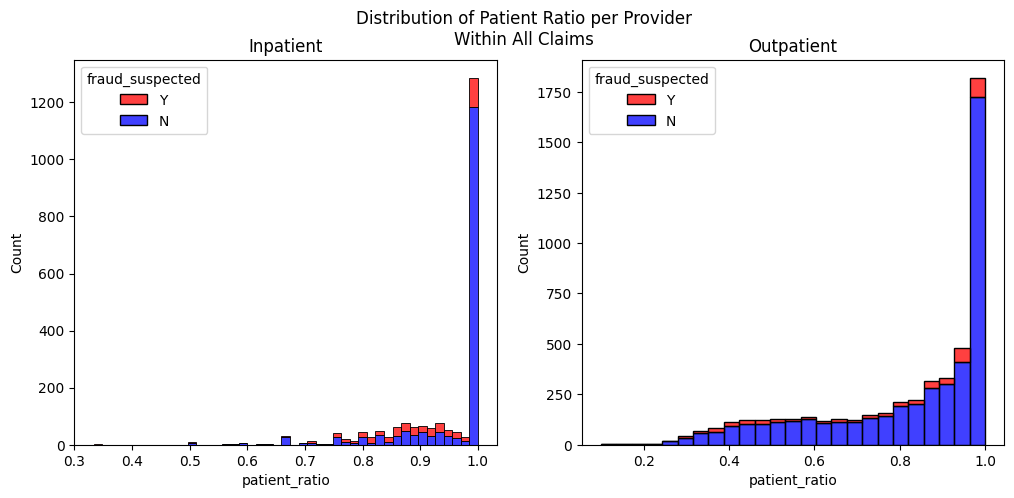

In [231]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Define color palette
colors = {'Y': 'red', 'N': 'blue'}
hue_order = ['Y', 'N']

sns.histplot(data=ip_patient_counts, 
             x='patient_ratio', 
             ax=axes[0], 
             hue='fraud_suspected', 
             palette=colors,
             hue_order=hue_order,
             multiple='stack')
axes[0].set_title('Inpatient')

sns.histplot(data=op_patient_counts, 
             x='patient_ratio', 
             ax=axes[1], 
             hue='fraud_suspected', 
             palette=colors,
             hue_order=hue_order,
             multiple='stack')
axes[1].set_title('Outpatient')

plt.suptitle('Distribution of Patient Ratio per Provider\nWithin All Claims')
plt.show();

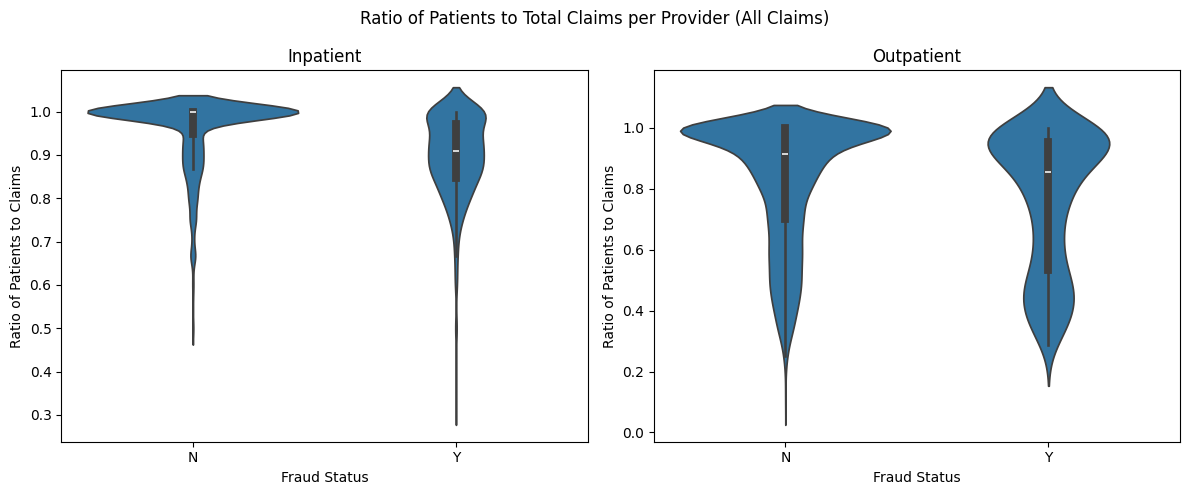

In [232]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.violinplot(data=ip_patient_counts, x='fraud_suspected', y='patient_ratio', ax=axes[0], order=['N', 'Y'])
axes[0].set_xlabel('Fraud Status')
axes[0].set_ylabel('Ratio of Patients to Claims')
axes[0].set_title('Inpatient')

sns.violinplot(data=op_patient_counts, x='fraud_suspected', y='patient_ratio', ax=axes[1], order=['N', 'Y'])
axes[1].set_xlabel('Fraud Status')
axes[1].set_ylabel('Ratio of Patients to Claims')
axes[1].set_title('Outpatient')

plt.suptitle('Ratio of Patients to Total Claims per Provider (All Claims)')
plt.tight_layout()
plt.show();

In [233]:
ip_patient_counts.describe()

,unique_patients,num_claims,patient_ratio
count,2092.000000,2092.000000,2092.000000
mean,17.502868,19.347036,0.945196
std,30.703742,34.983155,0.089486
min,1.000000,1.000000,0.333333
25%,3.000000,3.000000,0.904378
50%,7.000000,8.000000,1.000000
75%,17.000000,19.000000,1.000000
max,458.000000,516.000000,1.000000


In [234]:
op_patient_counts.describe()

,unique_patients,num_claims,patient_ratio
count,5012.000000,5012.000000,5012.000000
mean,66.005786,103.299481,0.820779
std,141.590442,275.481109,0.205787
min,1.000000,1.000000,0.100000
25%,9.000000,11.000000,0.688892
50%,25.000000,31.000000,0.909091
75%,62.000000,85.000000,1.000000
max,2857.000000,8240.000000,1.000000


In [235]:
summary_all_stats = pd.concat([summary_all_stats,
    create_summary_df(ip_patient_counts, 'fraud_suspected', 'patient_ratio', 'ip_patient'), 
    create_summary_df(op_patient_counts, 'fraud_suspected', 'patient_ratio', 'op_patient')],
                         ignore_index=True)
summary_all_stats

,metric,fraud_suspected,count,mean,std,min,25%,50%,75%,max
0,ip_attending,N,1649.0,0.640889,0.334150,0.008929,0.333333,0.692308,1.000000,1.0
1,ip_attending,Y,440.0,0.353597,0.337958,0.002591,0.047619,0.187500,0.680616,1.0
2,op_attending,N,4549.0,0.398569,0.309325,0.000950,0.111111,0.362745,0.621951,1.0
3,op_attending,Y,462.0,0.359491,0.288454,0.000614,0.049227,0.385896,0.570813,1.0
4,ip_operating,N,1520.0,0.710834,0.324910,0.016393,0.479565,0.833333,1.000000,1.0
5,ip_operating,Y,439.0,0.415387,0.357289,0.004444,0.074074,0.294118,0.750000,1.0
6,op_operating,N,3928.0,0.644688,0.329747,0.005556,0.333333,0.700000,1.000000,1.0
7,op_operating,Y,451.0,0.581550,0.353977,0.003413,0.190342,0.687500,0.888889,1.0
8,ip_other,N,878.0,0.858731,0.249217,0.041667,0.750000,1.000000,1.000000,1.0
9,ip_other,Y,279.0,0.682783,0.346056,0.026316,0.364211,0.800000,1.000000,1.0


In [236]:
all_stats_differences = []

# Get unique metrics
metrics = summary_all_stats['metric'].unique()

for metric in metrics:
    df = summary_all_stats
    # Filter data for this metric
    n_data = df[(df['metric'] == metric) & (df['fraud_suspected'] == 'N')]
    y_data = df[(df['metric'] == metric) & (df['fraud_suspected'] == 'Y')]
    
    # Get means
    mean_n = n_data['mean'].values[0]
    mean_y = y_data['mean'].values[0]
    
    # Calculate difference
    diff = mean_n - mean_y
    
    all_stats_differences.append({
        'metric': metric,
        'mean_N': mean_n,
        'mean_Y': mean_y,
        'difference': diff
    })

# Create results DataFrame
all_stats_differences_df = pd.DataFrame(all_stats_differences)

# Sort by absolute difference to see biggest differences first
all_stats_differences_df['abs_diff'] = all_stats_differences_df['difference'].abs()
all_stats_differences_df = all_stats_differences_df.sort_values('abs_diff', ascending=False)

print(all_stats_differences_df[['metric', 'mean_N', 'mean_Y', 'abs_diff']])

         metric    mean_N    mean_Y  abs_diff
2  ip_operating  0.710834  0.415387  0.295447
0  ip_attending  0.640889  0.353597  0.287292
4      ip_other  0.858731  0.682783  0.175948
7    op_patient  0.826920  0.760297  0.066623
3  op_operating  0.644688  0.581550  0.063137
6    ip_patient  0.958396  0.895637  0.062759
5      op_other  0.539359  0.486311  0.053048
1  op_attending  0.398569  0.359491  0.039078


In [237]:
summary_dupe_stats

,metric,fraud_suspected,count,mean,std,min,25%,50%,75%,max
0,ip_attending,N,338.0,0.950430,0.147879,0.333333,1.000000,1.000000,1.000000,1.0
1,ip_attending,Y,306.0,0.724151,0.315424,0.076923,0.500000,1.000000,1.000000,1.0
2,op_attending,N,4055.0,0.605438,0.333907,0.004651,0.312500,0.666667,1.000000,1.0
3,op_attending,Y,457.0,0.547590,0.354792,0.002242,0.158416,0.662162,0.854167,1.0
4,ip_operating,N,195.0,0.973077,0.109121,0.333333,1.000000,1.000000,1.000000,1.0
5,ip_operating,Y,234.0,0.809210,0.271383,0.111111,0.500000,1.000000,1.000000,1.0
6,op_operating,N,2768.0,0.812486,0.273970,0.025000,0.666667,1.000000,1.000000,1.0
7,op_operating,Y,398.0,0.732292,0.327709,0.011905,0.500000,0.912879,1.000000,1.0
8,ip_other,N,60.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.0
9,ip_other,Y,59.0,0.934087,0.185545,0.333333,1.000000,1.000000,1.000000,1.0


In [238]:
dupe_stats_differences = []

# Get unique metrics
metrics = summary_dupe_stats['metric'].unique()

for metric in metrics:
    df = summary_dupe_stats
    # Filter data for this metric
    n_data = df[(df['metric'] == metric) & (df['fraud_suspected'] == 'N')]
    y_data = df[(df['metric'] == metric) & (df['fraud_suspected'] == 'Y')]
    
    # Get means
    mean_n = n_data['mean'].values[0]
    mean_y = y_data['mean'].values[0]
    
    # Calculate difference
    diff = mean_n - mean_y
    
    dupe_stats_differences.append({
        'metric': metric,
        'mean_N': mean_n,
        'mean_Y': mean_y,
        'difference': diff
    })

# Create results DataFrame
dupe_stats_differences_df = pd.DataFrame(dupe_stats_differences)

# Sort by absolute difference to see biggest differences first
dupe_stats_differences_df['abs_diff'] = dupe_stats_differences_df['difference'].abs()
dupe_stats_differences_df = dupe_stats_differences_df.sort_values('abs_diff', ascending=False)

print(dupe_stats_differences_df[['metric', 'mean_N', 'mean_Y', 'abs_diff']])

         metric    mean_N    mean_Y  abs_diff
0  ip_attending  0.950430  0.724151  0.226279
6    ip_patient  0.987709  0.763736  0.223973
2  ip_operating  0.973077  0.809210  0.163867
5      op_other  0.728025  0.641169  0.086857
3  op_operating  0.812486  0.732292  0.080193
4      ip_other  1.000000  0.934087  0.065913
7    op_patient  0.861010  0.800650  0.060360
1  op_attending  0.605438  0.547590  0.057848


# Do these duplicated records show any anomaly in terms of geographic locations? Even though the original data doesn't specify the providers or the doctors' practice locations, one may use the majority of the patients' residence state/county information to infer their physical locations.

- calculate fraud rates by state and county (fraud providers / total providers)
- create a frequency table with number of fraud vs non-fraud providers by location
- compare inpatient and outpatient patterns

In [240]:
beneficiary.head(2)

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,...,2,2,2,2,2,2,0,0,30,50


In [241]:
# add beneficiary State data
inpatient.loc[:, 'State'] = beneficiary['State']
outpatient.loc[:, 'State'] = beneficiary['State']

In [242]:
# add beneficiary County data
inpatient.loc[:, 'County'] = beneficiary['County']
outpatient.loc[:, 'County'] = beneficiary['County']

In [243]:
inpatient.head(2)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,fraud_suspected,State,County
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,39,230
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,7092.0,NaN,NaN,NaN,NaN,NaN,N,39,280


In [244]:
# # calculate fraud percentage by state
# ip_state_fraud_pct = inpatient.groupby('State')['fraud_suspected'].apply(
#     lambda x: (x == 'Y').sum() / len(x) * 100
# ).reset_index(name='fraud_percentage')
# ip_state_fraud_pct.sort_values(by='fraud_percentage', ascending=False, inplace=True)


# op_state_fraud_pct = outpatient.groupby('State')['fraud_suspected'].apply(
#     lambda x: (x == 'Y').sum() / len(x) * 100
# ).reset_index(name='fraud_percentage')
# op_state_fraud_pct.sort_values(by='fraud_percentage', ascending=False, inplace=True)

In [245]:
# calculate fraud percentage by state
ip_state_fraud_pct = inpatient.groupby('State').agg(
    claim_count=('fraud_suspected', 'size'),
    fraud_count=('fraud_suspected', lambda x: (x == 'Y').sum())
).reset_index()
ip_state_fraud_pct['fraud_percentage'] = (ip_state_fraud_pct['fraud_count'] / ip_state_fraud_pct['claim_count'] * 100)
ip_state_fraud_pct.sort_values(by='fraud_percentage', ascending=False, inplace=True)

op_state_fraud_pct = outpatient.groupby('State').agg(
    claim_count=('fraud_suspected', 'size'),
    fraud_count=('fraud_suspected', lambda x: (x == 'Y').sum())
).reset_index()
op_state_fraud_pct['fraud_percentage'] = (op_state_fraud_pct['fraud_count'] / op_state_fraud_pct['claim_count'] * 100)
op_state_fraud_pct.sort_values(by='fraud_percentage', ascending=False, inplace=True)

In [246]:
ip_state_fraud_pct.head(10)

,State,claim_count,fraud_count,fraud_percentage
45,47,104,69,66.346154
7,8,104,67,64.423077
8,9,57,35,61.403509
1,2,61,37,60.655738
15,16,485,294,60.618557
23,24,633,383,60.505529
31,32,308,186,60.389610
24,25,472,284,60.169492
29,30,203,122,60.098522
27,28,269,161,59.851301


In [247]:
# calculate fraud percentage by county
ip_county_fraud_pct = inpatient.groupby('County').agg(
    claim_count=('fraud_suspected', 'size'),
    fraud_count=('fraud_suspected', lambda x: (x == 'Y').sum())
).reset_index()
ip_county_fraud_pct['fraud_percentage'] = (ip_county_fraud_pct['fraud_count'] / ip_county_fraud_pct['claim_count'] * 100)
ip_county_fraud_pct.sort_values(by='fraud_percentage', ascending=False, inplace=True)

op_county_fraud_pct = outpatient.groupby('County').agg(
    claim_count=('fraud_suspected', 'size'),
    fraud_count=('fraud_suspected', lambda x: (x == 'Y').sum())
).reset_index()
op_county_fraud_pct['fraud_percentage'] = (op_county_fraud_pct['fraud_count'] / op_county_fraud_pct['claim_count'] * 100)
op_county_fraud_pct.sort_values(by='fraud_percentage', ascending=False, inplace=True)

In [248]:
ip_county_fraud_pct.head()

,County,claim_count,fraud_count,fraud_percentage
148,681,5,5,100.0
224,878,1,1,100.0
120,583,1,1,100.0
26,161,1,1,100.0
62,321,1,1,100.0


In [249]:
ip_state_fraud_pct.head()

,State,claim_count,fraud_count,fraud_percentage
45,47,104,69,66.346154
7,8,104,67,64.423077
8,9,57,35,61.403509
1,2,61,37,60.655738
15,16,485,294,60.618557


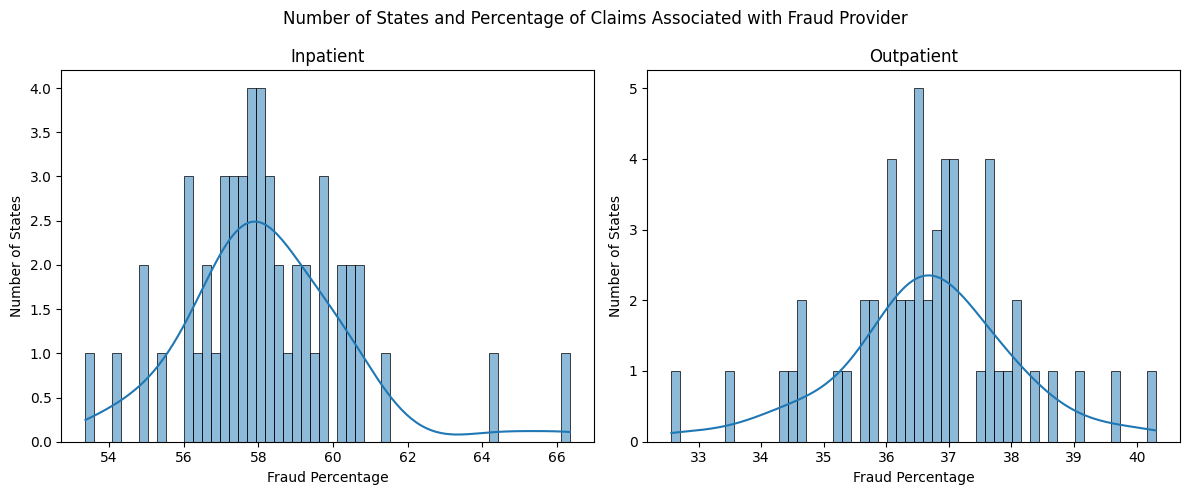

In [250]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(x=ip_state_fraud_pct['fraud_percentage'], ax=axes[0], kde=True, bins=54)
axes[0].set_title('Inpatient')
axes[0].set_xlabel('Fraud Percentage')
axes[0].set_ylabel('Number of States')

sns.histplot(x=op_state_fraud_pct['fraud_percentage'], ax=axes[1], kde=True, bins=54)
axes[1].set_title('Outpatient')
axes[1].set_xlabel('Fraud Percentage')
axes[1].set_ylabel('Number of States')

plt.suptitle('Number of States and Percentage of Claims Associated with Fraud Provider')
plt.tight_layout() 
plt.show()

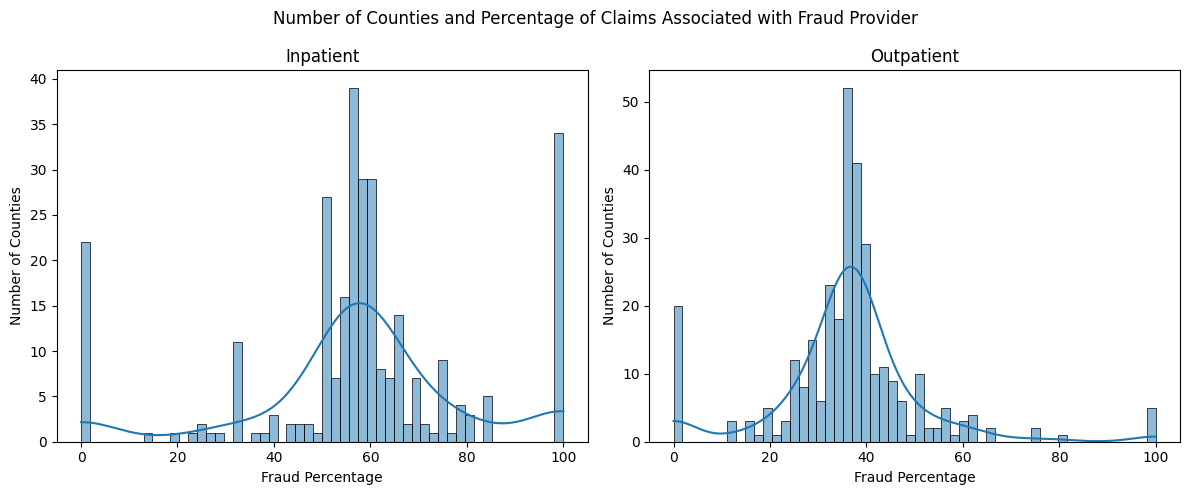

In [251]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(x=ip_county_fraud_pct['fraud_percentage'], ax=axes[0], kde=True, bins=54)
axes[0].set_title('Inpatient')
axes[0].set_xlabel('Fraud Percentage')
axes[0].set_ylabel('Number of Counties')

sns.histplot(x=op_county_fraud_pct['fraud_percentage'], ax=axes[1], kde=True, bins=54)
axes[1].set_title('Outpatient')
axes[1].set_xlabel('Fraud Percentage')
axes[1].set_ylabel('Number of Counties')

plt.suptitle('Number of Counties and Percentage of Claims Associated with Fraud Provider')
plt.tight_layout() 
plt.show()

In [252]:
print('inpatient state fraud mean percentage:', ip_state_fraud_pct['fraud_percentage'].mean())
print('outpatient state fraud mean percentage:', op_state_fraud_pct['fraud_percentage'].mean())
print('inpatient county fraud mean percentage:', ip_county_fraud_pct['fraud_percentage'].mean())
print('outpatient county fraud mean percentage:', op_county_fraud_pct['fraud_percentage'].mean())

inpatient state fraud mean percentage: 58.232948728493966
outpatient state fraud mean percentage: 36.64654755978242
inpatient county fraud mean percentage: 57.82077716263898
outpatient county fraud mean percentage: 36.19459054079018


This is at the claim level, simply looking at claims and how many of them are associated with fraud providers.

### how many claims do providers file by state and county

In [255]:
inpatient.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,fraud_suspected,State,County
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,39,230
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,7092.0,NaN,NaN,NaN,NaN,NaN,N,39,280
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,52,590
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,NaN,331.0,NaN,NaN,NaN,NaN,NaN,N,39,270
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,NaN,3893.0,NaN,NaN,NaN,NaN,NaN,N,24,680


In [256]:
# group by provider
# count number of counties associated with these provider claims
# count number of states associated with these provider claims
ip_provider_state_counts = inpatient.groupby('Provider')['State'].nunique().reset_index()
ip_provider_state_counts.rename({'State':'num_state'}, axis=1, inplace=True)
ip_provider_county_counts = inpatient.groupby('Provider')['County'].nunique().reset_index()
ip_provider_county_counts.rename({'County':'num_county'}, axis=1, inplace=True)
ip_provider_claim_counts = inpatient.groupby('Provider')['ClaimID'].nunique().reset_index()
ip_provider_claim_counts.rename({'ClaimID':'num_claims'}, axis=1, inplace=True)

op_provider_state_counts = outpatient.groupby('Provider')['State'].nunique().reset_index()
op_provider_state_counts.rename({'State':'num_state'}, axis=1, inplace=True)
op_provider_county_counts = outpatient.groupby('Provider')['County'].nunique().reset_index()
op_provider_county_counts.rename({'County':'num_county'}, axis=1, inplace=True)
op_provider_claim_counts = outpatient.groupby('Provider')['ClaimID'].nunique().reset_index()
op_provider_claim_counts.rename({'ClaimID':'num_claims'}, axis=1, inplace=True)

In [257]:
op_provider_claim_counts 

,Provider,num_claims
0,PRV51001,20
1,PRV51003,70
2,PRV51004,149
3,PRV51005,1165
4,PRV51007,69
...,...,...
5007,PRV57759,28
5008,PRV57760,22
5009,PRV57761,82
5010,PRV57762,1


In [258]:
# merge state and county counts for each ip/op dataset
ip_provider_counts = ip_provider_state_counts.merge(ip_provider_county_counts, on='Provider', how='inner')
ip_provider_counts = ip_provider_counts.merge(ip_provider_claim_counts, on='Provider', how='inner')
op_provider_counts = op_provider_state_counts.merge(op_provider_county_counts, on='Provider', how='inner')
op_provider_counts = op_provider_counts.merge(op_provider_claim_counts, on='Provider', how='inner')

In [259]:
ip_provider_counts

,Provider,num_state,num_county,num_claims
0,PRV51001,4,5,5
1,PRV51003,28,44,62
2,PRV51007,3,3,3
3,PRV51008,2,2,2
4,PRV51011,1,1,1
...,...,...,...,...
2087,PRV57719,4,4,4
2088,PRV57728,1,1,1
2089,PRV57729,8,10,11
2090,PRV57732,9,10,11


In [260]:
# add fraud status
ip_provider_counts['fraud_suspected'] = [
    'Y' if provider in fraud_providers else 'N' for provider in ip_provider_counts['Provider']
]
op_provider_counts['fraud_suspected'] = [
    'Y' if provider in fraud_providers else 'N' for provider in op_provider_counts['Provider']
]

In [261]:
ip_provider_counts

,Provider,num_state,num_county,num_claims,fraud_suspected
0,PRV51001,4,5,5,N
1,PRV51003,28,44,62,Y
2,PRV51007,3,3,3,N
3,PRV51008,2,2,2,N
4,PRV51011,1,1,1,N
...,...,...,...,...,...
2087,PRV57719,4,4,4,N
2088,PRV57728,1,1,1,N
2089,PRV57729,8,10,11,N
2090,PRV57732,9,10,11,N


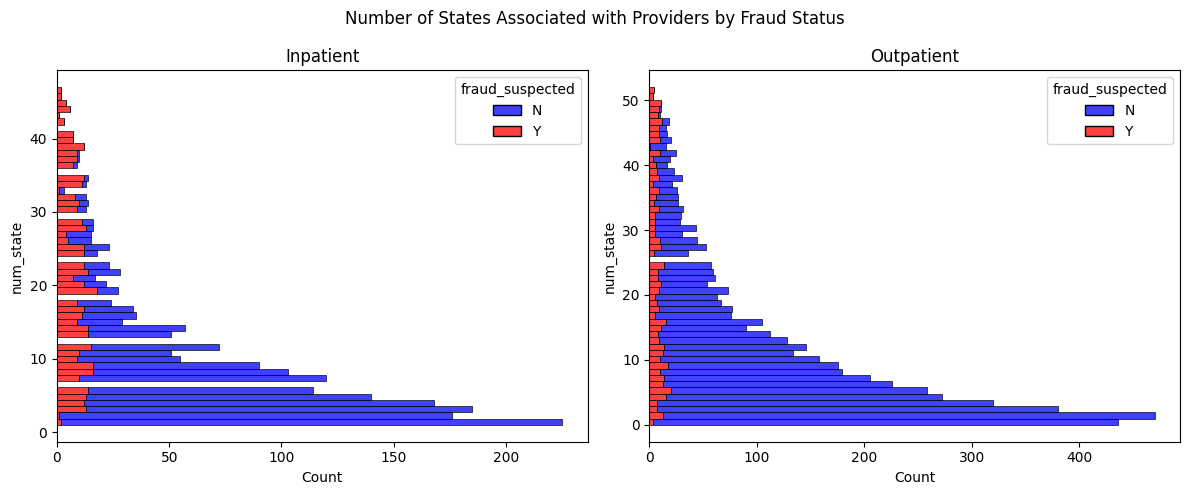

In [262]:
# for the entire data set
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Define color palette with exact hex colors
colors = {'Y': '#FF0000', 'N': '#0000FF'}  # Pure red and pure blue 
hue_order = ['N', 'Y']

sns.histplot(data=ip_provider_counts, y='num_state', ax=axes[0], hue='fraud_suspected', 
             palette=colors, multiple='stack', hue_order=hue_order, bins=54)
axes[0].set_title('Inpatient')

sns.histplot(data=op_provider_counts, y='num_state', ax=axes[1], hue='fraud_suspected', 
             palette=colors, multiple='stack', hue_order=hue_order, bins=54)
axes[1].set_title('Outpatient')

plt.suptitle('Number of States Associated with Providers by Fraud Status')
plt.tight_layout() 
plt.show()

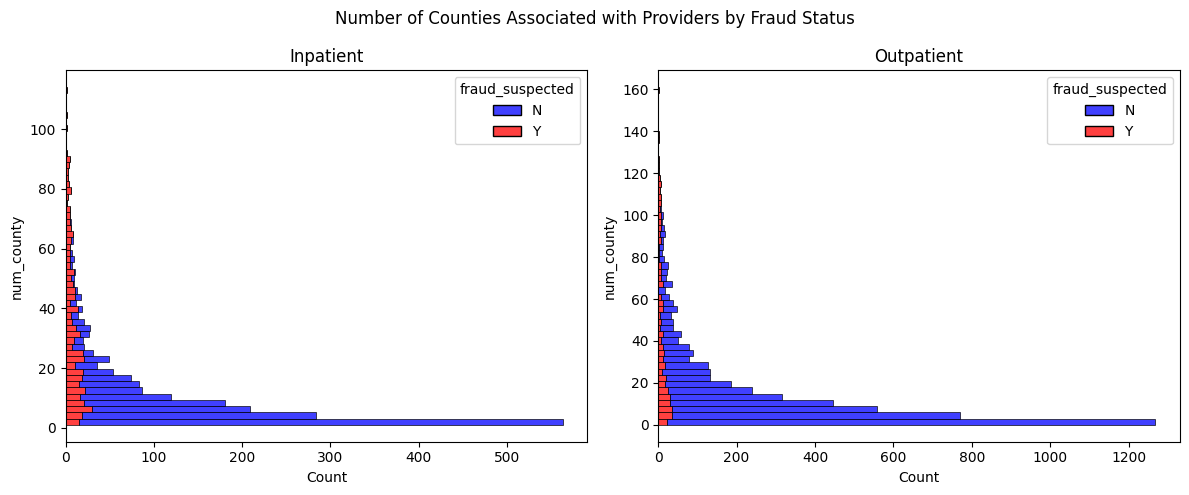

In [263]:
# for the entire data set
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Define color palette with exact hex colors
colors = {'Y': '#FF0000', 'N': '#0000FF'}  # Pure red and pure blue 
hue_order = ['N', 'Y']

sns.histplot(data=ip_provider_counts, y='num_county', ax=axes[0], hue='fraud_suspected', 
             palette=colors, multiple='stack', hue_order=hue_order, bins=54)
axes[0].set_title('Inpatient')

sns.histplot(data=op_provider_counts, y='num_county', ax=axes[1], hue='fraud_suspected', 
             palette=colors, multiple='stack', hue_order=hue_order, bins=54)
axes[1].set_title('Outpatient')

plt.suptitle('Number of Counties Associated with Providers by Fraud Status')
plt.tight_layout() 
plt.show()

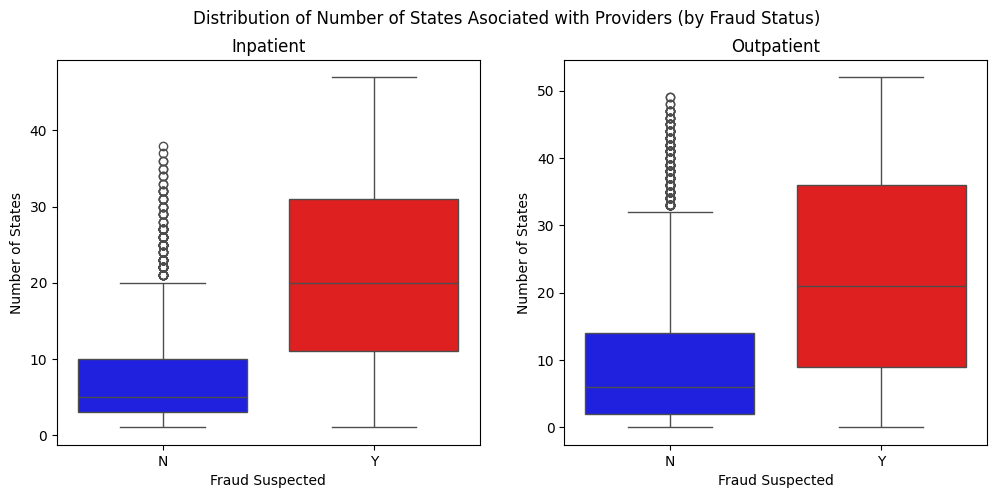

In [264]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Define color palette with exact hex colors
colors = {'Y': '#FF0000', 'N': '#0000FF'}  # Pure red and pure blue 
hue_order = ['N', 'Y']

sns.boxplot(data=ip_provider_counts, x='fraud_suspected', y='num_state', ax=axes[0], hue='fraud_suspected', 
             palette=colors, hue_order=hue_order)
axes[0].set_title('Inpatient')
axes[0].set_xlabel('Fraud Suspected')
axes[0].set_ylabel('Number of States')

sns.boxplot(data=op_provider_counts, x='fraud_suspected', y='num_state', ax=axes[1], hue='fraud_suspected', 
             palette=colors, hue_order=hue_order)
axes[1].set_title('Outpatient')
axes[1].set_xlabel('Fraud Suspected')
axes[1].set_ylabel('Number of States')

plt.suptitle('Distribution of Number of States Asociated with Providers (by Fraud Status)')
plt.show()

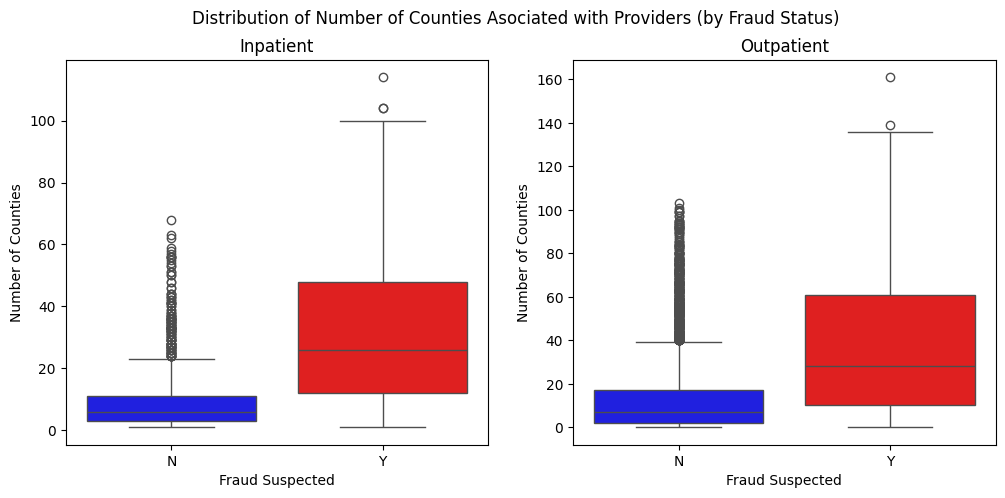

In [265]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Define color palette with exact hex colors
colors = {'Y': '#FF0000', 'N': '#0000FF'}  # Pure red and pure blue 
hue_order = ['N', 'Y']

sns.boxplot(data=ip_provider_counts, x='fraud_suspected', y='num_county', ax=axes[0], hue='fraud_suspected', 
             palette=colors, hue_order=hue_order)
axes[0].set_title('Inpatient')
axes[0].set_xlabel('Fraud Suspected')
axes[0].set_ylabel('Number of Counties')

sns.boxplot(data=op_provider_counts, x='fraud_suspected', y='num_county', ax=axes[1], hue='fraud_suspected', 
             palette=colors, hue_order=hue_order)
axes[1].set_title('Outpatient')
axes[1].set_xlabel('Fraud Suspected')
axes[1].set_ylabel('Number of Counties')

plt.suptitle('Distribution of Number of Counties Asociated with Providers (by Fraud Status)')
plt.show()

### Looking in duplicate records

In [267]:
duplicate_ops

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode,fraud_suspected,count
0,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,Y,2
1,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,NaN,NaN,NaN,NaN,NaN,NaN,0,71947,Y,2
2,BENE11004,CLM224741,2009-03-03,2009-03-03,PRV56011,40,PHY345721,NaN,NaN,V6546,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,Y,2
3,BENE11004,CLM252512,2009-03-18,2009-03-18,PRV56011,200,PHY346833,NaN,PHY346833,72290,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,Y,2
4,BENE11004,CLM322683,2009-04-25,2009-05-15,PRV56011,60,PHY372925,NaN,PHY311407,71856,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,Y,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131307,BENE159198,CLM347778,2009-05-08,2009-05-08,PRV53676,80,PHY361063,NaN,NaN,30279,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,N,2
131308,BENE159198,CLM551294,2009-08-29,2009-08-29,PRV53702,400,PHY423019,PHY332284,NaN,07041,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,N,2
131309,BENE159198,CLM596444,2009-09-24,2009-09-24,PRV53676,60,PHY361063,NaN,NaN,V570,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,N,2
131310,BENE159198,CLM636992,2009-10-18,2009-10-18,PRV53689,70,PHY403198,NaN,PHY419379,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,N,2


In [268]:
# add state and county data
duplicate_ops = duplicate_ops.merge(
    beneficiary[['BeneID', 'State', 'County']], 
    on='BeneID', 
    how='left'
)

duplicate_ips = duplicate_ips.merge(
    beneficiary[['BeneID', 'State', 'County']], 
    on='BeneID', 
    how='left'
)

In [269]:
duplicate_ops

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode,fraud_suspected,count,State,County
0,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,NaN,NaN,NaN,NaN,0,NaN,Y,2,39,270
1,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,NaN,NaN,NaN,NaN,0,71947,Y,2,39,270
2,BENE11004,CLM224741,2009-03-03,2009-03-03,PRV56011,40,PHY345721,NaN,NaN,V6546,...,NaN,NaN,NaN,NaN,0,NaN,Y,2,39,270
3,BENE11004,CLM252512,2009-03-18,2009-03-18,PRV56011,200,PHY346833,NaN,PHY346833,72290,...,NaN,NaN,NaN,NaN,0,NaN,Y,2,39,270
4,BENE11004,CLM322683,2009-04-25,2009-05-15,PRV56011,60,PHY372925,NaN,PHY311407,71856,...,NaN,NaN,NaN,NaN,0,NaN,Y,2,39,270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131307,BENE159198,CLM347778,2009-05-08,2009-05-08,PRV53676,80,PHY361063,NaN,NaN,30279,...,NaN,NaN,NaN,NaN,0,NaN,N,2,21,20
131308,BENE159198,CLM551294,2009-08-29,2009-08-29,PRV53702,400,PHY423019,PHY332284,NaN,07041,...,NaN,NaN,NaN,NaN,0,NaN,N,2,21,20
131309,BENE159198,CLM596444,2009-09-24,2009-09-24,PRV53676,60,PHY361063,NaN,NaN,V570,...,NaN,NaN,NaN,NaN,0,NaN,N,2,21,20
131310,BENE159198,CLM636992,2009-10-18,2009-10-18,PRV53689,70,PHY403198,NaN,PHY419379,NaN,...,NaN,NaN,NaN,NaN,0,NaN,N,2,21,20


In [571]:
# group by provider
# count number of counties associated with these provider claims
# count number of states associated with these provider claims
ip_dupes_state_counts = duplicate_ips.groupby('Provider')['State'].nunique().reset_index()
ip_dupes_state_counts.rename({'State':'num_state'}, axis=1, inplace=True)
ip_dupes_county_counts = duplicate_ips.groupby('Provider')['County'].nunique().reset_index()
ip_dupes_county_counts.rename({'County':'num_county'}, axis=1, inplace=True)
ip_dupes_claim_counts = duplicate_ips.groupby('Provider')['ClaimID'].nunique().reset_index()
ip_dupes_claim_counts.rename({'ClaimID':'num_claims'}, axis=1, inplace=True)

op_dupes_state_counts = duplicate_ops.groupby('Provider')['State'].nunique().reset_index()
op_dupes_state_counts.rename({'State':'num_state'}, axis=1, inplace=True)
op_dupes_county_counts = duplicate_ops.groupby('Provider')['County'].nunique().reset_index()
op_dupes_county_counts.rename({'County':'num_county'}, axis=1, inplace=True)
op_dupes_claim_counts = duplicate_ops.groupby('Provider')['ClaimID'].nunique().reset_index()
op_dupes_claim_counts.rename({'ClaimID':'num_claims'}, axis=1, inplace=True)

In [573]:
ip_dupes_state_counts

,Provider,num_state
0,PRV51003,1
1,PRV51007,1
2,PRV51021,1
3,PRV51023,1
4,PRV51024,1
...,...,...
640,PRV57635,1
641,PRV57667,1
642,PRV57711,1
643,PRV57717,1


In [575]:
# merge state and county counts for each ip/op dataset
ip_dupes_counts = ip_dupes_state_counts.merge(ip_dupes_county_counts, on='Provider', how='inner')
ip_dupes_counts = ip_dupes_counts.merge(ip_dupes_claim_counts, on='Provider', how='inner')
op_dupes_counts = op_dupes_state_counts.merge(op_dupes_county_counts, on='Provider', how='inner')
op_dupes_counts = op_dupes_counts.merge(op_dupes_claim_counts, on='Provider', how='inner')

In [577]:
ip_dupes_counts

,Provider,num_state,num_county,num_claims
0,PRV51003,1,1,4
1,PRV51007,1,1,1
2,PRV51021,1,1,2
3,PRV51023,1,1,1
4,PRV51024,1,1,1
...,...,...,...,...
640,PRV57635,1,1,1
641,PRV57667,1,1,2
642,PRV57711,1,1,1
643,PRV57717,1,1,1


In [579]:
duplicate_ips[duplicate_ips['Provider']=='PRV51003']

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,fraud_suspected,count,State,County
279,BENE32220,CLM56093,2009-06-18,2009-06-20,PRV51003,4000,PHY364445,NaN,NaN,2009-06-18,...,NaN,NaN,NaN,NaN,NaN,NaN,Y,2,1,340
280,BENE32220,CLM65273,2009-08-25,2009-08-27,PRV51003,4000,PHY397381,NaN,NaN,2009-08-25,...,NaN,NaN,NaN,NaN,NaN,NaN,Y,2,1,340
1521,BENE155913,CLM41110,2009-03-04,2009-03-08,PRV51003,10000,PHY397381,PHY397381,NaN,2009-03-04,...,9390.0,NaN,NaN,NaN,NaN,NaN,Y,2,1,340
1522,BENE155913,CLM58222,2009-07-03,2009-07-05,PRV51003,10000,PHY397381,PHY364445,NaN,2009-07-03,...,3722.0,NaN,NaN,NaN,NaN,NaN,Y,2,1,340


In [581]:
# add fraud status
ip_dupes_counts['fraud_suspected'] = [
    'Y' if provider in fraud_providers else 'N' for provider in ip_dupes_counts['Provider']
]
op_dupes_counts['fraud_suspected'] = [
    'Y' if provider in fraud_providers else 'N' for provider in op_dupes_counts['Provider']
]

In [583]:
op_dupes_counts

,Provider,num_state,num_county,num_claims,fraud_suspected
0,PRV51001,1,4,5,N
1,PRV51003,3,14,24,Y
2,PRV51004,7,15,31,N
3,PRV51005,3,18,317,Y
4,PRV51007,2,4,15,N
...,...,...,...,...,...
4511,PRV57756,1,4,8,N
4512,PRV57759,1,2,8,N
4513,PRV57760,1,3,6,N
4514,PRV57761,1,2,30,N


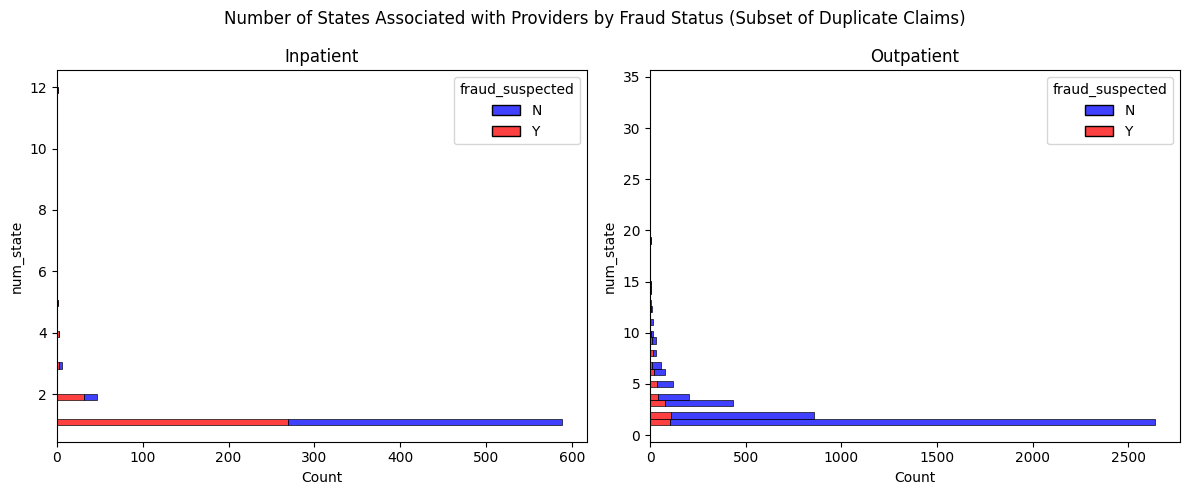

In [585]:
# for the subset of duplicate claims 
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Define color palette with exact hex colors
colors = {'Y': '#FF0000', 'N': '#0000FF'}  # Pure red and pure blue 
hue_order = ['N', 'Y']

sns.histplot(data=ip_dupes_counts, y='num_state', ax=axes[0], hue='fraud_suspected', 
             palette=colors, multiple='stack', hue_order=hue_order, bins=54)
axes[0].set_title('Inpatient')

sns.histplot(data=op_dupes_counts, y='num_state', ax=axes[1], hue='fraud_suspected', 
             palette=colors, multiple='stack', hue_order=hue_order, bins=54)
axes[1].set_title('Outpatient')

plt.suptitle('Number of States Associated with Providers by Fraud Status (Subset of Duplicate Claims)')
plt.tight_layout() 
plt.show()

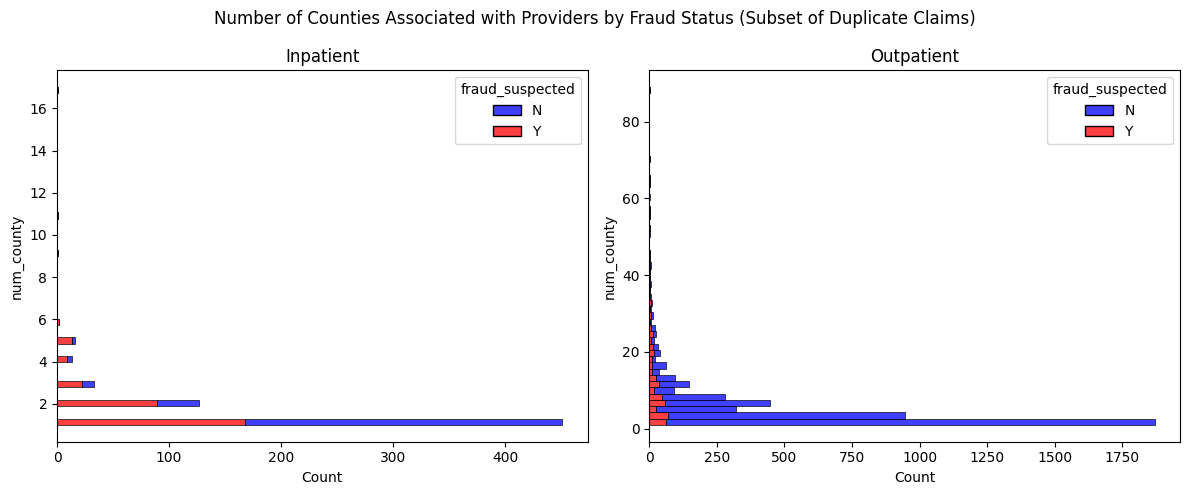

In [587]:
# for the subset of duplicate claims
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Define color palette with exact hex colors
colors = {'Y': '#FF0000', 'N': '#0000FF'}  # Pure red and pure blue 
hue_order = ['N', 'Y']

sns.histplot(data=ip_dupes_counts, y='num_county', ax=axes[0], hue='fraud_suspected', 
             palette=colors, multiple='stack', hue_order=hue_order, bins=54)
axes[0].set_title('Inpatient')

sns.histplot(data=op_dupes_counts, y='num_county', ax=axes[1], hue='fraud_suspected', 
             palette=colors, multiple='stack', hue_order=hue_order, bins=54)
axes[1].set_title('Outpatient')

plt.suptitle('Number of Counties Associated with Providers by Fraud Status (Subset of Duplicate Claims)')
plt.tight_layout() 
plt.show()

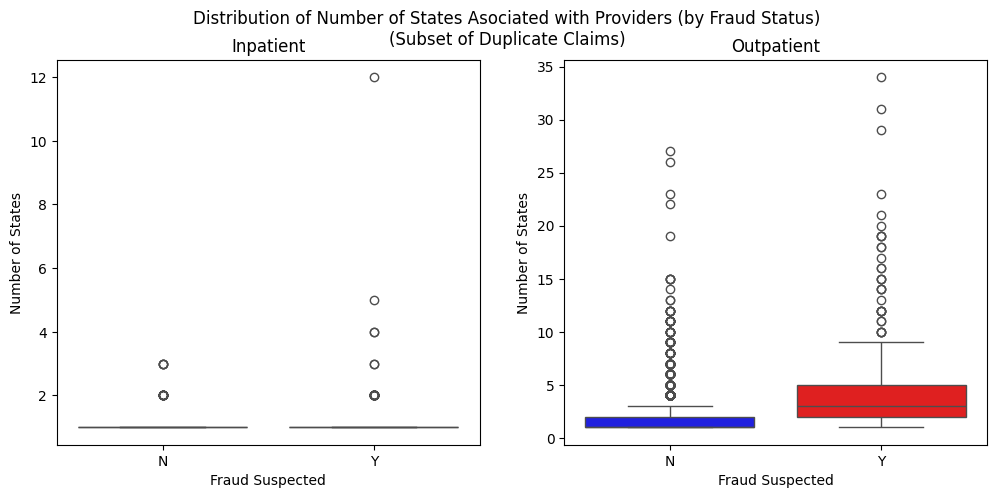

In [589]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Define color palette with exact hex colors
colors = {'Y': '#FF0000', 'N': '#0000FF'}  # Pure red and pure blue 
hue_order = ['N', 'Y']

sns.boxplot(data=ip_dupes_counts, x='fraud_suspected', y='num_state', ax=axes[0], hue='fraud_suspected', 
             palette=colors, hue_order=hue_order, order=['N', 'Y'])
axes[0].set_title('Inpatient')
axes[0].set_xlabel('Fraud Suspected')
axes[0].set_ylabel('Number of States')

sns.boxplot(data=op_dupes_counts, x='fraud_suspected', y='num_state', ax=axes[1], hue='fraud_suspected', 
             palette=colors, hue_order=hue_order)
axes[1].set_title('Outpatient')
axes[1].set_xlabel('Fraud Suspected')
axes[1].set_ylabel('Number of States')

plt.suptitle('Distribution of Number of States Asociated with Providers (by Fraud Status)\n(Subset of Duplicate Claims)')
plt.show()

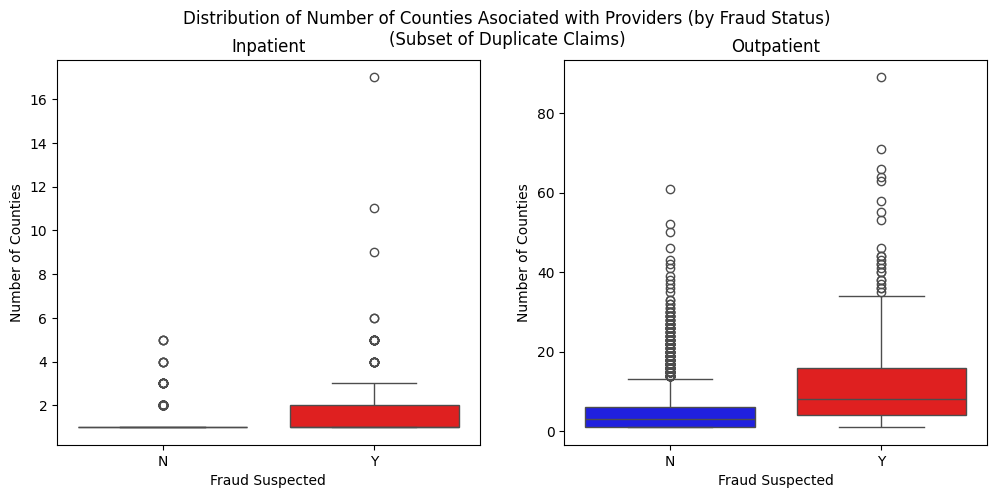

In [591]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Define color palette with exact hex colors
colors = {'Y': '#FF0000', 'N': '#0000FF'}  # Pure red and pure blue 
hue_order = ['N', 'Y']

sns.boxplot(data=ip_dupes_counts, x='fraud_suspected', y='num_county', ax=axes[0], hue='fraud_suspected', 
             palette=colors, hue_order=hue_order, order=['N', 'Y'])
axes[0].set_title('Inpatient')
axes[0].set_xlabel('Fraud Suspected')
axes[0].set_ylabel('Number of Counties')

sns.boxplot(data=op_dupes_counts, x='fraud_suspected', y='num_county', ax=axes[1], hue='fraud_suspected', 
             palette=colors, hue_order=hue_order)
axes[1].set_title('Outpatient')
axes[1].set_xlabel('Fraud Suspected')
axes[1].set_ylabel('Number of Counties')

plt.suptitle('Distribution of Number of Counties Asociated with Providers (by Fraud Status)\n(Subset of Duplicate Claims)')
plt.show()

Inpatient providers suspected of fraud are filing claims in 4 times as many states and counties as their non-fraud counterparts. 

Outpatient providers suspected of fraud are also filing claims in 4 times as many counties as their non-fraud counterparts. 

# Based on your best knowledge of suspicious activities in duplicating patient claims, flag the providers accordingly. Compare with the **PotentialFraud** flags offered by the dataset and discuss.

- create a set of fraud benchmarks based on claim duplication data
- apply to inpatient/outpatient with new fraud flag
- compare to known fraud flag

**Observations based on duplicate claims:**
- **Question:** What fields to use to define 'duplicate claims'
- **Question:** How does analysis of duplicate claims apply to behavior of all claims in general? 
- *Defining duplicate claims as having common BeneID and Provider:*
- Inpatients have a wider variety of **diagnosis codes** assoicated with them, compared to outpatients.
- All non-fraud inpatient providers cite a single diagnosis code.
- All inpatient fraud providers cite 2 or more (as many as 10) diagnosis codes.
- Flag inpatient providers who cite more than 1 diagnosis code as suspicious.
- Interestingly, outpatient non-fraud providers cite more diagnosis codes than fraud providers.
- For **procedure codes** (no outpatient), inpatient claims associated with fraud provider may cite 2 procedures, whereas non-fraud providers cite only 1. But this is based on looking at a small group of duplicates.
- **How to examine Admit codes for patterns?** Having a common admit code (when BeneID and Provider are the same) is more common in inpatient claims associated with a fraud provider. Use common admit codes as a flag for fraud suspicion?
- Among fraud suspected providers, there is a significant reuse in all types of inpatient physician IDs.
- There is no significant reuse of patient IDs in the broader data, but significant patient ID reuse in the duplicated records. 

# How to choose a good threshold for flagging monthly claim rates?

- Fraud providers file an average of 4.009 (std = 5.008 ) to 4.889 (std = 6.147) claims per month. 
- Non-fraud providers file an average of 0.760 (std = 1.329) to 0.956 (std = 1.515) claims per month.


Get data from the IP/OP pivot tables from WQ3 and visualize the distributions

In [595]:
inpatient.head(2)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,fraud_suspected,State,County
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,39,230
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,7092.0,NaN,NaN,NaN,NaN,NaN,N,39,280


In [597]:
# add month claim was filed to IP/OP
inpatient['Month'] = inpatient['ClaimStartDt'].dt.to_period('M')
outpatient['Month'] = outpatient['ClaimStartDt'].dt.to_period('M')

In [599]:
inpatient.head(2)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,fraud_suspected,State,County,Month
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,NaN,NaN,NaN,NaN,NaN,NaN,Y,39,230,2009-04
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,7092.0,NaN,NaN,NaN,NaN,NaN,N,39,280,2009-08


In [601]:
# count how many claims were filed each month by each provider
inpatient_monthly_claims = inpatient.groupby(['Provider', 'Month'])['ClaimID'].count().reset_index()
# rename column
inpatient_monthly_claims.rename({'ClaimID':'num_inpatient_claims'}, axis='columns', inplace=True)

# count how many claims were filed each month by each provider
outpatient_monthly_claims = outpatient.groupby(['Provider', 'Month'])['ClaimID'].count().reset_index()
# rename column
outpatient_monthly_claims.rename({'ClaimID':'num_outpatient_claims'}, axis='columns', inplace=True)

outpatient_monthly_claims

,Provider,Month,num_outpatient_claims
0,PRV51001,2009-01,2
1,PRV51001,2009-02,2
2,PRV51001,2009-03,3
3,PRV51001,2009-04,2
4,PRV51001,2009-05,3
...,...,...,...
47586,PRV57763,2009-08,16
47587,PRV57763,2009-09,18
47588,PRV57763,2009-10,9
47589,PRV57763,2009-11,13


In [603]:
outpatient_monthly_claims

,Provider,Month,num_outpatient_claims
0,PRV51001,2009-01,2
1,PRV51001,2009-02,2
2,PRV51001,2009-03,3
3,PRV51001,2009-04,2
4,PRV51001,2009-05,3
...,...,...,...
47586,PRV57763,2009-08,16
47587,PRV57763,2009-09,18
47588,PRV57763,2009-10,9
47589,PRV57763,2009-11,13


In [605]:
# create a table of monthly claim frequencies
inpatient_pivot_table = inpatient.groupby(['Provider', inpatient['ClaimStartDt'].dt.month]).size().unstack(fill_value=0)
outpatient_pivot_table = outpatient.groupby(['Provider', inpatient['ClaimStartDt'].dt.month]).size().unstack(fill_value=0)
outpatient_pivot_table

ClaimStartDt,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
Provider,,,,,,,,,,,,
PRV51001,0,0,0,0,0,0,0,0,0,1,0,0
PRV51003,0,2,2,0,1,1,0,0,0,2,1,0
PRV51004,2,2,1,1,0,0,2,0,0,1,0,0
PRV51005,5,5,8,6,10,8,4,5,11,8,7,5
PRV51007,0,0,0,0,1,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
PRV57756,0,0,0,0,0,0,1,0,0,0,0,2
PRV57759,1,1,0,1,0,0,0,1,0,0,0,0
PRV57760,1,1,1,1,0,0,0,0,0,0,0,0


In [607]:
# add fraud suspicion to pivot tables
inpatient_pivot_table['fraud_suspected'] = [
    'Y' if provider in fraud_providers else 'N' for provider in inpatient_pivot_table.index
]
outpatient_pivot_table['fraud_suspected'] = [
    'Y' if provider in fraud_providers else 'N' for provider in outpatient_pivot_table.index
]

In [609]:
inpatient_pivot_table

ClaimStartDt,1,2,3,4,5,6,7,8,9,10,11,12,fraud_suspected
Provider,,,,,,,,,,,,,
PRV51001,0,2,0,0,2,0,1,0,0,0,0,0,N
PRV51003,6,9,4,6,4,5,6,5,5,5,5,2,Y
PRV51007,0,0,1,0,1,0,0,1,0,0,0,0,N
PRV51008,0,0,0,1,0,1,0,0,0,0,0,0,N
PRV51011,0,0,0,0,0,0,0,0,0,1,0,0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
PRV57719,0,1,0,0,0,1,1,1,0,0,0,0,N
PRV57728,0,0,0,0,0,0,0,0,0,1,0,0,N
PRV57729,1,1,0,2,0,2,1,1,2,1,0,0,N


In [611]:
# look at the statistics for each group of fraud/non-fraud in IP/OP
inpatient_non_fraud_stats = inpatient_pivot_table[inpatient_pivot_table['fraud_suspected'] == 'N'].iloc[:, :-1].describe()
inpatient_fraud_stats = inpatient_pivot_table[inpatient_pivot_table['fraud_suspected'] == 'Y'].iloc[:, :-1].describe()

outpatient_non_fraud_stats = outpatient_pivot_table[outpatient_pivot_table['fraud_suspected'] == 'N'].iloc[:, :-1].describe()
outpatient_fraud_stats = outpatient_pivot_table[outpatient_pivot_table['fraud_suspected'] == 'Y'].iloc[:, :-1].describe()

outpatient_fraud_stats

ClaimStartDt,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
count,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000
mean,3.222222,2.694444,3.041667,2.907407,2.935185,2.773148,2.854167,2.807870,2.782407,2.784722,2.479167,2.581019
std,6.231919,4.968968,5.523888,5.580521,5.418064,4.975058,5.257590,5.314921,5.482634,5.285136,4.807142,5.165737
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
max,78.000000,49.000000,57.000000,58.000000,53.000000,52.000000,56.000000,52.000000,62.000000,59.000000,49.000000,62.000000


In [613]:
# Calculate mean of means
ip_fraud_mean_of_means = inpatient_fraud_stats.loc['mean'].mean()
op_fraud_mean_of_means = outpatient_fraud_stats.loc['mean'].mean()
ip_non_fraud_mean_of_means = inpatient_non_fraud_stats.loc['mean'].mean()
op_non_fraud_mean_of_means = outpatient_non_fraud_stats.loc['mean'].mean()
op_fraud_mean_of_means

2.821952160493827

In [615]:
# calculate mean stds 
ip_fraud_mean_std = inpatient_fraud_stats.loc['std'].mean()
op_fraud_mean_std = outpatient_fraud_stats.loc['std'].mean()
ip_non_fraud_mean_std = inpatient_non_fraud_stats.loc['std'].mean()
op_non_fraud_mean_std = outpatient_non_fraud_stats.loc['std'].mean()
op_fraud_mean_std

5.334298206738673

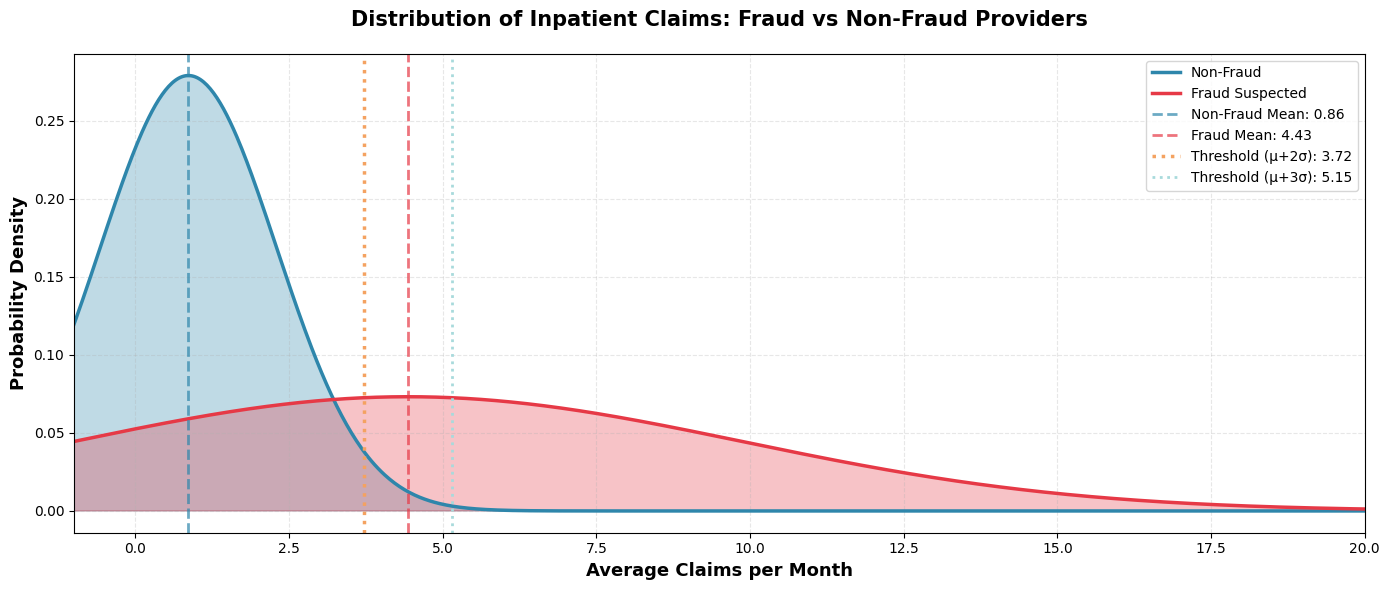

In [616]:
from scipy import stats

# Create x-axis range (claims per month)
x = np.linspace(-2, 25, 1000)

# Calculate probability density functions using averaged statistics
ip_non_fraud_pdf = stats.norm.pdf(x, ip_non_fraud_mean_of_means, ip_non_fraud_mean_std)
ip_fraud_pdf = stats.norm.pdf(x, ip_fraud_mean_of_means, ip_fraud_mean_std)

# Create single plot
fig, ax = plt.subplots(figsize=(14, 6))

# ============ Distribution Curves ============
ax.plot(x, ip_non_fraud_pdf, label='Non-Fraud', color='#2E86AB', linewidth=2.5)
ax.fill_between(x, ip_non_fraud_pdf, alpha=0.3, color='#2E86AB')

ax.plot(x, ip_fraud_pdf, label='Fraud Suspected', color='#E63946', linewidth=2.5)
ax.fill_between(x, ip_fraud_pdf, alpha=0.3, color='#E63946')

# Add vertical lines for means
ax.axvline(ip_non_fraud_mean_of_means, color='#2E86AB', linestyle='--', linewidth=2, alpha=0.7, 
            label=f'Non-Fraud Mean: {ip_non_fraud_mean_of_means:.2f}')
ax.axvline(ip_fraud_mean_of_means, color='#E63946', linestyle='--', linewidth=2, alpha=0.7,
            label=f'Fraud Mean: {ip_fraud_mean_of_means:.2f}')

# Add potential threshold lines
threshold_2sd = ip_non_fraud_mean_of_means + 2 * ip_non_fraud_mean_std
threshold_3sd = ip_non_fraud_mean_of_means + 3 * ip_non_fraud_mean_std

ax.axvline(threshold_2sd, color='#F4A261', linestyle=':', linewidth=2.5, 
            label=f'Threshold (μ+2σ): {threshold_2sd:.2f}')
ax.axvline(threshold_3sd, color='#A8DADC', linestyle=':', linewidth=2, 
            label=f'Threshold (μ+3σ): {threshold_3sd:.2f}')

ax.set_xlabel('Average Claims per Month', fontsize=13, fontweight='bold')
ax.set_ylabel('Probability Density', fontsize=13, fontweight='bold')
ax.set_title('Distribution of Inpatient Claims: Fraud vs Non-Fraud Providers', 
              fontsize=15, fontweight='bold', pad=20)
ax.legend(fontsize=10, loc='upper right')
ax.grid(True, alpha=0.3, linestyle='--')
ax.set_xlim(-1, 20)

plt.tight_layout()
plt.show()

Using 2 non-fraud stds as the cutoff threshold caputres ~95% of the data.
Using 3 non-fraud stds as the cutoff threshold caputres ~99.7% of the data.

Flag highly probable fraud providers:
- Choose a threshold of 3 stds.
- Anything greater is dominated by fraud providers.
- However, this catches less than half the fraud providers.

Could add a second flag of highly suspicious providers:
- Choose a threshold of more than 2 stds, less than 3 stds.
- Flag more suspicious providers with only a few false positives to investigate.

# Extra

# Looking at provider referral pairs in combined outpatient inpatient
**Not a good idea to combine. Put here for reference, but not good for analysis.** Best to analyze inpatient and outpatient separately!

### Trace each beneficiary's contact with providers

- Combine inpatient and outpatient data
- Sort claims by patient and date
- For each patient, trace which provider they saw first, second, etc.
- Count how many times Provider A → Provider B transitions happen

In [627]:
# create an inpatient, outpatient flag for each observation
inpatient['claim_type'] = 'Inpatient'
outpatient['claim_type'] = 'Outpatient'

In [629]:
patient = pd.concat([inpatient, outpatient], ignore_index=True)

In [631]:
patient

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,fraud_suspected,State,County,Month,claim_type
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,NaN,NaN,NaN,NaN,NaN,Y,39.0,230.0,2009-04,Inpatient
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,NaN,N,39.0,280.0,2009-08,Inpatient
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,N,52.0,590.0,2009-09,Inpatient
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,NaN,NaN,NaN,NaN,NaN,N,39.0,270.0,2009-02,Inpatient
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,NaN,NaN,NaN,NaN,NaN,N,24.0,680.0,2009-08,Inpatient
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,BENE159198,CLM510792,2009-08-06,2009-08-06,PRV53699,800,PHY364188,PHY364188,PHY385752,NaT,...,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,2009-08,Outpatient
558207,BENE159198,CLM551294,2009-08-29,2009-08-29,PRV53702,400,PHY423019,PHY332284,NaN,NaT,...,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,2009-08,Outpatient
558208,BENE159198,CLM596444,2009-09-24,2009-09-24,PRV53676,60,PHY361063,NaN,NaN,NaT,...,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,2009-09,Outpatient
558209,BENE159198,CLM636992,2009-10-18,2009-10-18,PRV53689,70,PHY403198,NaN,PHY419379,NaT,...,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,2009-10,Outpatient


In [633]:
# sort by beneficiary and claim start date, to look at sequence of claims
patient = patient.sort_values(['BeneID', 'ClaimStartDt'])

In [635]:
patient

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,fraud_suspected,State,County,Month,claim_type
350636,BENE100000,CLM126832,2009-01-08,2009-01-08,PRV57172,50,PHY383401,NaN,NaN,NaT,...,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN,2009-01,Outpatient
350637,BENE100000,CLM351838,2009-05-10,2009-05-10,PRV57172,70,PHY370909,NaN,PHY363377,NaT,...,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN,2009-05,Outpatient
350638,BENE100001,CLM229075,2009-03-05,2009-03-05,PRV55158,70,PHY383478,NaN,NaN,NaT,...,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,2009-03,Outpatient
350639,BENE100001,CLM258631,2009-03-21,2009-03-21,PRV54966,70,PHY347511,NaN,NaN,NaT,...,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN,2009-03,Outpatient
350640,BENE100001,CLM332544,2009-04-30,2009-05-02,PRV54890,90,PHY343317,PHY408367,PHY408367,NaT,...,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,2009-04,Outpatient
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350631,BENE99999,CLM359214,2009-05-14,2009-05-14,PRV55826,80,PHY341548,NaN,NaN,NaT,...,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,2009-05,Outpatient
350632,BENE99999,CLM475422,2009-07-17,2009-07-17,PRV54670,80,PHY351000,NaN,NaN,NaT,...,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,2009-07,Outpatient
350633,BENE99999,CLM591853,2009-09-21,2009-09-21,PRV57336,30,PHY422310,PHY363262,NaN,NaT,...,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,2009-09,Outpatient
350634,BENE99999,CLM712394,2009-12-03,2009-12-03,PRV51690,700,PHY379564,NaN,NaN,NaT,...,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,2009-12,Outpatient


In [637]:
patient.groupby('BeneID')['Provider'].shift(-1)

350636    PRV57172
350637         NaN
350638    PRV54966
350639    PRV54890
350640    PRV55158
            ...   
350631    PRV54670
350632    PRV57336
350633    PRV51690
350634    PRV54670
350635         NaN
Name: Provider, Length: 558211, dtype: object

NaNs appear at the last claim for each patient

In [640]:
# create a column with the subsequent provider for each claim. 
# NaN value if same provider (no referral) OR if no subsequent provider claim (end of patient journey)
patient['NextProvider'] = patient.groupby('BeneID')['Provider'].shift(-1)

In [642]:
patient.head(10)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,fraud_suspected,State,County,Month,claim_type,NextProvider
350636,BENE100000,CLM126832,2009-01-08,2009-01-08,PRV57172,50,PHY383401,NaN,NaN,NaT,...,NaN,NaN,NaN,NaN,Y,NaN,NaN,2009-01,Outpatient,PRV57172
350637,BENE100000,CLM351838,2009-05-10,2009-05-10,PRV57172,70,PHY370909,NaN,PHY363377,NaT,...,NaN,NaN,NaN,NaN,Y,NaN,NaN,2009-05,Outpatient,NaN
350638,BENE100001,CLM229075,2009-03-05,2009-03-05,PRV55158,70,PHY383478,NaN,NaN,NaT,...,NaN,NaN,NaN,NaN,N,NaN,NaN,2009-03,Outpatient,PRV54966
350639,BENE100001,CLM258631,2009-03-21,2009-03-21,PRV54966,70,PHY347511,NaN,NaN,NaT,...,NaN,NaN,NaN,NaN,Y,NaN,NaN,2009-03,Outpatient,PRV54890
350640,BENE100001,CLM332544,2009-04-30,2009-05-02,PRV54890,90,PHY343317,PHY408367,PHY408367,NaT,...,NaN,NaN,NaN,NaN,N,NaN,NaN,2009-04,Outpatient,PRV55158
350641,BENE100001,CLM389298,2009-05-31,2009-06-05,PRV55158,20,PHY425169,NaN,NaN,NaT,...,NaN,NaN,NaN,NaN,N,NaN,NaN,2009-05,Outpatient,PRV54966
350642,BENE100001,CLM407506,2009-06-10,2009-06-10,PRV54966,300,PHY425443,PHY390959,PHY349909,NaT,...,NaN,NaN,NaN,NaN,Y,NaN,NaN,2009-06,Outpatient,PRV54966
350643,BENE100001,CLM431369,2009-06-23,2009-06-23,PRV54966,60,PHY390959,NaN,NaN,NaT,...,NaN,NaN,NaN,NaN,Y,NaN,NaN,2009-06,Outpatient,PRV54966
350644,BENE100001,CLM447782,2009-07-02,2009-07-02,PRV54966,700,PHY334905,PHY313692,PHY337051,NaT,...,NaN,NaN,NaN,NaN,Y,NaN,NaN,2009-07,Outpatient,PRV52145
350645,BENE100001,CLM626521,2009-10-12,2009-10-12,PRV52145,10,PHY430032,NaN,PHY418077,NaT,...,NaN,NaN,NaN,NaN,N,NaN,NaN,2009-10,Outpatient,PRV54683


In [647]:
# count referral paths: Provider A -> Provier B combinations
# exclude same provider visits and last claim for each patient (no next provider)
# each observation contains contiguous provider giver-receiver data
paths = patient[
    (patient['Provider'] != patient['NextProvider']) & 
    (patient['NextProvider'].notna())
]
paths

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,fraud_suspected,State,County,Month,claim_type,NextProvider
350638,BENE100001,CLM229075,2009-03-05,2009-03-05,PRV55158,70,PHY383478,NaN,NaN,NaT,...,NaN,NaN,NaN,NaN,N,NaN,NaN,2009-03,Outpatient,PRV54966
350639,BENE100001,CLM258631,2009-03-21,2009-03-21,PRV54966,70,PHY347511,NaN,NaN,NaT,...,NaN,NaN,NaN,NaN,Y,NaN,NaN,2009-03,Outpatient,PRV54890
350640,BENE100001,CLM332544,2009-04-30,2009-05-02,PRV54890,90,PHY343317,PHY408367,PHY408367,NaT,...,NaN,NaN,NaN,NaN,N,NaN,NaN,2009-04,Outpatient,PRV55158
350641,BENE100001,CLM389298,2009-05-31,2009-06-05,PRV55158,20,PHY425169,NaN,NaN,NaT,...,NaN,NaN,NaN,NaN,N,NaN,NaN,2009-05,Outpatient,PRV54966
350644,BENE100001,CLM447782,2009-07-02,2009-07-02,PRV54966,700,PHY334905,PHY313692,PHY337051,NaT,...,NaN,NaN,NaN,NaN,Y,NaN,NaN,2009-07,Outpatient,PRV52145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350630,BENE99999,CLM187739,2009-02-10,2009-02-10,PRV55510,60,PHY318212,NaN,NaN,NaT,...,NaN,NaN,NaN,NaN,N,NaN,NaN,2009-02,Outpatient,PRV55826
350631,BENE99999,CLM359214,2009-05-14,2009-05-14,PRV55826,80,PHY341548,NaN,NaN,NaT,...,NaN,NaN,NaN,NaN,N,NaN,NaN,2009-05,Outpatient,PRV54670
350632,BENE99999,CLM475422,2009-07-17,2009-07-17,PRV54670,80,PHY351000,NaN,NaN,NaT,...,NaN,NaN,NaN,NaN,N,NaN,NaN,2009-07,Outpatient,PRV57336
350633,BENE99999,CLM591853,2009-09-21,2009-09-21,PRV57336,30,PHY422310,PHY363262,NaN,NaT,...,NaN,NaN,NaN,NaN,N,NaN,NaN,2009-09,Outpatient,PRV51690


In [648]:
# count referrals for each combination of giver and receiver
referrals_df = paths.groupby(['Provider', 'NextProvider']).size().reset_index(name='Count')

In [651]:
referrals_df

,Provider,NextProvider,Count
0,PRV51001,PRV51005,1
1,PRV51001,PRV51007,1
2,PRV51001,PRV51011,1
3,PRV51001,PRV51026,1
4,PRV51001,PRV51035,1
...,...,...,...
122493,PRV57763,PRV55903,1
122494,PRV57763,PRV55996,1
122495,PRV57763,PRV56011,6
122496,PRV57763,PRV56054,2


In [653]:
# rename columns
referrals_df.columns = ['Giver', 'Receiver', 'Count']

In [655]:
referrals_df

,Giver,Receiver,Count
0,PRV51001,PRV51005,1
1,PRV51001,PRV51007,1
2,PRV51001,PRV51011,1
3,PRV51001,PRV51026,1
4,PRV51001,PRV51035,1
...,...,...,...
122493,PRV57763,PRV55903,1
122494,PRV57763,PRV55996,1
122495,PRV57763,PRV56011,6
122496,PRV57763,PRV56054,2


In [657]:
# sort values
referrals_df = referrals_df.sort_values('Count', ascending=False)

In [659]:
referrals_df

,Giver,Receiver,Count
7356,PRV51347,PRV51567,520
14109,PRV51567,PRV51347,516
9640,PRV51433,PRV51369,451
7945,PRV51369,PRV51433,434
23256,PRV52030,PRV52077,304
...,...,...,...
48923,PRV53305,PRV53335,1
48922,PRV53305,PRV53300,1
48921,PRV53305,PRV52929,1
48918,PRV53304,PRV56444,1


In [662]:
len(referrals_df)

122498

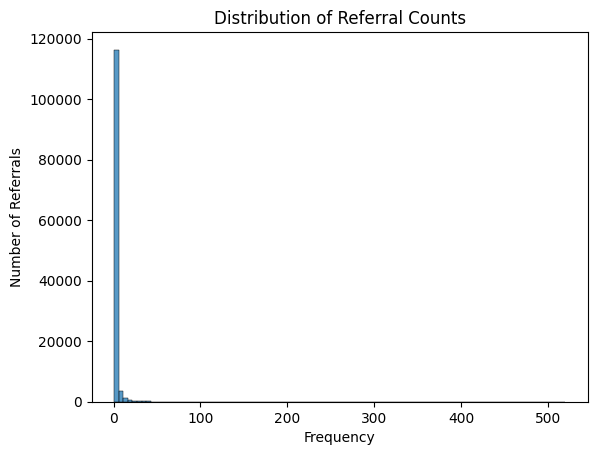

In [667]:
sns.histplot(referrals_df['Count'], bins=100)
plt.ylabel('Number of Referrals')
plt.xlabel('Frequency')
plt.title('Distribution of Referral Counts')
plt.show();

In [669]:
print('proportion of provider pairs with 10 or fewer referrals:', 
      len(referrals_df[referrals_df['Count']<=10]) / len(referrals_df))

proportion of provider pairs with 10 or fewer referrals: 0.9750036735293638


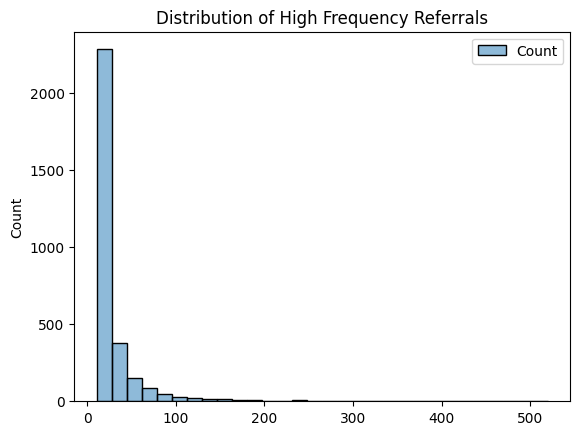

In [671]:
high_freq_referrals = referrals_df[referrals_df['Count']>10]
sns.histplot(high_freq_referrals, bins=30)
plt.title('Distribution of High Frequency Referrals')
plt.show();

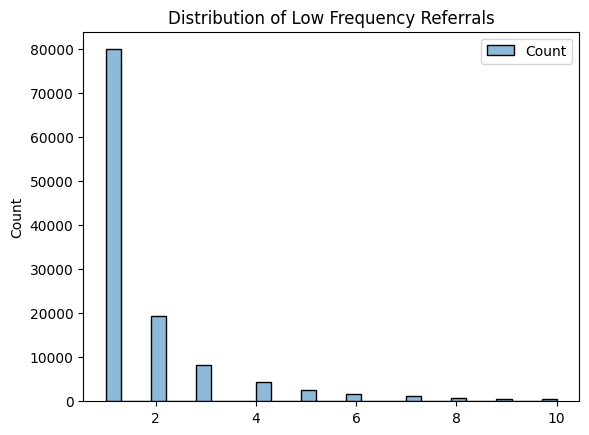

In [673]:
low_freq_referrals = referrals_df[referrals_df['Count']<=10]
sns.histplot(low_freq_referrals, bins=30)
plt.title('Distribution of Low Frequency Referrals')
plt.show();

Most provider pairs have few referrals. 97.5% have 10 or fewer referrals. Who are these provider pairs with high frequency referral patterns? **And how do I pick a threshold for what constitutes high frequency?** 

Look at extreme high frequency referral pairs:

In [676]:
referrals_df.head(2)

,Giver,Receiver,Count
7356,PRV51347,PRV51567,520
14109,PRV51567,PRV51347,516


In [678]:
referrals_df[referrals_df['Count']>=100]

,Giver,Receiver,Count
7356,PRV51347,PRV51567,520
14109,PRV51567,PRV51347,516
9640,PRV51433,PRV51369,451
7945,PRV51369,PRV51433,434
23256,PRV52030,PRV52077,304
...,...,...,...
121549,PRV57672,PRV51433,102
41364,PRV52656,PRV52628,100
58040,PRV53816,PRV53797,100
69193,PRV54564,PRV54563,100


In [680]:
referrals_df.head(2)

,Giver,Receiver,Count
7356,PRV51347,PRV51567,520
14109,PRV51567,PRV51347,516


In [682]:
referrals_df['Giver'].to_list()

['PRV51347',
 'PRV51567',
 'PRV51433',
 'PRV51369',
 'PRV52030',
 'PRV52077',
 'PRV53921',
 'PRV53918',
 'PRV54372',
 'PRV54374',
 'PRV56008',
 'PRV55004',
 'PRV56448',
 'PRV54895',
 'PRV55977',
 'PRV56416',
 'PRV55034',
 'PRV54966',
 'PRV54761',
 'PRV54786',
 'PRV55503',
 'PRV52340',
 'PRV56735',
 'PRV56560',
 'PRV55552',
 'PRV53918',
 'PRV57306',
 'PRV54966',
 'PRV53895',
 'PRV52369',
 'PRV51836',
 'PRV57333',
 'PRV54895',
 'PRV52821',
 'PRV54772',
 'PRV51851',
 'PRV54778',
 'PRV53915',
 'PRV52859',
 'PRV53918',
 'PRV57191',
 'PRV57348',
 'PRV55521',
 'PRV53956',
 'PRV53918',
 'PRV57228',
 'PRV55943',
 'PRV52628',
 'PRV52395',
 'PRV56225',
 'PRV55467',
 'PRV53874',
 'PRV51284',
 'PRV52365',
 'PRV53918',
 'PRV52665',
 'PRV51244',
 'PRV56270',
 'PRV52631',
 'PRV57306',
 'PRV52649',
 'PRV56006',
 'PRV52652',
 'PRV52649',
 'PRV52628',
 'PRV56006',
 'PRV54895',
 'PRV52649',
 'PRV56248',
 'PRV55548',
 'PRV55004',
 'PRV51369',
 'PRV55937',
 'PRV55462',
 'PRV56689',
 'PRV57306',
 'PRV57672',

In [684]:
# add fraud flag for giver and receiver
referrals_df.loc[:, 'giver_suspected_fraud'] = [
    'Y' if provider in fraud_providers else 'N' for provider in referrals_df['Giver'].to_list()
]
referrals_df.loc[:, 'receiver_suspected_fraud'] = [
    'Y' if provider in fraud_providers else 'N' for provider in referrals_df['Receiver'].to_list()    
]

In [685]:
referrals_df

,Giver,Receiver,Count,giver_suspected_fraud,receiver_suspected_fraud
7356,PRV51347,PRV51567,520,Y,Y
14109,PRV51567,PRV51347,516,Y,Y
9640,PRV51433,PRV51369,451,Y,Y
7945,PRV51369,PRV51433,434,Y,Y
23256,PRV52030,PRV52077,304,Y,Y
...,...,...,...,...,...
48923,PRV53305,PRV53335,1,N,N
48922,PRV53305,PRV53300,1,N,N
48921,PRV53305,PRV52929,1,N,N
48918,PRV53304,PRV56444,1,N,Y


In [690]:
referrals_df_YY = referrals_df[
    (referrals_df['giver_suspected_fraud'] == 'Y') & 
    (referrals_df['receiver_suspected_fraud'] == 'Y')
]
referrals_df_YY

,Giver,Receiver,Count,giver_suspected_fraud,receiver_suspected_fraud
7356,PRV51347,PRV51567,520,Y,Y
14109,PRV51567,PRV51347,516,Y,Y
9640,PRV51433,PRV51369,451,Y,Y
7945,PRV51369,PRV51433,434,Y,Y
23256,PRV52030,PRV52077,304,Y,Y
...,...,...,...,...,...
48296,PRV53269,PRV56501,1,Y,Y
48288,PRV53269,PRV56012,1,Y,Y
48692,PRV53295,PRV56400,1,Y,Y
48698,PRV53295,PRV57425,1,Y,Y


In [692]:
referrals_df_YY[referrals_df_YY['Count']>10]

,Giver,Receiver,Count,giver_suspected_fraud,receiver_suspected_fraud
7356,PRV51347,PRV51567,520,Y,Y
14109,PRV51567,PRV51347,516,Y,Y
9640,PRV51433,PRV51369,451,Y,Y
7945,PRV51369,PRV51433,434,Y,Y
23256,PRV52030,PRV52077,304,Y,Y
...,...,...,...,...,...
113568,PRV57173,PRV57167,11,Y,Y
77455,PRV54952,PRV55039,11,Y,Y
11475,PRV51480,PRV51357,11,Y,Y
79570,PRV55004,PRV52120,11,Y,Y


In [697]:
referrals_df_NN = referrals_df[
    (referrals_df['giver_suspected_fraud'] == 'N') & 
    (referrals_df['receiver_suspected_fraud'] == 'N')
]
referrals_df_NN 

,Giver,Receiver,Count,giver_suspected_fraud,receiver_suspected_fraud
90656,PRV55503,PRV55552,200,N,N
91886,PRV55552,PRV55503,195,N,N
96508,PRV55943,PRV56006,152,N,N
36662,PRV52395,PRV52365,151,N,N
35973,PRV52365,PRV52395,145,N,N
...,...,...,...,...,...
48928,PRV53306,PRV53294,1,N,N
48927,PRV53306,PRV53238,1,N,N
48923,PRV53305,PRV53335,1,N,N
48922,PRV53305,PRV53300,1,N,N


In [699]:
referrals_df_xor = referrals_df[
    (referrals_df['giver_suspected_fraud'] == 'Y') ^
    (referrals_df['receiver_suspected_fraud'] == 'Y')
]
referrals_df_xor 

,Giver,Receiver,Count,giver_suspected_fraud,receiver_suspected_fraud
60079,PRV53921,PRV53918,294,N,Y
59888,PRV53918,PRV53921,291,Y,N
66954,PRV54372,PRV54374,275,Y,N
67040,PRV54374,PRV54372,262,N,Y
104396,PRV56448,PRV56416,238,N,Y
...,...,...,...,...,...
48934,PRV53307,PRV52064,1,N,Y
48926,PRV53306,PRV52846,1,N,Y
48925,PRV53306,PRV52843,1,N,Y
48918,PRV53304,PRV56444,1,N,Y


### df.apply(list)

In [709]:
s = pd.DataFrame({'bene':['B01', 'B02', 'B03', 'B02', 'B04', 'B04', 'B01'], 
                  'provider':['PR06', 'PR11', 'PR11', 'PR07', 'PR07', 'PR11', 'PR07'], 
                  'diagnosis':['hopeless', 'doomed', 'fine', 'screwed', 'hopeless', 'fine', 'doomed'], 
                  'charge':['everything', 'arm', 'leg', 'free', 'arm', 'leg', 'free']})

In [711]:
s

,bene,provider,diagnosis,charge
0,B01,PR06,hopeless,everything
1,B02,PR11,doomed,arm
2,B03,PR11,fine,leg
3,B02,PR07,screwed,free
4,B04,PR07,hopeless,arm
5,B04,PR11,fine,leg
6,B01,PR07,doomed,free


In [713]:
s_pr = s.groupby('bene')['provider'].apply(list).reset_index()
s_pr

,bene,provider
0,B01,"[PR06, PR07]"
1,B02,"[PR11, PR07]"
2,B03,[PR11]
3,B04,"[PR07, PR11]"


In [715]:
# keep benes with multiple providers
s_pr['num_pr'] = s_pr['provider'].apply(len)
s_shared = s_pr[s_pr['num_pr'] > 1]
s_shared

,bene,provider,num_pr
0,B01,"[PR06, PR07]",2
1,B02,"[PR11, PR07]",2
3,B04,"[PR07, PR11]",2


### create provider-to-provider sharing matrix to show how many patients each provider pair shares

In [719]:
s_pairs = []
for _, row in s_shared.iterrows():
    providers = list(set(row['provider']))  # Remove duplicates
    if len(providers) > 1:
        for prov1, prov2 in combinations(providers, 2):
            s_pairs.append({'Provider1': prov1, 'Provider2': prov2, 'bene': row['bene']})
s_pairs_df = pd.DataFrame(s_pairs)
s_pairs_df

,Provider1,Provider2,bene
0,PR07,PR06,B01
1,PR11,PR07,B02
2,PR11,PR07,B04


In [721]:
# Count shared patients between each provider pair
s_counts = s_pairs_df.groupby(['Provider1', 'Provider2']).size().reset_index(name='shared_patient_count')
s_counts = s_counts.sort_values('shared_patient_count', ascending=False)
s_counts

,Provider1,Provider2,shared_patient_count
1,PR11,PR07,2
0,PR07,PR06,1


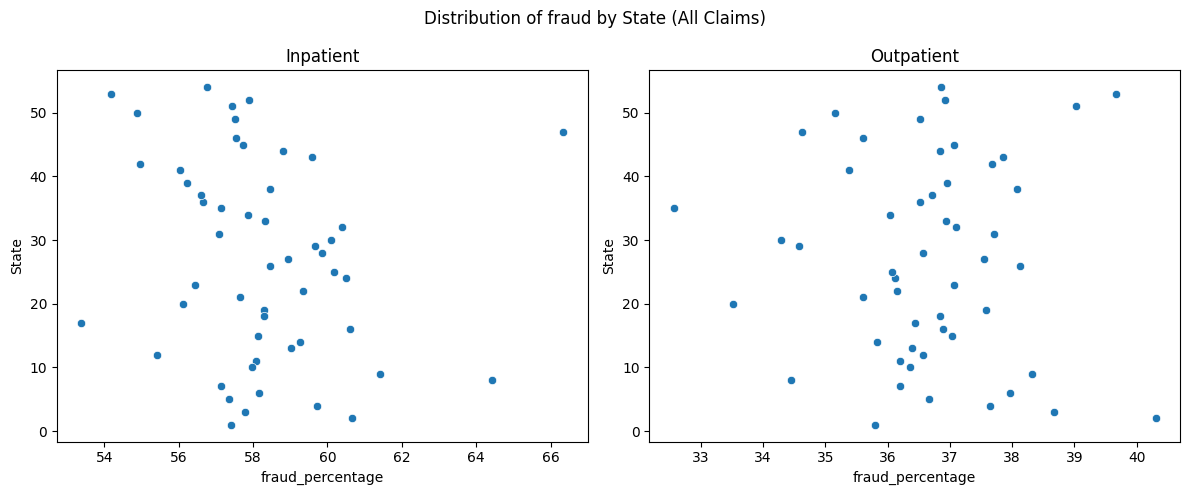

In [724]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.scatterplot(data=ip_state_fraud_pct, x='fraud_percentage', y='State', ax=axes[0])
axes[0].set_title('Inpatient')

sns.scatterplot(data=op_state_fraud_pct, x='fraud_percentage', y='State', ax=axes[1])
axes[1].set_title('Outpatient')

plt.suptitle('Distribution of fraud by State (All Claims)')
plt.tight_layout() 
plt.show()

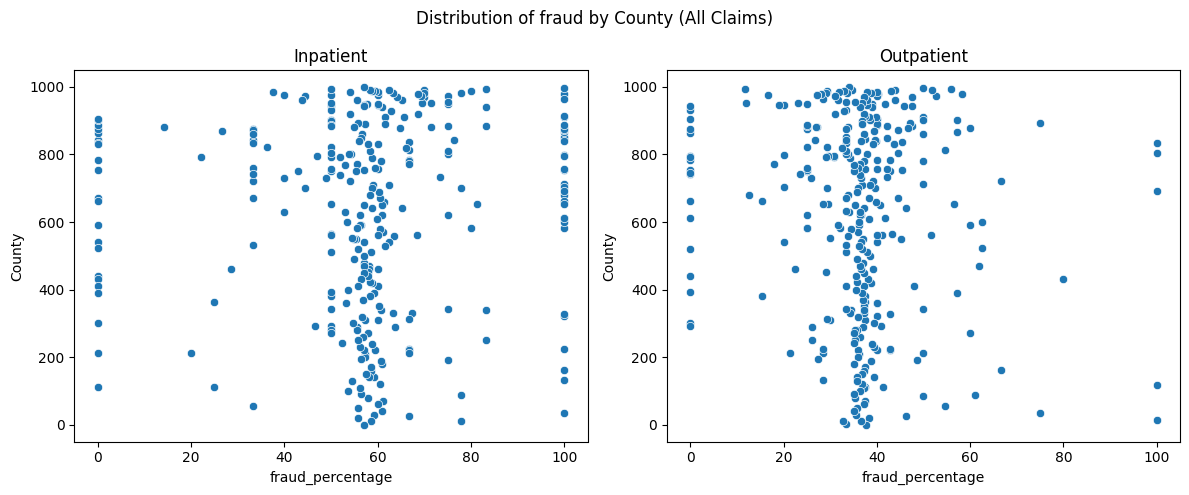

In [726]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.scatterplot(data=ip_county_fraud_pct, x='fraud_percentage', y='County', ax=axes[0])
axes[0].set_title('Inpatient')

sns.scatterplot(data=op_county_fraud_pct, x='fraud_percentage', y='County', ax=axes[1])
axes[1].set_title('Outpatient')

plt.suptitle('Distribution of fraud by County (All Claims)')
plt.tight_layout() 
plt.show()

In [728]:
# looking at duplicates for state and county patterns? 

In [730]:
duplicate_ips.head(2)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,fraud_suspected,count,State,County
0,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,7092.0,NaN,NaN,NaN,NaN,NaN,N,2,39,230
1,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,N,2,39,230


In [732]:
# add beneficiary State and County data to duplicates
duplicate_ips.loc[:, 'State'] = beneficiary['State']
duplicate_ops.loc[:, 'State'] = beneficiary['State']
duplicate_ips.loc[:, 'County'] = beneficiary['County']
duplicate_ops.loc[:, 'County'] = beneficiary['County']

In [734]:
duplicate_ips.head(2)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,fraud_suspected,count,State,County
0,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,7092.0,NaN,NaN,NaN,NaN,NaN,N,2,39,230
1,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,N,2,39,280


In [736]:
#######################

### look at distribution of State data by fraud status (claim level)

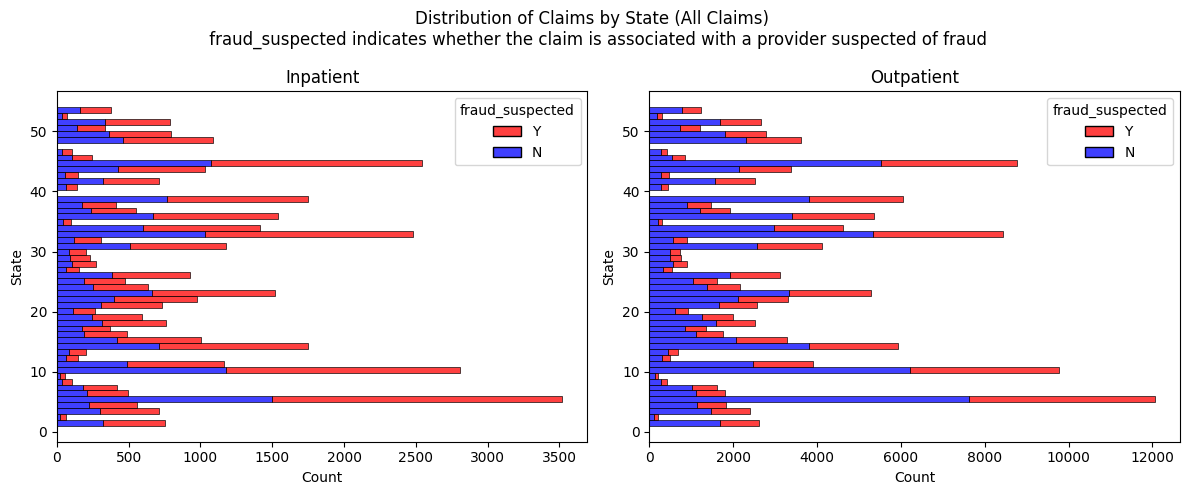

In [738]:
# for the entire data set
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Define color palette with exact hex colors
colors = {'Y': '#FF0000', 'N': '#0000FF'}  # Pure red and pure blue 
hue_order = ['Y', 'N']

sns.histplot(data=inpatient, y='State', ax=axes[0], hue='fraud_suspected', 
             palette=colors, multiple='stack', hue_order=hue_order, bins=54)
axes[0].set_title('Inpatient')

sns.histplot(data=outpatient, y='State', ax=axes[1], hue='fraud_suspected', 
             palette=colors, multiple='stack', hue_order=hue_order, bins=54)
axes[1].set_title('Outpatient')

plt.suptitle('Distribution of Claims by State (All Claims) \n fraud_suspected indicates whether the claim is associated with a provider suspected of fraud')
plt.tight_layout() 
plt.show()

In [740]:
duplicate_ips.head(2)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,fraud_suspected,count,State,County
0,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,7092.0,NaN,NaN,NaN,NaN,NaN,N,2,39,230
1,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,N,2,39,280


In [742]:
# add beneficiary State and County data to duplicates
duplicate_ips.loc[:, 'State'] = beneficiary['State']
duplicate_ops.loc[:, 'State'] = beneficiary['State']
duplicate_ips.loc[:, 'County'] = beneficiary['County']
duplicate_ops.loc[:, 'County'] = beneficiary['County']

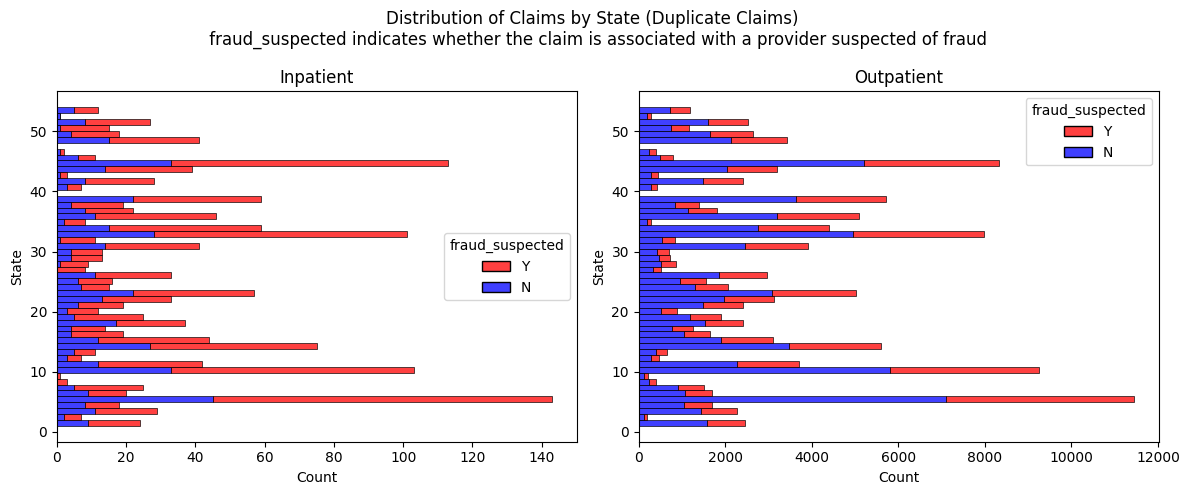

In [744]:
# for the duplicate claims
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Define color palette with exact hex colors
colors = {'Y': '#FF0000', 'N': '#0000FF'}  # Pure red and pure blue
hue_order = ['Y', 'N']

sns.histplot(data=duplicate_ips, y='State', ax=axes[0], hue='fraud_suspected', 
             palette=colors, multiple='stack', hue_order=hue_order, bins=54)
axes[0].set_title('Inpatient')

sns.histplot(data=duplicate_ops, y='State', ax=axes[1], hue='fraud_suspected', 
             palette=colors, multiple='stack', hue_order=hue_order, bins=54)
axes[1].set_title('Outpatient')

plt.suptitle('Distribution of Claims by State (Duplicate Claims) \n fraud_suspected indicates whether the claim is associated with a provider suspected of fraud')
plt.tight_layout() 
plt.show()

In [745]:
inpatient['State'].nunique()

52

In [748]:
# calculate fraud percentage by state
ip_state_fraud_pct = inpatient.groupby('State')['fraud_suspected'].apply(
    lambda x: (x == 'Y').sum() / len(x) * 100
).reset_index(name='fraud_percentage')

ip_state_fraud_pct.sort_values(by='fraud_percentage', ascending=False).head(10)

,State,fraud_percentage
45,47,66.346154
7,8,64.423077
8,9,61.403509
1,2,60.655738
15,16,60.618557
23,24,60.505529
31,32,60.389610
24,25,60.169492
29,30,60.098522
27,28,59.851301


In [750]:
# calculate fraud percentage by state
op_state_fraud_pct = outpatient.groupby('State')['fraud_suspected'].apply(
    lambda x: (x == 'Y').sum() / len(x) * 100
).reset_index(name='fraud_percentage')

op_state_fraud_pct.sort_values(by='fraud_percentage', ascending=False).head(10)

,State,fraud_percentage
1,2.0,40.306122
50,53.0,39.661017
48,51.0,39.026403
2,3.0,38.663883
8,9.0,38.317757
25,26.0,38.127413
37,38.0,38.079019
5,6.0,37.963475
41,43.0,37.849462
30,31.0,37.706111


In [752]:
print('State stats for all claims')
print('INPATIENT: \n', ip_state_fraud_pct.describe())
print('OUTPATIENT: \n', op_state_fraud_pct.describe())

State stats for all claims
INPATIENT: 
            State  fraud_percentage
count  52.000000         52.000000
mean   26.865385         58.232949
std    15.668163          2.246457
min     1.000000         53.369272
25%    13.750000         57.124713
50%    26.500000         58.026405
75%    39.500000         59.404447
max    54.000000         66.346154
OUTPATIENT: 
            State  fraud_percentage
count  52.000000         52.000000
mean   26.865385         36.646548
std    15.668163          1.420166
min     1.000000         32.565789
25%    13.750000         36.058363
50%    26.500000         36.683010
75%    39.500000         37.556748
max    54.000000         40.306122


In [754]:
ip_state_fraud_pct.describe()

,State,fraud_percentage
count,52.000000,52.000000
mean,26.865385,58.232949
std,15.668163,2.246457
min,1.000000,53.369272
25%,13.750000,57.124713
50%,26.500000,58.026405
75%,39.500000,59.404447
max,54.000000,66.346154


In [756]:
op_state_fraud_pct.describe()

,State,fraud_percentage
count,52.000000,52.000000
mean,26.865385,36.646548
std,15.668163,1.420166
min,1.000000,32.565789
25%,13.750000,36.058363
50%,26.500000,36.683010
75%,39.500000,37.556748
max,54.000000,40.306122


- Inpatient: 13% difference in percentage distributions by state.
- Outpatient: 8% difference in percentage distributions by state.

### look at distribution of County data by fraud status

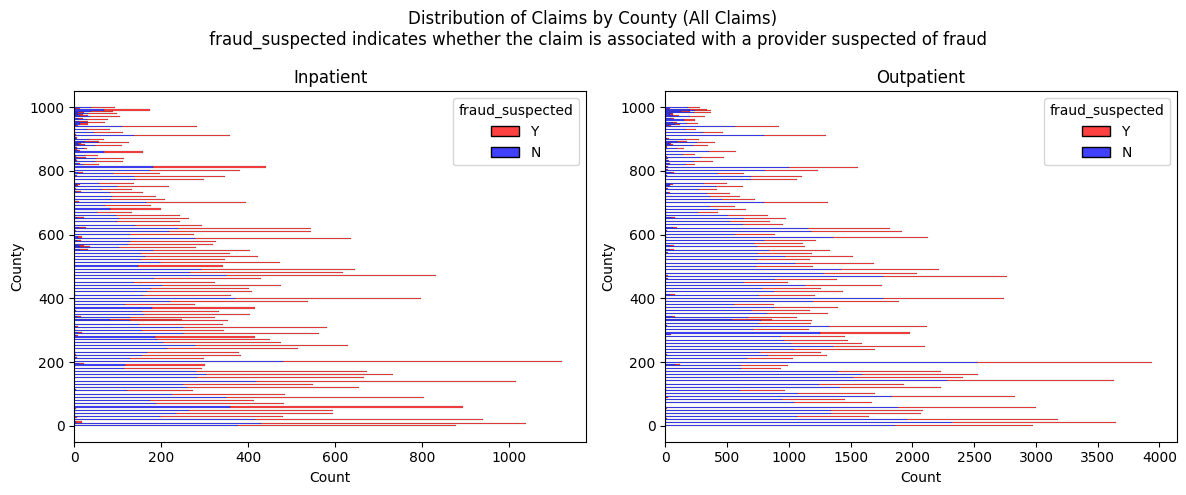

In [759]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Define color palette with exact hex colors
colors = {'Y': '#FF0000', 'N': '#0000FF'}  # Pure red and pure blue
hue_order = ['Y', 'N']
sns.histplot(data=inpatient, y='County', ax=axes[0], hue='fraud_suspected', hue_order=hue_order, 
             palette=colors, multiple='stack', bins=296) # bins = number of unique inpatient counties
axes[0].set_title('Inpatient')

sns.histplot(data=outpatient, y='County', ax=axes[1], hue='fraud_suspected', hue_order=hue_order, 
             palette=colors, multiple='stack', bins=314) # bins = number of unique outpatient counties
axes[1].set_title('Outpatient')

plt.suptitle('Distribution of Claims by County (All Claims) \n fraud_suspected indicates whether the claim is associated with a provider suspected of fraud')
plt.tight_layout() 
plt.show()

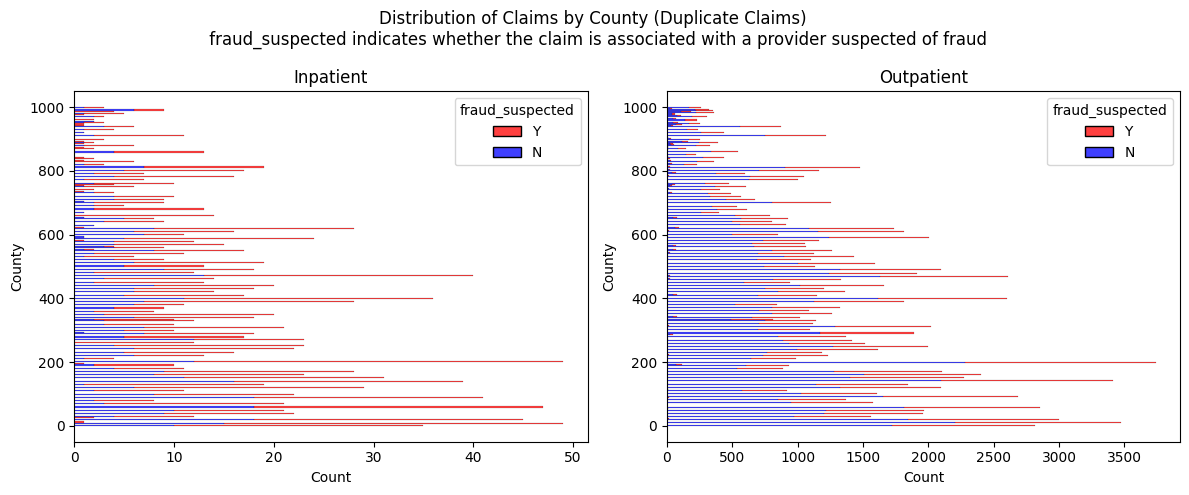

In [760]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Define color palette with exact hex colors
colors = {'Y': '#FF0000', 'N': '#0000FF'}  # Pure red and pure blue
hue_order = ['Y', 'N']
sns.histplot(data=duplicate_ips, y='County', ax=axes[0], hue='fraud_suspected', hue_order=hue_order, 
             palette=colors, multiple='stack', bins=296) # bins = number of unique inpatient counties
axes[0].set_title('Inpatient')

sns.histplot(data=duplicate_ops, y='County', ax=axes[1], hue='fraud_suspected', hue_order=hue_order, 
             palette=colors, multiple='stack', bins=314) # bins = number of unique outpatient counties
axes[1].set_title('Outpatient')

plt.suptitle('Distribution of Claims by County (Duplicate Claims) \n fraud_suspected indicates whether the claim is associated with a provider suspected of fraud')
plt.tight_layout() 
plt.show()

In [763]:
# calculate INPATIENT fraud percentage by county
ip_county_fraud_pct = inpatient.groupby('County')['fraud_suspected'].apply(
    lambda x: (x == 'Y').sum() / len(x) * 100
).reset_index(name='fraud_percentage')

ip_county_fraud_pct.sort_values(by='fraud_percentage', inplace=True, ascending=False)

In [764]:
ip_county_fraud_pct

,County,fraud_percentage
148,681,100.0
224,878,100.0
120,583,100.0
26,161,100.0
62,321,100.0
...,...,...
86,431,0.0
182,785,0.0
82,412,0.0
77,391,0.0


In [766]:
ip_county_fraud_pct[ip_county_fraud_pct['fraud_percentage']>=75.0]

,County,fraud_percentage
148,681,100.000000
224,878,100.000000
120,583,100.000000
26,161,100.000000
62,321,100.000000
211,845,100.000000
213,851,100.000000
217,867,100.000000
220,873,100.000000
222,875,100.000000


In [772]:
# calculate OUTPATIENT fraud percentage by county
op_county_fraud_pct = outpatient.groupby('County')['fraud_suspected'].apply(
    lambda x: (x == 'Y').sum() / len(x) * 100
).reset_index(name='fraud_percentage')

op_county_fraud_pct.sort_values(by='fraud_percentage', inplace=True, ascending=False)

In [774]:
op_county_fraud_pct

,County,fraud_percentage
157,691.0,100.0
4,14.0,100.0
216,834.0,100.0
22,117.0,100.0
206,804.0,100.0
...,...,...
174,744.0,0.0
256,904.0,0.0
235,875.0,0.0
107,521.0,0.0


In [776]:
op_county_fraud_pct[op_county_fraud_pct['fraud_percentage']>=50.0]

,County,fraud_percentage
157,691.0,100.000000
4,14.0,100.000000
216,834.0,100.000000
22,117.0,100.000000
206,804.0,100.000000
91,431.0,80.000000
8,34.0,75.000000
251,893.0,75.000000
166,722.0,66.666667
30,161.0,66.666667


In [778]:
print('County stats for all claims')
print('INPATIENT: \n', ip_county_fraud_pct.describe())
print('OUTPATIENT: \n', op_county_fraud_pct.describe())

County stats for all claims
INPATIENT: 
            County  fraud_percentage
count  296.000000        296.000000
mean   618.192568         57.820777
std    289.703390         23.786107
min      0.000000          0.000000
25%    377.500000         50.000000
50%    680.500000         58.081897
75%    874.250000         66.666667
max    999.000000        100.000000
OUTPATIENT: 
            County  fraud_percentage
count  314.000000        314.000000
mean   617.684713         36.194591
std    292.240020         15.513741
min      0.000000          0.000000
25%    372.500000         31.647173
50%    690.500000         36.661036
75%    874.750000         40.000000
max    999.000000        100.000000


### Look at stats within duplicate claims

Consider duplicates with 
- same BeneID
- same Provider

In [785]:
# filter for duplicates
duplicate_ip_groups = inpatient.groupby(
    # add columns to this list to check for duplicates in multiple areas
    ['BeneID', 'Provider']
).size().reset_index(name='count')

duplicate_ip_groups = duplicate_ip_groups[duplicate_ip_groups['count'] > 1]

# get rows that are part of duplicate groups
duplicate_ip_claims = inpatient.merge(
    duplicate_ip_groups[duplicate_ip_groups['count'] > 1],
    # add columns to this list to check for duplicates in multiple areas 
    on=['BeneID', 'Provider'],
    how='inner'
)

duplicate_ip_claims

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,fraud_suspected,State,County,Month,claim_type,count
0,BENE11041,CLM54944,2009-06-10,2009-06-15,PRV52283,6000,PHY382905,NaN,NaN,2009-06-10,...,NaN,NaN,NaN,NaN,Y,45,780,2009-06,Inpatient,2
1,BENE11041,CLM78682,2009-12-07,2009-12-13,PRV52283,17000,PHY432797,PHY432797,NaN,2009-12-07,...,NaN,NaN,NaN,NaN,Y,13,270,2009-12,Inpatient,2
2,BENE11069,CLM62447,2009-08-04,2009-08-06,PRV53135,3000,PHY393448,NaN,NaN,2009-08-04,...,NaN,NaN,NaN,NaN,N,38,230,2009-08,Inpatient,2
3,BENE11069,CLM80966,2009-12-29,2009-12-31,PRV53135,14000,PHY393448,PHY393448,NaN,2009-12-29,...,NaN,NaN,NaN,NaN,N,10,50,2009-12,Inpatient,2
4,BENE11093,CLM32146,2009-01-03,2009-01-09,PRV51842,20000,PHY341192,PHY355416,NaN,2009-01-03,...,NaN,NaN,NaN,NaN,Y,20,130,2009-01,Inpatient,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7094,BENE159079,CLM72780,2009-10-20,2009-10-27,PRV52574,6000,PHY328105,PHY383506,NaN,2009-10-20,...,NaN,NaN,NaN,NaN,Y,14,90,2009-10,Inpatient,3
7095,BENE159107,CLM48437,2009-04-25,2009-04-27,PRV57502,5000,PHY380480,PHY389834,NaN,2009-04-25,...,NaN,NaN,NaN,NaN,Y,24,260,2009-04,Inpatient,2
7096,BENE159107,CLM60472,2009-07-20,2009-07-26,PRV57502,12000,PHY356553,PHY329424,NaN,2009-07-20,...,NaN,NaN,NaN,NaN,Y,39,420,2009-07,Inpatient,2
7097,BENE159167,CLM35741,2009-01-27,2009-01-29,PRV53671,4000,PHY345332,PHY319565,NaN,2009-01-27,...,NaN,NaN,NaN,NaN,Y,34,100,2009-01,Inpatient,2


Within the claims with duplicate BeneID and Provider, group by County and look at preponderance of fraud

In [788]:
# calculate duplicate INPATIENT fraud percentage by county
ip_county_counts =  duplicate_ip_claims.groupby('County')['fraud_suspected'].apply(
    lambda x: (x == 'Y').count() 
).reset_index(name='num_claims')
ip_county_counts

,County,num_claims
0,0,138
1,10,193
2,11,3
3,20,161
4,25,1
...,...,...
213,991,8
214,992,2
215,993,2
216,994,2


In [790]:
# calculate duplicate INPATIENT fraud percentage by county
ip_county_fraud_percentages = duplicate_ip_claims.groupby('County')['fraud_suspected'].apply(
    lambda x: (x == 'Y').sum() / len(x) * 100
).reset_index(name='fraud_percentage')
ip_county_fraud_percentages

,County,fraud_percentage
0,0,75.362319
1,10,72.020725
2,11,100.000000
3,20,63.975155
4,25,100.000000
...,...,...
213,991,75.000000
214,992,100.000000
215,993,50.000000
216,994,50.000000


In [792]:
ip_county_df = ip_county_counts.merge(ip_county_fraud_percentages, on='County')

In [794]:
ip_county_df

,County,num_claims,fraud_percentage
0,0,138,75.362319
1,10,193,72.020725
2,11,3,100.000000
3,20,161,63.975155
4,25,1,100.000000
...,...,...,...
213,991,8,75.000000
214,992,2,100.000000
215,993,2,50.000000
216,994,2,50.000000


In [796]:
1353/6763

0.20005914534969688

For duplicates in outpatient BeneID, Provider, ClaimStartDt, 2655 claims are flagged as duplicates with 548 unique providers, 145 (26%) of whom are in the suspected providers list.

Adding in ClmProcedureCode_1 returns 0 duplicates.

For duplicates in outpatient BeneID, Provider, ClaimStartDt, ClaimEndDt 2047 claims are flagged as duplicates with 469 unique providers, 132 (28%) of whom are in the suspected providers list.

Most of the duplications are in fact duplicates (doubles). But for BeneID, Provider, ClaimStartDt, there are are 27 triplications, associated with 9 unique providers, 5 of whom are in the suspect provider list.